<a href="https://colab.research.google.com/github/masies/CRA/blob/main/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRE_PROCESSING


In [1]:
from google.colab import auth
auth.authenticate_user()
project_id = 'helical-loop-303918'
bucket_name = 'code_review_automation'
!gcloud config set project {project_id}

Updated property [core/project].


In [2]:
!pip install sentencepiece
!pip3 install pip install transformers

import json
import pickle
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sentencepiece as spm
import re
import regex
import unicodedata
from bs4 import BeautifulSoup, NavigableString


!pip install nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

     |████████████████████████████████| 1.2MB 11.9MB/s 
     |████████████████████████████████| 1.9MB 9.2MB/s 
     |████████████████████████████████| 890kB 45.3MB/s 
     |████████████████████████████████| 3.2MB 49.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=9f329b879a9258bc752f48cef29b5abaf82f1c301aa9222ba4a33eba1e958890
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Import java codeSearchNet and stackoverflow archives + cleaning

In [3]:
!gsutil cp gs://{bucket_name}/raw_data/java_dedupe_definitions_v2.pkl ./java_dedupe_definitions_v2.pkl
!gsutil cp gs://{bucket_name}/raw_data/stackoverflow_EXT.csv ./stackoverflow.csv

Copying gs://code_review_automation/raw_data/java_dedupe_definitions_v2.pkl...
| [1 files][  3.6 GiB/  3.6 GiB]   34.5 MiB/s                                   
Operation completed over 1 objects/3.6 GiB.                                      
Copying gs://code_review_automation/raw_data/stackoverflow_EXT.csv...
\ [1 files][  1.2 GiB/  1.2 GiB]   29.9 MiB/s                                   
Operation completed over 1 objects/1.2 GiB.                                      


In [6]:
with open('stackoverflow.csv') as f:
  SO_lines = f.read().splitlines()
# SO_lines = SO_lines[0:10000]

In [ ]:
def removeEmojis(s):
  # list of all the emoji in unicode, yeah, really ugly but that's the best I came up with, (thanks https://gist.github.com/akkez/99ceeae2f13c9d8d9be7df0279e2c438)
  emoji_pattern = regex.compile(r"\U0001f469\u200d\u2764\ufe0f\u200d\U0001f48b\u200d\U0001f468|\U0001f468\u200d\u2764\ufe0f\u200d\U0001f48b\u200d\U0001f468|\U0001f469\u200d\u2764\ufe0f\u200d\U0001f48b\u200d\U0001f469|\U0001f9d1\U0001f3fb\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fc\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fc\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3fd\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fd\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3fd\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fd|\U0001f9d1\U0001f3fe\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fe\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3fe\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fd|\U0001f9d1\U0001f3fe\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fe|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fd|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fe|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3ff|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f469\U0001f3fb|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f469\U0001f3fb|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f469\U0001f3fc|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f469\U0001f3fb|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f469\U0001f3fc|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f469\U0001f3fd|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f469\U0001f3fb|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f469\U0001f3fc|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f469\U0001f3fd|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f469\U0001f3fe|\U0001f469\U0001f3fb\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f469\U0001f3fb\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f469\U0001f3fb\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f469\U0001f3fb\u200d\U0001f91d\u200d\U0001f468\U0001f3ff|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3ff|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3ff|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3ff|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f468\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f468\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f468\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f468\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f468\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f468\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f468\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f468\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f468\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f468\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f469\u200d\u2764\u200d\U0001f48b\u200d\U0001f468|\U0001f468\u200d\u2764\u200d\U0001f48b\u200d\U0001f468|\U0001f469\u200d\u2764\u200d\U0001f48b\u200d\U0001f469|\U0001f468\u200d\U0001f469\u200d\U0001f467\u200d\U0001f466|\U0001f468\u200d\U0001f469\u200d\U0001f466\u200d\U0001f466|\U0001f468\u200d\U0001f469\u200d\U0001f467\u200d\U0001f467|\U0001f468\u200d\U0001f468\u200d\U0001f467\u200d\U0001f466|\U0001f468\u200d\U0001f468\u200d\U0001f466\u200d\U0001f466|\U0001f468\u200d\U0001f468\u200d\U0001f467\u200d\U0001f467|\U0001f469\u200d\U0001f469\u200d\U0001f467\u200d\U0001f466|\U0001f469\u200d\U0001f469\u200d\U0001f466\u200d\U0001f466|\U0001f469\u200d\U0001f469\u200d\U0001f467\u200d\U0001f467|\U0001f3f4\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f|\U0001f3f4\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f|\U0001f3f4\U000e0067\U000e0062\U000e0077\U000e006c\U000e0073\U000e007f|\U0001f469\u200d\u2764\ufe0f\u200d\U0001f468|\U0001f468\u200d\u2764\ufe0f\u200d\U0001f468|\U0001f469\u200d\u2764\ufe0f\u200d\U0001f469|\U0001f441\ufe0f\u200d\U0001f5e8\ufe0f|\U0001f471\U0001f3fb\u200d\u2642\ufe0f|\U0001f471\U0001f3fc\u200d\u2642\ufe0f|\U0001f471\U0001f3fd\u200d\u2642\ufe0f|\U0001f471\U0001f3fe\u200d\u2642\ufe0f|\U0001f471\U0001f3ff\u200d\u2642\ufe0f|\U0001f471\U0001f3fb\u200d\u2640\ufe0f|\U0001f471\U0001f3fc\u200d\u2640\ufe0f|\U0001f471\U0001f3fd\u200d\u2640\ufe0f|\U0001f471\U0001f3fe\u200d\u2640\ufe0f|\U0001f471\U0001f3ff\u200d\u2640\ufe0f|\U0001f64d\U0001f3fb\u200d\u2642\ufe0f|\U0001f64d\U0001f3fc\u200d\u2642\ufe0f|\U0001f64d\U0001f3fd\u200d\u2642\ufe0f|\U0001f64d\U0001f3fe\u200d\u2642\ufe0f|\U0001f64d\U0001f3ff\u200d\u2642\ufe0f|\U0001f64d\U0001f3fb\u200d\u2640\ufe0f|\U0001f64d\U0001f3fc\u200d\u2640\ufe0f|\U0001f64d\U0001f3fd\u200d\u2640\ufe0f|\U0001f64d\U0001f3fe\u200d\u2640\ufe0f|\U0001f64d\U0001f3ff\u200d\u2640\ufe0f|\U0001f64e\U0001f3fb\u200d\u2642\ufe0f|\U0001f64e\U0001f3fc\u200d\u2642\ufe0f|\U0001f64e\U0001f3fd\u200d\u2642\ufe0f|\U0001f64e\U0001f3fe\u200d\u2642\ufe0f|\U0001f64e\U0001f3ff\u200d\u2642\ufe0f|\U0001f64e\U0001f3fb\u200d\u2640\ufe0f|\U0001f64e\U0001f3fc\u200d\u2640\ufe0f|\U0001f64e\U0001f3fd\u200d\u2640\ufe0f|\U0001f64e\U0001f3fe\u200d\u2640\ufe0f|\U0001f64e\U0001f3ff\u200d\u2640\ufe0f|\U0001f645\U0001f3fb\u200d\u2642\ufe0f|\U0001f645\U0001f3fc\u200d\u2642\ufe0f|\U0001f645\U0001f3fd\u200d\u2642\ufe0f|\U0001f645\U0001f3fe\u200d\u2642\ufe0f|\U0001f645\U0001f3ff\u200d\u2642\ufe0f|\U0001f645\U0001f3fb\u200d\u2640\ufe0f|\U0001f645\U0001f3fc\u200d\u2640\ufe0f|\U0001f645\U0001f3fd\u200d\u2640\ufe0f|\U0001f645\U0001f3fe\u200d\u2640\ufe0f|\U0001f645\U0001f3ff\u200d\u2640\ufe0f|\U0001f646\U0001f3fb\u200d\u2642\ufe0f|\U0001f646\U0001f3fc\u200d\u2642\ufe0f|\U0001f646\U0001f3fd\u200d\u2642\ufe0f|\U0001f646\U0001f3fe\u200d\u2642\ufe0f|\U0001f646\U0001f3ff\u200d\u2642\ufe0f|\U0001f646\U0001f3fb\u200d\u2640\ufe0f|\U0001f646\U0001f3fc\u200d\u2640\ufe0f|\U0001f646\U0001f3fd\u200d\u2640\ufe0f|\U0001f646\U0001f3fe\u200d\u2640\ufe0f|\U0001f646\U0001f3ff\u200d\u2640\ufe0f|\U0001f481\U0001f3fb\u200d\u2642\ufe0f|\U0001f481\U0001f3fc\u200d\u2642\ufe0f|\U0001f481\U0001f3fd\u200d\u2642\ufe0f|\U0001f481\U0001f3fe\u200d\u2642\ufe0f|\U0001f481\U0001f3ff\u200d\u2642\ufe0f|\U0001f481\U0001f3fb\u200d\u2640\ufe0f|\U0001f481\U0001f3fc\u200d\u2640\ufe0f|\U0001f481\U0001f3fd\u200d\u2640\ufe0f|\U0001f481\U0001f3fe\u200d\u2640\ufe0f|\U0001f481\U0001f3ff\u200d\u2640\ufe0f|\U0001f64b\U0001f3fb\u200d\u2642\ufe0f|\U0001f64b\U0001f3fc\u200d\u2642\ufe0f|\U0001f64b\U0001f3fd\u200d\u2642\ufe0f|\U0001f64b\U0001f3fe\u200d\u2642\ufe0f|\U0001f64b\U0001f3ff\u200d\u2642\ufe0f|\U0001f64b\U0001f3fb\u200d\u2640\ufe0f|\U0001f64b\U0001f3fc\u200d\u2640\ufe0f|\U0001f64b\U0001f3fd\u200d\u2640\ufe0f|\U0001f64b\U0001f3fe\u200d\u2640\ufe0f|\U0001f64b\U0001f3ff\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fb\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fc\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fd\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fe\u200d\u2642\ufe0f|\U0001f9cf\U0001f3ff\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fb\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fc\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fd\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fe\u200d\u2640\ufe0f|\U0001f9cf\U0001f3ff\u200d\u2640\ufe0f|\U0001f647\U0001f3fb\u200d\u2642\ufe0f|\U0001f647\U0001f3fc\u200d\u2642\ufe0f|\U0001f647\U0001f3fd\u200d\u2642\ufe0f|\U0001f647\U0001f3fe\u200d\u2642\ufe0f|\U0001f647\U0001f3ff\u200d\u2642\ufe0f|\U0001f647\U0001f3fb\u200d\u2640\ufe0f|\U0001f647\U0001f3fc\u200d\u2640\ufe0f|\U0001f647\U0001f3fd\u200d\u2640\ufe0f|\U0001f647\U0001f3fe\u200d\u2640\ufe0f|\U0001f647\U0001f3ff\u200d\u2640\ufe0f|\U0001f926\U0001f3fb\u200d\u2642\ufe0f|\U0001f926\U0001f3fc\u200d\u2642\ufe0f|\U0001f926\U0001f3fd\u200d\u2642\ufe0f|\U0001f926\U0001f3fe\u200d\u2642\ufe0f|\U0001f926\U0001f3ff\u200d\u2642\ufe0f|\U0001f926\U0001f3fb\u200d\u2640\ufe0f|\U0001f926\U0001f3fc\u200d\u2640\ufe0f|\U0001f926\U0001f3fd\u200d\u2640\ufe0f|\U0001f926\U0001f3fe\u200d\u2640\ufe0f|\U0001f926\U0001f3ff\u200d\u2640\ufe0f|\U0001f937\U0001f3fb\u200d\u2642\ufe0f|\U0001f937\U0001f3fc\u200d\u2642\ufe0f|\U0001f937\U0001f3fd\u200d\u2642\ufe0f|\U0001f937\U0001f3fe\u200d\u2642\ufe0f|\U0001f937\U0001f3ff\u200d\u2642\ufe0f|\U0001f937\U0001f3fb\u200d\u2640\ufe0f|\U0001f937\U0001f3fc\u200d\u2640\ufe0f|\U0001f937\U0001f3fd\u200d\u2640\ufe0f|\U0001f937\U0001f3fe\u200d\u2640\ufe0f|\U0001f937\U0001f3ff\u200d\u2640\ufe0f|\U0001f468\U0001f3fb\u200d\u2695\ufe0f|\U0001f468\U0001f3fc\u200d\u2695\ufe0f|\U0001f468\U0001f3fd\u200d\u2695\ufe0f|\U0001f468\U0001f3fe\u200d\u2695\ufe0f|\U0001f468\U0001f3ff\u200d\u2695\ufe0f|\U0001f469\U0001f3fb\u200d\u2695\ufe0f|\U0001f469\U0001f3fc\u200d\u2695\ufe0f|\U0001f469\U0001f3fd\u200d\u2695\ufe0f|\U0001f469\U0001f3fe\u200d\u2695\ufe0f|\U0001f469\U0001f3ff\u200d\u2695\ufe0f|\U0001f468\U0001f3fb\u200d\u2696\ufe0f|\U0001f468\U0001f3fc\u200d\u2696\ufe0f|\U0001f468\U0001f3fd\u200d\u2696\ufe0f|\U0001f468\U0001f3fe\u200d\u2696\ufe0f|\U0001f468\U0001f3ff\u200d\u2696\ufe0f|\U0001f469\U0001f3fb\u200d\u2696\ufe0f|\U0001f469\U0001f3fc\u200d\u2696\ufe0f|\U0001f469\U0001f3fd\u200d\u2696\ufe0f|\U0001f469\U0001f3fe\u200d\u2696\ufe0f|\U0001f469\U0001f3ff\u200d\u2696\ufe0f|\U0001f468\U0001f3fb\u200d\u2708\ufe0f|\U0001f468\U0001f3fc\u200d\u2708\ufe0f|\U0001f468\U0001f3fd\u200d\u2708\ufe0f|\U0001f468\U0001f3fe\u200d\u2708\ufe0f|\U0001f468\U0001f3ff\u200d\u2708\ufe0f|\U0001f469\U0001f3fb\u200d\u2708\ufe0f|\U0001f469\U0001f3fc\u200d\u2708\ufe0f|\U0001f469\U0001f3fd\u200d\u2708\ufe0f|\U0001f469\U0001f3fe\u200d\u2708\ufe0f|\U0001f469\U0001f3ff\u200d\u2708\ufe0f|\U0001f46e\U0001f3fb\u200d\u2642\ufe0f|\U0001f46e\U0001f3fc\u200d\u2642\ufe0f|\U0001f46e\U0001f3fd\u200d\u2642\ufe0f|\U0001f46e\U0001f3fe\u200d\u2642\ufe0f|\U0001f46e\U0001f3ff\u200d\u2642\ufe0f|\U0001f46e\U0001f3fb\u200d\u2640\ufe0f|\U0001f46e\U0001f3fc\u200d\u2640\ufe0f|\U0001f46e\U0001f3fd\u200d\u2640\ufe0f|\U0001f46e\U0001f3fe\u200d\u2640\ufe0f|\U0001f46e\U0001f3ff\u200d\u2640\ufe0f|\U0001f575\ufe0f\u200d\u2642\ufe0f|\U0001f575\U0001f3fb\u200d\u2642\ufe0f|\U0001f575\U0001f3fc\u200d\u2642\ufe0f|\U0001f575\U0001f3fd\u200d\u2642\ufe0f|\U0001f575\U0001f3fe\u200d\u2642\ufe0f|\U0001f575\U0001f3ff\u200d\u2642\ufe0f|\U0001f575\ufe0f\u200d\u2640\ufe0f|\U0001f575\U0001f3fb\u200d\u2640\ufe0f|\U0001f575\U0001f3fc\u200d\u2640\ufe0f|\U0001f575\U0001f3fd\u200d\u2640\ufe0f|\U0001f575\U0001f3fe\u200d\u2640\ufe0f|\U0001f575\U0001f3ff\u200d\u2640\ufe0f|\U0001f482\U0001f3fb\u200d\u2642\ufe0f|\U0001f482\U0001f3fc\u200d\u2642\ufe0f|\U0001f482\U0001f3fd\u200d\u2642\ufe0f|\U0001f482\U0001f3fe\u200d\u2642\ufe0f|\U0001f482\U0001f3ff\u200d\u2642\ufe0f|\U0001f482\U0001f3fb\u200d\u2640\ufe0f|\U0001f482\U0001f3fc\u200d\u2640\ufe0f|\U0001f482\U0001f3fd\u200d\u2640\ufe0f|\U0001f482\U0001f3fe\u200d\u2640\ufe0f|\U0001f482\U0001f3ff\u200d\u2640\ufe0f|\U0001f477\U0001f3fb\u200d\u2642\ufe0f|\U0001f477\U0001f3fc\u200d\u2642\ufe0f|\U0001f477\U0001f3fd\u200d\u2642\ufe0f|\U0001f477\U0001f3fe\u200d\u2642\ufe0f|\U0001f477\U0001f3ff\u200d\u2642\ufe0f|\U0001f477\U0001f3fb\u200d\u2640\ufe0f|\U0001f477\U0001f3fc\u200d\u2640\ufe0f|\U0001f477\U0001f3fd\u200d\u2640\ufe0f|\U0001f477\U0001f3fe\u200d\u2640\ufe0f|\U0001f477\U0001f3ff\u200d\u2640\ufe0f|\U0001f473\U0001f3fb\u200d\u2642\ufe0f|\U0001f473\U0001f3fc\u200d\u2642\ufe0f|\U0001f473\U0001f3fd\u200d\u2642\ufe0f|\U0001f473\U0001f3fe\u200d\u2642\ufe0f|\U0001f473\U0001f3ff\u200d\u2642\ufe0f|\U0001f473\U0001f3fb\u200d\u2640\ufe0f|\U0001f473\U0001f3fc\u200d\u2640\ufe0f|\U0001f473\U0001f3fd\u200d\u2640\ufe0f|\U0001f473\U0001f3fe\u200d\u2640\ufe0f|\U0001f473\U0001f3ff\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fb\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fc\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fd\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fe\u200d\u2642\ufe0f|\U0001f9b8\U0001f3ff\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fb\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fc\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fd\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fe\u200d\u2640\ufe0f|\U0001f9b8\U0001f3ff\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fb\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fc\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fd\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fe\u200d\u2642\ufe0f|\U0001f9b9\U0001f3ff\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fb\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fc\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fd\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fe\u200d\u2640\ufe0f|\U0001f9b9\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fb\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fc\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fd\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fe\u200d\u2642\ufe0f|\U0001f9d9\U0001f3ff\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fb\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fc\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fd\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fe\u200d\u2640\ufe0f|\U0001f9d9\U0001f3ff\u200d\u2640\ufe0f|\U0001f9da\U0001f3fb\u200d\u2642\ufe0f|\U0001f9da\U0001f3fc\u200d\u2642\ufe0f|\U0001f9da\U0001f3fd\u200d\u2642\ufe0f|\U0001f9da\U0001f3fe\u200d\u2642\ufe0f|\U0001f9da\U0001f3ff\u200d\u2642\ufe0f|\U0001f9da\U0001f3fb\u200d\u2640\ufe0f|\U0001f9da\U0001f3fc\u200d\u2640\ufe0f|\U0001f9da\U0001f3fd\u200d\u2640\ufe0f|\U0001f9da\U0001f3fe\u200d\u2640\ufe0f|\U0001f9da\U0001f3ff\u200d\u2640\ufe0f|\U0001f9db\U0001f3fb\u200d\u2642\ufe0f|\U0001f9db\U0001f3fc\u200d\u2642\ufe0f|\U0001f9db\U0001f3fd\u200d\u2642\ufe0f|\U0001f9db\U0001f3fe\u200d\u2642\ufe0f|\U0001f9db\U0001f3ff\u200d\u2642\ufe0f|\U0001f9db\U0001f3fb\u200d\u2640\ufe0f|\U0001f9db\U0001f3fc\u200d\u2640\ufe0f|\U0001f9db\U0001f3fd\u200d\u2640\ufe0f|\U0001f9db\U0001f3fe\u200d\u2640\ufe0f|\U0001f9db\U0001f3ff\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fb\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fc\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fd\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fe\u200d\u2642\ufe0f|\U0001f9dc\U0001f3ff\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fb\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fc\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fd\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fe\u200d\u2640\ufe0f|\U0001f9dc\U0001f3ff\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fb\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fc\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fd\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fe\u200d\u2642\ufe0f|\U0001f9dd\U0001f3ff\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fb\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fc\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fd\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fe\u200d\u2640\ufe0f|\U0001f9dd\U0001f3ff\u200d\u2640\ufe0f|\U0001f486\U0001f3fb\u200d\u2642\ufe0f|\U0001f486\U0001f3fc\u200d\u2642\ufe0f|\U0001f486\U0001f3fd\u200d\u2642\ufe0f|\U0001f486\U0001f3fe\u200d\u2642\ufe0f|\U0001f486\U0001f3ff\u200d\u2642\ufe0f|\U0001f486\U0001f3fb\u200d\u2640\ufe0f|\U0001f486\U0001f3fc\u200d\u2640\ufe0f|\U0001f486\U0001f3fd\u200d\u2640\ufe0f|\U0001f486\U0001f3fe\u200d\u2640\ufe0f|\U0001f486\U0001f3ff\u200d\u2640\ufe0f|\U0001f487\U0001f3fb\u200d\u2642\ufe0f|\U0001f487\U0001f3fc\u200d\u2642\ufe0f|\U0001f487\U0001f3fd\u200d\u2642\ufe0f|\U0001f487\U0001f3fe\u200d\u2642\ufe0f|\U0001f487\U0001f3ff\u200d\u2642\ufe0f|\U0001f487\U0001f3fb\u200d\u2640\ufe0f|\U0001f487\U0001f3fc\u200d\u2640\ufe0f|\U0001f487\U0001f3fd\u200d\u2640\ufe0f|\U0001f487\U0001f3fe\u200d\u2640\ufe0f|\U0001f487\U0001f3ff\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fb\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fc\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fd\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fe\u200d\u2642\ufe0f|\U0001f6b6\U0001f3ff\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fb\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fc\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fd\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fe\u200d\u2640\ufe0f|\U0001f6b6\U0001f3ff\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fb\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fc\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fd\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fe\u200d\u2642\ufe0f|\U0001f9cd\U0001f3ff\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fb\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fc\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fd\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fe\u200d\u2640\ufe0f|\U0001f9cd\U0001f3ff\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fb\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fc\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fd\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fe\u200d\u2642\ufe0f|\U0001f9ce\U0001f3ff\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fb\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fc\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fd\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fe\u200d\u2640\ufe0f|\U0001f9ce\U0001f3ff\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fb\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fc\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fd\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fe\u200d\u2642\ufe0f|\U0001f3c3\U0001f3ff\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fb\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fc\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fd\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fe\u200d\u2640\ufe0f|\U0001f3c3\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fb\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fc\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fd\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fe\u200d\u2642\ufe0f|\U0001f9d6\U0001f3ff\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fb\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fc\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fd\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fe\u200d\u2640\ufe0f|\U0001f9d6\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fb\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fc\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fd\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fe\u200d\u2642\ufe0f|\U0001f9d7\U0001f3ff\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fb\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fc\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fd\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fe\u200d\u2640\ufe0f|\U0001f9d7\U0001f3ff\u200d\u2640\ufe0f|\U0001f3cc\ufe0f\u200d\u2642\ufe0f|\U0001f3cc\U0001f3fb\u200d\u2642\ufe0f|\U0001f3cc\U0001f3fc\u200d\u2642\ufe0f|\U0001f3cc\U0001f3fd\u200d\u2642\ufe0f|\U0001f3cc\U0001f3fe\u200d\u2642\ufe0f|\U0001f3cc\U0001f3ff\u200d\u2642\ufe0f|\U0001f3cc\ufe0f\u200d\u2640\ufe0f|\U0001f3cc\U0001f3fb\u200d\u2640\ufe0f|\U0001f3cc\U0001f3fc\u200d\u2640\ufe0f|\U0001f3cc\U0001f3fd\u200d\u2640\ufe0f|\U0001f3cc\U0001f3fe\u200d\u2640\ufe0f|\U0001f3cc\U0001f3ff\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fb\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fc\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fd\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fe\u200d\u2642\ufe0f|\U0001f3c4\U0001f3ff\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fb\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fc\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fd\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fe\u200d\u2640\ufe0f|\U0001f3c4\U0001f3ff\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fb\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fc\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fd\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fe\u200d\u2642\ufe0f|\U0001f6a3\U0001f3ff\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fb\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fc\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fd\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fe\u200d\u2640\ufe0f|\U0001f6a3\U0001f3ff\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fb\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fc\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fd\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fe\u200d\u2642\ufe0f|\U0001f3ca\U0001f3ff\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fb\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fc\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fd\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fe\u200d\u2640\ufe0f|\U0001f3ca\U0001f3ff\u200d\u2640\ufe0f|\u26f9\ufe0f\u200d\u2642\ufe0f|\u26f9\U0001f3fb\u200d\u2642\ufe0f|\u26f9\U0001f3fc\u200d\u2642\ufe0f|\u26f9\U0001f3fd\u200d\u2642\ufe0f|\u26f9\U0001f3fe\u200d\u2642\ufe0f|\u26f9\U0001f3ff\u200d\u2642\ufe0f|\u26f9\ufe0f\u200d\u2640\ufe0f|\u26f9\U0001f3fb\u200d\u2640\ufe0f|\u26f9\U0001f3fc\u200d\u2640\ufe0f|\u26f9\U0001f3fd\u200d\u2640\ufe0f|\u26f9\U0001f3fe\u200d\u2640\ufe0f|\u26f9\U0001f3ff\u200d\u2640\ufe0f|\U0001f3cb\ufe0f\u200d\u2642\ufe0f|\U0001f3cb\U0001f3fb\u200d\u2642\ufe0f|\U0001f3cb\U0001f3fc\u200d\u2642\ufe0f|\U0001f3cb\U0001f3fd\u200d\u2642\ufe0f|\U0001f3cb\U0001f3fe\u200d\u2642\ufe0f|\U0001f3cb\U0001f3ff\u200d\u2642\ufe0f|\U0001f3cb\ufe0f\u200d\u2640\ufe0f|\U0001f3cb\U0001f3fb\u200d\u2640\ufe0f|\U0001f3cb\U0001f3fc\u200d\u2640\ufe0f|\U0001f3cb\U0001f3fd\u200d\u2640\ufe0f|\U0001f3cb\U0001f3fe\u200d\u2640\ufe0f|\U0001f3cb\U0001f3ff\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fb\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fc\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fd\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fe\u200d\u2642\ufe0f|\U0001f6b4\U0001f3ff\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fb\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fc\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fd\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fe\u200d\u2640\ufe0f|\U0001f6b4\U0001f3ff\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fb\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fc\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fd\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fe\u200d\u2642\ufe0f|\U0001f6b5\U0001f3ff\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fb\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fc\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fd\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fe\u200d\u2640\ufe0f|\U0001f6b5\U0001f3ff\u200d\u2640\ufe0f|\U0001f938\U0001f3fb\u200d\u2642\ufe0f|\U0001f938\U0001f3fc\u200d\u2642\ufe0f|\U0001f938\U0001f3fd\u200d\u2642\ufe0f|\U0001f938\U0001f3fe\u200d\u2642\ufe0f|\U0001f938\U0001f3ff\u200d\u2642\ufe0f|\U0001f938\U0001f3fb\u200d\u2640\ufe0f|\U0001f938\U0001f3fc\u200d\u2640\ufe0f|\U0001f938\U0001f3fd\u200d\u2640\ufe0f|\U0001f938\U0001f3fe\u200d\u2640\ufe0f|\U0001f938\U0001f3ff\u200d\u2640\ufe0f|\U0001f93d\U0001f3fb\u200d\u2642\ufe0f|\U0001f93d\U0001f3fc\u200d\u2642\ufe0f|\U0001f93d\U0001f3fd\u200d\u2642\ufe0f|\U0001f93d\U0001f3fe\u200d\u2642\ufe0f|\U0001f93d\U0001f3ff\u200d\u2642\ufe0f|\U0001f93d\U0001f3fb\u200d\u2640\ufe0f|\U0001f93d\U0001f3fc\u200d\u2640\ufe0f|\U0001f93d\U0001f3fd\u200d\u2640\ufe0f|\U0001f93d\U0001f3fe\u200d\u2640\ufe0f|\U0001f93d\U0001f3ff\u200d\u2640\ufe0f|\U0001f93e\U0001f3fb\u200d\u2642\ufe0f|\U0001f93e\U0001f3fc\u200d\u2642\ufe0f|\U0001f93e\U0001f3fd\u200d\u2642\ufe0f|\U0001f93e\U0001f3fe\u200d\u2642\ufe0f|\U0001f93e\U0001f3ff\u200d\u2642\ufe0f|\U0001f93e\U0001f3fb\u200d\u2640\ufe0f|\U0001f93e\U0001f3fc\u200d\u2640\ufe0f|\U0001f93e\U0001f3fd\u200d\u2640\ufe0f|\U0001f93e\U0001f3fe\u200d\u2640\ufe0f|\U0001f93e\U0001f3ff\u200d\u2640\ufe0f|\U0001f939\U0001f3fb\u200d\u2642\ufe0f|\U0001f939\U0001f3fc\u200d\u2642\ufe0f|\U0001f939\U0001f3fd\u200d\u2642\ufe0f|\U0001f939\U0001f3fe\u200d\u2642\ufe0f|\U0001f939\U0001f3ff\u200d\u2642\ufe0f|\U0001f939\U0001f3fb\u200d\u2640\ufe0f|\U0001f939\U0001f3fc\u200d\u2640\ufe0f|\U0001f939\U0001f3fd\u200d\u2640\ufe0f|\U0001f939\U0001f3fe\u200d\u2640\ufe0f|\U0001f939\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fb\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fc\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fd\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fe\u200d\u2642\ufe0f|\U0001f9d8\U0001f3ff\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fb\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fc\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fd\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fe\u200d\u2640\ufe0f|\U0001f9d8\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d1\u200d\U0001f91d\u200d\U0001f9d1|\U0001f469\u200d\u2764\u200d\U0001f468|\U0001f468\u200d\u2764\u200d\U0001f468|\U0001f469\u200d\u2764\u200d\U0001f469|\U0001f468\u200d\U0001f469\u200d\U0001f466|\U0001f468\u200d\U0001f469\u200d\U0001f467|\U0001f468\u200d\U0001f468\u200d\U0001f466|\U0001f468\u200d\U0001f468\u200d\U0001f467|\U0001f469\u200d\U0001f469\u200d\U0001f466|\U0001f469\u200d\U0001f469\u200d\U0001f467|\U0001f468\u200d\U0001f466\u200d\U0001f466|\U0001f468\u200d\U0001f467\u200d\U0001f466|\U0001f468\u200d\U0001f467\u200d\U0001f467|\U0001f469\u200d\U0001f466\u200d\U0001f466|\U0001f469\u200d\U0001f467\u200d\U0001f466|\U0001f469\u200d\U0001f467\u200d\U0001f467|\U0001f441\u200d\U0001f5e8\ufe0f|\U0001f441\ufe0f\u200d\U0001f5e8|\U0001f471\u200d\u2642\ufe0f|\U0001f471\U0001f3fb\u200d\u2642|\U0001f471\U0001f3fc\u200d\u2642|\U0001f471\U0001f3fd\u200d\u2642|\U0001f471\U0001f3fe\u200d\u2642|\U0001f471\U0001f3ff\u200d\u2642|\U0001f468\U0001f3fb\u200d\U0001f9b0|\U0001f468\U0001f3fc\u200d\U0001f9b0|\U0001f468\U0001f3fd\u200d\U0001f9b0|\U0001f468\U0001f3fe\u200d\U0001f9b0|\U0001f468\U0001f3ff\u200d\U0001f9b0|\U0001f468\U0001f3fb\u200d\U0001f9b1|\U0001f468\U0001f3fc\u200d\U0001f9b1|\U0001f468\U0001f3fd\u200d\U0001f9b1|\U0001f468\U0001f3fe\u200d\U0001f9b1|\U0001f468\U0001f3ff\u200d\U0001f9b1|\U0001f468\U0001f3fb\u200d\U0001f9b3|\U0001f468\U0001f3fc\u200d\U0001f9b3|\U0001f468\U0001f3fd\u200d\U0001f9b3|\U0001f468\U0001f3fe\u200d\U0001f9b3|\U0001f468\U0001f3ff\u200d\U0001f9b3|\U0001f468\U0001f3fb\u200d\U0001f9b2|\U0001f468\U0001f3fc\u200d\U0001f9b2|\U0001f468\U0001f3fd\u200d\U0001f9b2|\U0001f468\U0001f3fe\u200d\U0001f9b2|\U0001f468\U0001f3ff\u200d\U0001f9b2|\U0001f471\u200d\u2640\ufe0f|\U0001f471\U0001f3fb\u200d\u2640|\U0001f471\U0001f3fc\u200d\u2640|\U0001f471\U0001f3fd\u200d\u2640|\U0001f471\U0001f3fe\u200d\u2640|\U0001f471\U0001f3ff\u200d\u2640|\U0001f469\U0001f3fb\u200d\U0001f9b0|\U0001f469\U0001f3fc\u200d\U0001f9b0|\U0001f469\U0001f3fd\u200d\U0001f9b0|\U0001f469\U0001f3fe\u200d\U0001f9b0|\U0001f469\U0001f3ff\u200d\U0001f9b0|\U0001f469\U0001f3fb\u200d\U0001f9b1|\U0001f469\U0001f3fc\u200d\U0001f9b1|\U0001f469\U0001f3fd\u200d\U0001f9b1|\U0001f469\U0001f3fe\u200d\U0001f9b1|\U0001f469\U0001f3ff\u200d\U0001f9b1|\U0001f469\U0001f3fb\u200d\U0001f9b3|\U0001f469\U0001f3fc\u200d\U0001f9b3|\U0001f469\U0001f3fd\u200d\U0001f9b3|\U0001f469\U0001f3fe\u200d\U0001f9b3|\U0001f469\U0001f3ff\u200d\U0001f9b3|\U0001f469\U0001f3fb\u200d\U0001f9b2|\U0001f469\U0001f3fc\u200d\U0001f9b2|\U0001f469\U0001f3fd\u200d\U0001f9b2|\U0001f469\U0001f3fe\u200d\U0001f9b2|\U0001f469\U0001f3ff\u200d\U0001f9b2|\U0001f64d\u200d\u2642\ufe0f|\U0001f64d\U0001f3fb\u200d\u2642|\U0001f64d\U0001f3fc\u200d\u2642|\U0001f64d\U0001f3fd\u200d\u2642|\U0001f64d\U0001f3fe\u200d\u2642|\U0001f64d\U0001f3ff\u200d\u2642|\U0001f64d\u200d\u2640\ufe0f|\U0001f64d\U0001f3fb\u200d\u2640|\U0001f64d\U0001f3fc\u200d\u2640|\U0001f64d\U0001f3fd\u200d\u2640|\U0001f64d\U0001f3fe\u200d\u2640|\U0001f64d\U0001f3ff\u200d\u2640|\U0001f64e\u200d\u2642\ufe0f|\U0001f64e\U0001f3fb\u200d\u2642|\U0001f64e\U0001f3fc\u200d\u2642|\U0001f64e\U0001f3fd\u200d\u2642|\U0001f64e\U0001f3fe\u200d\u2642|\U0001f64e\U0001f3ff\u200d\u2642|\U0001f64e\u200d\u2640\ufe0f|\U0001f64e\U0001f3fb\u200d\u2640|\U0001f64e\U0001f3fc\u200d\u2640|\U0001f64e\U0001f3fd\u200d\u2640|\U0001f64e\U0001f3fe\u200d\u2640|\U0001f64e\U0001f3ff\u200d\u2640|\U0001f645\u200d\u2642\ufe0f|\U0001f645\U0001f3fb\u200d\u2642|\U0001f645\U0001f3fc\u200d\u2642|\U0001f645\U0001f3fd\u200d\u2642|\U0001f645\U0001f3fe\u200d\u2642|\U0001f645\U0001f3ff\u200d\u2642|\U0001f645\u200d\u2640\ufe0f|\U0001f645\U0001f3fb\u200d\u2640|\U0001f645\U0001f3fc\u200d\u2640|\U0001f645\U0001f3fd\u200d\u2640|\U0001f645\U0001f3fe\u200d\u2640|\U0001f645\U0001f3ff\u200d\u2640|\U0001f646\u200d\u2642\ufe0f|\U0001f646\U0001f3fb\u200d\u2642|\U0001f646\U0001f3fc\u200d\u2642|\U0001f646\U0001f3fd\u200d\u2642|\U0001f646\U0001f3fe\u200d\u2642|\U0001f646\U0001f3ff\u200d\u2642|\U0001f646\u200d\u2640\ufe0f|\U0001f646\U0001f3fb\u200d\u2640|\U0001f646\U0001f3fc\u200d\u2640|\U0001f646\U0001f3fd\u200d\u2640|\U0001f646\U0001f3fe\u200d\u2640|\U0001f646\U0001f3ff\u200d\u2640|\U0001f481\u200d\u2642\ufe0f|\U0001f481\U0001f3fb\u200d\u2642|\U0001f481\U0001f3fc\u200d\u2642|\U0001f481\U0001f3fd\u200d\u2642|\U0001f481\U0001f3fe\u200d\u2642|\U0001f481\U0001f3ff\u200d\u2642|\U0001f481\u200d\u2640\ufe0f|\U0001f481\U0001f3fb\u200d\u2640|\U0001f481\U0001f3fc\u200d\u2640|\U0001f481\U0001f3fd\u200d\u2640|\U0001f481\U0001f3fe\u200d\u2640|\U0001f481\U0001f3ff\u200d\u2640|\U0001f64b\u200d\u2642\ufe0f|\U0001f64b\U0001f3fb\u200d\u2642|\U0001f64b\U0001f3fc\u200d\u2642|\U0001f64b\U0001f3fd\u200d\u2642|\U0001f64b\U0001f3fe\u200d\u2642|\U0001f64b\U0001f3ff\u200d\u2642|\U0001f64b\u200d\u2640\ufe0f|\U0001f64b\U0001f3fb\u200d\u2640|\U0001f64b\U0001f3fc\u200d\u2640|\U0001f64b\U0001f3fd\u200d\u2640|\U0001f64b\U0001f3fe\u200d\u2640|\U0001f64b\U0001f3ff\u200d\u2640|\U0001f9cf\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fb\u200d\u2642|\U0001f9cf\U0001f3fc\u200d\u2642|\U0001f9cf\U0001f3fd\u200d\u2642|\U0001f9cf\U0001f3fe\u200d\u2642|\U0001f9cf\U0001f3ff\u200d\u2642|\U0001f9cf\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fb\u200d\u2640|\U0001f9cf\U0001f3fc\u200d\u2640|\U0001f9cf\U0001f3fd\u200d\u2640|\U0001f9cf\U0001f3fe\u200d\u2640|\U0001f9cf\U0001f3ff\u200d\u2640|\U0001f647\u200d\u2642\ufe0f|\U0001f647\U0001f3fb\u200d\u2642|\U0001f647\U0001f3fc\u200d\u2642|\U0001f647\U0001f3fd\u200d\u2642|\U0001f647\U0001f3fe\u200d\u2642|\U0001f647\U0001f3ff\u200d\u2642|\U0001f647\u200d\u2640\ufe0f|\U0001f647\U0001f3fb\u200d\u2640|\U0001f647\U0001f3fc\u200d\u2640|\U0001f647\U0001f3fd\u200d\u2640|\U0001f647\U0001f3fe\u200d\u2640|\U0001f647\U0001f3ff\u200d\u2640|\U0001f926\u200d\u2642\ufe0f|\U0001f926\U0001f3fb\u200d\u2642|\U0001f926\U0001f3fc\u200d\u2642|\U0001f926\U0001f3fd\u200d\u2642|\U0001f926\U0001f3fe\u200d\u2642|\U0001f926\U0001f3ff\u200d\u2642|\U0001f926\u200d\u2640\ufe0f|\U0001f926\U0001f3fb\u200d\u2640|\U0001f926\U0001f3fc\u200d\u2640|\U0001f926\U0001f3fd\u200d\u2640|\U0001f926\U0001f3fe\u200d\u2640|\U0001f926\U0001f3ff\u200d\u2640|\U0001f937\u200d\u2642\ufe0f|\U0001f937\U0001f3fb\u200d\u2642|\U0001f937\U0001f3fc\u200d\u2642|\U0001f937\U0001f3fd\u200d\u2642|\U0001f937\U0001f3fe\u200d\u2642|\U0001f937\U0001f3ff\u200d\u2642|\U0001f937\u200d\u2640\ufe0f|\U0001f937\U0001f3fb\u200d\u2640|\U0001f937\U0001f3fc\u200d\u2640|\U0001f937\U0001f3fd\u200d\u2640|\U0001f937\U0001f3fe\u200d\u2640|\U0001f937\U0001f3ff\u200d\u2640|\U0001f468\u200d\u2695\ufe0f|\U0001f468\U0001f3fb\u200d\u2695|\U0001f468\U0001f3fc\u200d\u2695|\U0001f468\U0001f3fd\u200d\u2695|\U0001f468\U0001f3fe\u200d\u2695|\U0001f468\U0001f3ff\u200d\u2695|\U0001f469\u200d\u2695\ufe0f|\U0001f469\U0001f3fb\u200d\u2695|\U0001f469\U0001f3fc\u200d\u2695|\U0001f469\U0001f3fd\u200d\u2695|\U0001f469\U0001f3fe\u200d\u2695|\U0001f469\U0001f3ff\u200d\u2695|\U0001f468\U0001f3fb\u200d\U0001f393|\U0001f468\U0001f3fc\u200d\U0001f393|\U0001f468\U0001f3fd\u200d\U0001f393|\U0001f468\U0001f3fe\u200d\U0001f393|\U0001f468\U0001f3ff\u200d\U0001f393|\U0001f469\U0001f3fb\u200d\U0001f393|\U0001f469\U0001f3fc\u200d\U0001f393|\U0001f469\U0001f3fd\u200d\U0001f393|\U0001f469\U0001f3fe\u200d\U0001f393|\U0001f469\U0001f3ff\u200d\U0001f393|\U0001f468\U0001f3fb\u200d\U0001f3eb|\U0001f468\U0001f3fc\u200d\U0001f3eb|\U0001f468\U0001f3fd\u200d\U0001f3eb|\U0001f468\U0001f3fe\u200d\U0001f3eb|\U0001f468\U0001f3ff\u200d\U0001f3eb|\U0001f469\U0001f3fb\u200d\U0001f3eb|\U0001f469\U0001f3fc\u200d\U0001f3eb|\U0001f469\U0001f3fd\u200d\U0001f3eb|\U0001f469\U0001f3fe\u200d\U0001f3eb|\U0001f469\U0001f3ff\u200d\U0001f3eb|\U0001f468\u200d\u2696\ufe0f|\U0001f468\U0001f3fb\u200d\u2696|\U0001f468\U0001f3fc\u200d\u2696|\U0001f468\U0001f3fd\u200d\u2696|\U0001f468\U0001f3fe\u200d\u2696|\U0001f468\U0001f3ff\u200d\u2696|\U0001f469\u200d\u2696\ufe0f|\U0001f469\U0001f3fb\u200d\u2696|\U0001f469\U0001f3fc\u200d\u2696|\U0001f469\U0001f3fd\u200d\u2696|\U0001f469\U0001f3fe\u200d\u2696|\U0001f469\U0001f3ff\u200d\u2696|\U0001f468\U0001f3fb\u200d\U0001f33e|\U0001f468\U0001f3fc\u200d\U0001f33e|\U0001f468\U0001f3fd\u200d\U0001f33e|\U0001f468\U0001f3fe\u200d\U0001f33e|\U0001f468\U0001f3ff\u200d\U0001f33e|\U0001f469\U0001f3fb\u200d\U0001f33e|\U0001f469\U0001f3fc\u200d\U0001f33e|\U0001f469\U0001f3fd\u200d\U0001f33e|\U0001f469\U0001f3fe\u200d\U0001f33e|\U0001f469\U0001f3ff\u200d\U0001f33e|\U0001f468\U0001f3fb\u200d\U0001f373|\U0001f468\U0001f3fc\u200d\U0001f373|\U0001f468\U0001f3fd\u200d\U0001f373|\U0001f468\U0001f3fe\u200d\U0001f373|\U0001f468\U0001f3ff\u200d\U0001f373|\U0001f469\U0001f3fb\u200d\U0001f373|\U0001f469\U0001f3fc\u200d\U0001f373|\U0001f469\U0001f3fd\u200d\U0001f373|\U0001f469\U0001f3fe\u200d\U0001f373|\U0001f469\U0001f3ff\u200d\U0001f373|\U0001f468\U0001f3fb\u200d\U0001f527|\U0001f468\U0001f3fc\u200d\U0001f527|\U0001f468\U0001f3fd\u200d\U0001f527|\U0001f468\U0001f3fe\u200d\U0001f527|\U0001f468\U0001f3ff\u200d\U0001f527|\U0001f469\U0001f3fb\u200d\U0001f527|\U0001f469\U0001f3fc\u200d\U0001f527|\U0001f469\U0001f3fd\u200d\U0001f527|\U0001f469\U0001f3fe\u200d\U0001f527|\U0001f469\U0001f3ff\u200d\U0001f527|\U0001f468\U0001f3fb\u200d\U0001f3ed|\U0001f468\U0001f3fc\u200d\U0001f3ed|\U0001f468\U0001f3fd\u200d\U0001f3ed|\U0001f468\U0001f3fe\u200d\U0001f3ed|\U0001f468\U0001f3ff\u200d\U0001f3ed|\U0001f469\U0001f3fb\u200d\U0001f3ed|\U0001f469\U0001f3fc\u200d\U0001f3ed|\U0001f469\U0001f3fd\u200d\U0001f3ed|\U0001f469\U0001f3fe\u200d\U0001f3ed|\U0001f469\U0001f3ff\u200d\U0001f3ed|\U0001f468\U0001f3fb\u200d\U0001f4bc|\U0001f468\U0001f3fc\u200d\U0001f4bc|\U0001f468\U0001f3fd\u200d\U0001f4bc|\U0001f468\U0001f3fe\u200d\U0001f4bc|\U0001f468\U0001f3ff\u200d\U0001f4bc|\U0001f469\U0001f3fb\u200d\U0001f4bc|\U0001f469\U0001f3fc\u200d\U0001f4bc|\U0001f469\U0001f3fd\u200d\U0001f4bc|\U0001f469\U0001f3fe\u200d\U0001f4bc|\U0001f469\U0001f3ff\u200d\U0001f4bc|\U0001f468\U0001f3fb\u200d\U0001f52c|\U0001f468\U0001f3fc\u200d\U0001f52c|\U0001f468\U0001f3fd\u200d\U0001f52c|\U0001f468\U0001f3fe\u200d\U0001f52c|\U0001f468\U0001f3ff\u200d\U0001f52c|\U0001f469\U0001f3fb\u200d\U0001f52c|\U0001f469\U0001f3fc\u200d\U0001f52c|\U0001f469\U0001f3fd\u200d\U0001f52c|\U0001f469\U0001f3fe\u200d\U0001f52c|\U0001f469\U0001f3ff\u200d\U0001f52c|\U0001f468\U0001f3fb\u200d\U0001f4bb|\U0001f468\U0001f3fc\u200d\U0001f4bb|\U0001f468\U0001f3fd\u200d\U0001f4bb|\U0001f468\U0001f3fe\u200d\U0001f4bb|\U0001f468\U0001f3ff\u200d\U0001f4bb|\U0001f469\U0001f3fb\u200d\U0001f4bb|\U0001f469\U0001f3fc\u200d\U0001f4bb|\U0001f469\U0001f3fd\u200d\U0001f4bb|\U0001f469\U0001f3fe\u200d\U0001f4bb|\U0001f469\U0001f3ff\u200d\U0001f4bb|\U0001f468\U0001f3fb\u200d\U0001f3a4|\U0001f468\U0001f3fc\u200d\U0001f3a4|\U0001f468\U0001f3fd\u200d\U0001f3a4|\U0001f468\U0001f3fe\u200d\U0001f3a4|\U0001f468\U0001f3ff\u200d\U0001f3a4|\U0001f469\U0001f3fb\u200d\U0001f3a4|\U0001f469\U0001f3fc\u200d\U0001f3a4|\U0001f469\U0001f3fd\u200d\U0001f3a4|\U0001f469\U0001f3fe\u200d\U0001f3a4|\U0001f469\U0001f3ff\u200d\U0001f3a4|\U0001f468\U0001f3fb\u200d\U0001f3a8|\U0001f468\U0001f3fc\u200d\U0001f3a8|\U0001f468\U0001f3fd\u200d\U0001f3a8|\U0001f468\U0001f3fe\u200d\U0001f3a8|\U0001f468\U0001f3ff\u200d\U0001f3a8|\U0001f469\U0001f3fb\u200d\U0001f3a8|\U0001f469\U0001f3fc\u200d\U0001f3a8|\U0001f469\U0001f3fd\u200d\U0001f3a8|\U0001f469\U0001f3fe\u200d\U0001f3a8|\U0001f469\U0001f3ff\u200d\U0001f3a8|\U0001f468\u200d\u2708\ufe0f|\U0001f468\U0001f3fb\u200d\u2708|\U0001f468\U0001f3fc\u200d\u2708|\U0001f468\U0001f3fd\u200d\u2708|\U0001f468\U0001f3fe\u200d\u2708|\U0001f468\U0001f3ff\u200d\u2708|\U0001f469\u200d\u2708\ufe0f|\U0001f469\U0001f3fb\u200d\u2708|\U0001f469\U0001f3fc\u200d\u2708|\U0001f469\U0001f3fd\u200d\u2708|\U0001f469\U0001f3fe\u200d\u2708|\U0001f469\U0001f3ff\u200d\u2708|\U0001f468\U0001f3fb\u200d\U0001f680|\U0001f468\U0001f3fc\u200d\U0001f680|\U0001f468\U0001f3fd\u200d\U0001f680|\U0001f468\U0001f3fe\u200d\U0001f680|\U0001f468\U0001f3ff\u200d\U0001f680|\U0001f469\U0001f3fb\u200d\U0001f680|\U0001f469\U0001f3fc\u200d\U0001f680|\U0001f469\U0001f3fd\u200d\U0001f680|\U0001f469\U0001f3fe\u200d\U0001f680|\U0001f469\U0001f3ff\u200d\U0001f680|\U0001f468\U0001f3fb\u200d\U0001f692|\U0001f468\U0001f3fc\u200d\U0001f692|\U0001f468\U0001f3fd\u200d\U0001f692|\U0001f468\U0001f3fe\u200d\U0001f692|\U0001f468\U0001f3ff\u200d\U0001f692|\U0001f469\U0001f3fb\u200d\U0001f692|\U0001f469\U0001f3fc\u200d\U0001f692|\U0001f469\U0001f3fd\u200d\U0001f692|\U0001f469\U0001f3fe\u200d\U0001f692|\U0001f469\U0001f3ff\u200d\U0001f692|\U0001f46e\u200d\u2642\ufe0f|\U0001f46e\U0001f3fb\u200d\u2642|\U0001f46e\U0001f3fc\u200d\u2642|\U0001f46e\U0001f3fd\u200d\u2642|\U0001f46e\U0001f3fe\u200d\u2642|\U0001f46e\U0001f3ff\u200d\u2642|\U0001f46e\u200d\u2640\ufe0f|\U0001f46e\U0001f3fb\u200d\u2640|\U0001f46e\U0001f3fc\u200d\u2640|\U0001f46e\U0001f3fd\u200d\u2640|\U0001f46e\U0001f3fe\u200d\u2640|\U0001f46e\U0001f3ff\u200d\u2640|\U0001f575\u200d\u2642\ufe0f|\U0001f575\ufe0f\u200d\u2642|\U0001f575\U0001f3fb\u200d\u2642|\U0001f575\U0001f3fc\u200d\u2642|\U0001f575\U0001f3fd\u200d\u2642|\U0001f575\U0001f3fe\u200d\u2642|\U0001f575\U0001f3ff\u200d\u2642|\U0001f575\u200d\u2640\ufe0f|\U0001f575\ufe0f\u200d\u2640|\U0001f575\U0001f3fb\u200d\u2640|\U0001f575\U0001f3fc\u200d\u2640|\U0001f575\U0001f3fd\u200d\u2640|\U0001f575\U0001f3fe\u200d\u2640|\U0001f575\U0001f3ff\u200d\u2640|\U0001f482\u200d\u2642\ufe0f|\U0001f482\U0001f3fb\u200d\u2642|\U0001f482\U0001f3fc\u200d\u2642|\U0001f482\U0001f3fd\u200d\u2642|\U0001f482\U0001f3fe\u200d\u2642|\U0001f482\U0001f3ff\u200d\u2642|\U0001f482\u200d\u2640\ufe0f|\U0001f482\U0001f3fb\u200d\u2640|\U0001f482\U0001f3fc\u200d\u2640|\U0001f482\U0001f3fd\u200d\u2640|\U0001f482\U0001f3fe\u200d\u2640|\U0001f482\U0001f3ff\u200d\u2640|\U0001f477\u200d\u2642\ufe0f|\U0001f477\U0001f3fb\u200d\u2642|\U0001f477\U0001f3fc\u200d\u2642|\U0001f477\U0001f3fd\u200d\u2642|\U0001f477\U0001f3fe\u200d\u2642|\U0001f477\U0001f3ff\u200d\u2642|\U0001f477\u200d\u2640\ufe0f|\U0001f477\U0001f3fb\u200d\u2640|\U0001f477\U0001f3fc\u200d\u2640|\U0001f477\U0001f3fd\u200d\u2640|\U0001f477\U0001f3fe\u200d\u2640|\U0001f477\U0001f3ff\u200d\u2640|\U0001f473\u200d\u2642\ufe0f|\U0001f473\U0001f3fb\u200d\u2642|\U0001f473\U0001f3fc\u200d\u2642|\U0001f473\U0001f3fd\u200d\u2642|\U0001f473\U0001f3fe\u200d\u2642|\U0001f473\U0001f3ff\u200d\u2642|\U0001f473\u200d\u2640\ufe0f|\U0001f473\U0001f3fb\u200d\u2640|\U0001f473\U0001f3fc\u200d\u2640|\U0001f473\U0001f3fd\u200d\u2640|\U0001f473\U0001f3fe\u200d\u2640|\U0001f473\U0001f3ff\u200d\u2640|\U0001f9b8\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fb\u200d\u2642|\U0001f9b8\U0001f3fc\u200d\u2642|\U0001f9b8\U0001f3fd\u200d\u2642|\U0001f9b8\U0001f3fe\u200d\u2642|\U0001f9b8\U0001f3ff\u200d\u2642|\U0001f9b8\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fb\u200d\u2640|\U0001f9b8\U0001f3fc\u200d\u2640|\U0001f9b8\U0001f3fd\u200d\u2640|\U0001f9b8\U0001f3fe\u200d\u2640|\U0001f9b8\U0001f3ff\u200d\u2640|\U0001f9b9\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fb\u200d\u2642|\U0001f9b9\U0001f3fc\u200d\u2642|\U0001f9b9\U0001f3fd\u200d\u2642|\U0001f9b9\U0001f3fe\u200d\u2642|\U0001f9b9\U0001f3ff\u200d\u2642|\U0001f9b9\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fb\u200d\u2640|\U0001f9b9\U0001f3fc\u200d\u2640|\U0001f9b9\U0001f3fd\u200d\u2640|\U0001f9b9\U0001f3fe\u200d\u2640|\U0001f9b9\U0001f3ff\u200d\u2640|\U0001f9d9\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fb\u200d\u2642|\U0001f9d9\U0001f3fc\u200d\u2642|\U0001f9d9\U0001f3fd\u200d\u2642|\U0001f9d9\U0001f3fe\u200d\u2642|\U0001f9d9\U0001f3ff\u200d\u2642|\U0001f9d9\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fb\u200d\u2640|\U0001f9d9\U0001f3fc\u200d\u2640|\U0001f9d9\U0001f3fd\u200d\u2640|\U0001f9d9\U0001f3fe\u200d\u2640|\U0001f9d9\U0001f3ff\u200d\u2640|\U0001f9da\u200d\u2642\ufe0f|\U0001f9da\U0001f3fb\u200d\u2642|\U0001f9da\U0001f3fc\u200d\u2642|\U0001f9da\U0001f3fd\u200d\u2642|\U0001f9da\U0001f3fe\u200d\u2642|\U0001f9da\U0001f3ff\u200d\u2642|\U0001f9da\u200d\u2640\ufe0f|\U0001f9da\U0001f3fb\u200d\u2640|\U0001f9da\U0001f3fc\u200d\u2640|\U0001f9da\U0001f3fd\u200d\u2640|\U0001f9da\U0001f3fe\u200d\u2640|\U0001f9da\U0001f3ff\u200d\u2640|\U0001f9db\u200d\u2642\ufe0f|\U0001f9db\U0001f3fb\u200d\u2642|\U0001f9db\U0001f3fc\u200d\u2642|\U0001f9db\U0001f3fd\u200d\u2642|\U0001f9db\U0001f3fe\u200d\u2642|\U0001f9db\U0001f3ff\u200d\u2642|\U0001f9db\u200d\u2640\ufe0f|\U0001f9db\U0001f3fb\u200d\u2640|\U0001f9db\U0001f3fc\u200d\u2640|\U0001f9db\U0001f3fd\u200d\u2640|\U0001f9db\U0001f3fe\u200d\u2640|\U0001f9db\U0001f3ff\u200d\u2640|\U0001f9dc\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fb\u200d\u2642|\U0001f9dc\U0001f3fc\u200d\u2642|\U0001f9dc\U0001f3fd\u200d\u2642|\U0001f9dc\U0001f3fe\u200d\u2642|\U0001f9dc\U0001f3ff\u200d\u2642|\U0001f9dc\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fb\u200d\u2640|\U0001f9dc\U0001f3fc\u200d\u2640|\U0001f9dc\U0001f3fd\u200d\u2640|\U0001f9dc\U0001f3fe\u200d\u2640|\U0001f9dc\U0001f3ff\u200d\u2640|\U0001f9dd\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fb\u200d\u2642|\U0001f9dd\U0001f3fc\u200d\u2642|\U0001f9dd\U0001f3fd\u200d\u2642|\U0001f9dd\U0001f3fe\u200d\u2642|\U0001f9dd\U0001f3ff\u200d\u2642|\U0001f9dd\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fb\u200d\u2640|\U0001f9dd\U0001f3fc\u200d\u2640|\U0001f9dd\U0001f3fd\u200d\u2640|\U0001f9dd\U0001f3fe\u200d\u2640|\U0001f9dd\U0001f3ff\u200d\u2640|\U0001f9de\u200d\u2642\ufe0f|\U0001f9de\u200d\u2640\ufe0f|\U0001f9df\u200d\u2642\ufe0f|\U0001f9df\u200d\u2640\ufe0f|\U0001f486\u200d\u2642\ufe0f|\U0001f486\U0001f3fb\u200d\u2642|\U0001f486\U0001f3fc\u200d\u2642|\U0001f486\U0001f3fd\u200d\u2642|\U0001f486\U0001f3fe\u200d\u2642|\U0001f486\U0001f3ff\u200d\u2642|\U0001f486\u200d\u2640\ufe0f|\U0001f486\U0001f3fb\u200d\u2640|\U0001f486\U0001f3fc\u200d\u2640|\U0001f486\U0001f3fd\u200d\u2640|\U0001f486\U0001f3fe\u200d\u2640|\U0001f486\U0001f3ff\u200d\u2640|\U0001f487\u200d\u2642\ufe0f|\U0001f487\U0001f3fb\u200d\u2642|\U0001f487\U0001f3fc\u200d\u2642|\U0001f487\U0001f3fd\u200d\u2642|\U0001f487\U0001f3fe\u200d\u2642|\U0001f487\U0001f3ff\u200d\u2642|\U0001f487\u200d\u2640\ufe0f|\U0001f487\U0001f3fb\u200d\u2640|\U0001f487\U0001f3fc\u200d\u2640|\U0001f487\U0001f3fd\u200d\u2640|\U0001f487\U0001f3fe\u200d\u2640|\U0001f487\U0001f3ff\u200d\u2640|\U0001f6b6\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fb\u200d\u2642|\U0001f6b6\U0001f3fc\u200d\u2642|\U0001f6b6\U0001f3fd\u200d\u2642|\U0001f6b6\U0001f3fe\u200d\u2642|\U0001f6b6\U0001f3ff\u200d\u2642|\U0001f6b6\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fb\u200d\u2640|\U0001f6b6\U0001f3fc\u200d\u2640|\U0001f6b6\U0001f3fd\u200d\u2640|\U0001f6b6\U0001f3fe\u200d\u2640|\U0001f6b6\U0001f3ff\u200d\u2640|\U0001f9cd\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fb\u200d\u2642|\U0001f9cd\U0001f3fc\u200d\u2642|\U0001f9cd\U0001f3fd\u200d\u2642|\U0001f9cd\U0001f3fe\u200d\u2642|\U0001f9cd\U0001f3ff\u200d\u2642|\U0001f9cd\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fb\u200d\u2640|\U0001f9cd\U0001f3fc\u200d\u2640|\U0001f9cd\U0001f3fd\u200d\u2640|\U0001f9cd\U0001f3fe\u200d\u2640|\U0001f9cd\U0001f3ff\u200d\u2640|\U0001f9ce\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fb\u200d\u2642|\U0001f9ce\U0001f3fc\u200d\u2642|\U0001f9ce\U0001f3fd\u200d\u2642|\U0001f9ce\U0001f3fe\u200d\u2642|\U0001f9ce\U0001f3ff\u200d\u2642|\U0001f9ce\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fb\u200d\u2640|\U0001f9ce\U0001f3fc\u200d\u2640|\U0001f9ce\U0001f3fd\u200d\u2640|\U0001f9ce\U0001f3fe\u200d\u2640|\U0001f9ce\U0001f3ff\u200d\u2640|\U0001f468\U0001f3fb\u200d\U0001f9af|\U0001f468\U0001f3fc\u200d\U0001f9af|\U0001f468\U0001f3fd\u200d\U0001f9af|\U0001f468\U0001f3fe\u200d\U0001f9af|\U0001f468\U0001f3ff\u200d\U0001f9af|\U0001f469\U0001f3fb\u200d\U0001f9af|\U0001f469\U0001f3fc\u200d\U0001f9af|\U0001f469\U0001f3fd\u200d\U0001f9af|\U0001f469\U0001f3fe\u200d\U0001f9af|\U0001f469\U0001f3ff\u200d\U0001f9af|\U0001f468\U0001f3fb\u200d\U0001f9bc|\U0001f468\U0001f3fc\u200d\U0001f9bc|\U0001f468\U0001f3fd\u200d\U0001f9bc|\U0001f468\U0001f3fe\u200d\U0001f9bc|\U0001f468\U0001f3ff\u200d\U0001f9bc|\U0001f469\U0001f3fb\u200d\U0001f9bc|\U0001f469\U0001f3fc\u200d\U0001f9bc|\U0001f469\U0001f3fd\u200d\U0001f9bc|\U0001f469\U0001f3fe\u200d\U0001f9bc|\U0001f469\U0001f3ff\u200d\U0001f9bc|\U0001f468\U0001f3fb\u200d\U0001f9bd|\U0001f468\U0001f3fc\u200d\U0001f9bd|\U0001f468\U0001f3fd\u200d\U0001f9bd|\U0001f468\U0001f3fe\u200d\U0001f9bd|\U0001f468\U0001f3ff\u200d\U0001f9bd|\U0001f469\U0001f3fb\u200d\U0001f9bd|\U0001f469\U0001f3fc\u200d\U0001f9bd|\U0001f469\U0001f3fd\u200d\U0001f9bd|\U0001f469\U0001f3fe\u200d\U0001f9bd|\U0001f469\U0001f3ff\u200d\U0001f9bd|\U0001f3c3\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fb\u200d\u2642|\U0001f3c3\U0001f3fc\u200d\u2642|\U0001f3c3\U0001f3fd\u200d\u2642|\U0001f3c3\U0001f3fe\u200d\u2642|\U0001f3c3\U0001f3ff\u200d\u2642|\U0001f3c3\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fb\u200d\u2640|\U0001f3c3\U0001f3fc\u200d\u2640|\U0001f3c3\U0001f3fd\u200d\u2640|\U0001f3c3\U0001f3fe\u200d\u2640|\U0001f3c3\U0001f3ff\u200d\u2640|\U0001f46f\u200d\u2642\ufe0f|\U0001f46f\u200d\u2640\ufe0f|\U0001f9d6\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fb\u200d\u2642|\U0001f9d6\U0001f3fc\u200d\u2642|\U0001f9d6\U0001f3fd\u200d\u2642|\U0001f9d6\U0001f3fe\u200d\u2642|\U0001f9d6\U0001f3ff\u200d\u2642|\U0001f9d6\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fb\u200d\u2640|\U0001f9d6\U0001f3fc\u200d\u2640|\U0001f9d6\U0001f3fd\u200d\u2640|\U0001f9d6\U0001f3fe\u200d\u2640|\U0001f9d6\U0001f3ff\u200d\u2640|\U0001f9d7\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fb\u200d\u2642|\U0001f9d7\U0001f3fc\u200d\u2642|\U0001f9d7\U0001f3fd\u200d\u2642|\U0001f9d7\U0001f3fe\u200d\u2642|\U0001f9d7\U0001f3ff\u200d\u2642|\U0001f9d7\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fb\u200d\u2640|\U0001f9d7\U0001f3fc\u200d\u2640|\U0001f9d7\U0001f3fd\u200d\u2640|\U0001f9d7\U0001f3fe\u200d\u2640|\U0001f9d7\U0001f3ff\u200d\u2640|\U0001f3cc\u200d\u2642\ufe0f|\U0001f3cc\ufe0f\u200d\u2642|\U0001f3cc\U0001f3fb\u200d\u2642|\U0001f3cc\U0001f3fc\u200d\u2642|\U0001f3cc\U0001f3fd\u200d\u2642|\U0001f3cc\U0001f3fe\u200d\u2642|\U0001f3cc\U0001f3ff\u200d\u2642|\U0001f3cc\u200d\u2640\ufe0f|\U0001f3cc\ufe0f\u200d\u2640|\U0001f3cc\U0001f3fb\u200d\u2640|\U0001f3cc\U0001f3fc\u200d\u2640|\U0001f3cc\U0001f3fd\u200d\u2640|\U0001f3cc\U0001f3fe\u200d\u2640|\U0001f3cc\U0001f3ff\u200d\u2640|\U0001f3c4\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fb\u200d\u2642|\U0001f3c4\U0001f3fc\u200d\u2642|\U0001f3c4\U0001f3fd\u200d\u2642|\U0001f3c4\U0001f3fe\u200d\u2642|\U0001f3c4\U0001f3ff\u200d\u2642|\U0001f3c4\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fb\u200d\u2640|\U0001f3c4\U0001f3fc\u200d\u2640|\U0001f3c4\U0001f3fd\u200d\u2640|\U0001f3c4\U0001f3fe\u200d\u2640|\U0001f3c4\U0001f3ff\u200d\u2640|\U0001f6a3\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fb\u200d\u2642|\U0001f6a3\U0001f3fc\u200d\u2642|\U0001f6a3\U0001f3fd\u200d\u2642|\U0001f6a3\U0001f3fe\u200d\u2642|\U0001f6a3\U0001f3ff\u200d\u2642|\U0001f6a3\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fb\u200d\u2640|\U0001f6a3\U0001f3fc\u200d\u2640|\U0001f6a3\U0001f3fd\u200d\u2640|\U0001f6a3\U0001f3fe\u200d\u2640|\U0001f6a3\U0001f3ff\u200d\u2640|\U0001f3ca\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fb\u200d\u2642|\U0001f3ca\U0001f3fc\u200d\u2642|\U0001f3ca\U0001f3fd\u200d\u2642|\U0001f3ca\U0001f3fe\u200d\u2642|\U0001f3ca\U0001f3ff\u200d\u2642|\U0001f3ca\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fb\u200d\u2640|\U0001f3ca\U0001f3fc\u200d\u2640|\U0001f3ca\U0001f3fd\u200d\u2640|\U0001f3ca\U0001f3fe\u200d\u2640|\U0001f3ca\U0001f3ff\u200d\u2640|\u26f9\u200d\u2642\ufe0f|\u26f9\ufe0f\u200d\u2642|\u26f9\U0001f3fb\u200d\u2642|\u26f9\U0001f3fc\u200d\u2642|\u26f9\U0001f3fd\u200d\u2642|\u26f9\U0001f3fe\u200d\u2642|\u26f9\U0001f3ff\u200d\u2642|\u26f9\u200d\u2640\ufe0f|\u26f9\ufe0f\u200d\u2640|\u26f9\U0001f3fb\u200d\u2640|\u26f9\U0001f3fc\u200d\u2640|\u26f9\U0001f3fd\u200d\u2640|\u26f9\U0001f3fe\u200d\u2640|\u26f9\U0001f3ff\u200d\u2640|\U0001f3cb\u200d\u2642\ufe0f|\U0001f3cb\ufe0f\u200d\u2642|\U0001f3cb\U0001f3fb\u200d\u2642|\U0001f3cb\U0001f3fc\u200d\u2642|\U0001f3cb\U0001f3fd\u200d\u2642|\U0001f3cb\U0001f3fe\u200d\u2642|\U0001f3cb\U0001f3ff\u200d\u2642|\U0001f3cb\u200d\u2640\ufe0f|\U0001f3cb\ufe0f\u200d\u2640|\U0001f3cb\U0001f3fb\u200d\u2640|\U0001f3cb\U0001f3fc\u200d\u2640|\U0001f3cb\U0001f3fd\u200d\u2640|\U0001f3cb\U0001f3fe\u200d\u2640|\U0001f3cb\U0001f3ff\u200d\u2640|\U0001f6b4\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fb\u200d\u2642|\U0001f6b4\U0001f3fc\u200d\u2642|\U0001f6b4\U0001f3fd\u200d\u2642|\U0001f6b4\U0001f3fe\u200d\u2642|\U0001f6b4\U0001f3ff\u200d\u2642|\U0001f6b4\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fb\u200d\u2640|\U0001f6b4\U0001f3fc\u200d\u2640|\U0001f6b4\U0001f3fd\u200d\u2640|\U0001f6b4\U0001f3fe\u200d\u2640|\U0001f6b4\U0001f3ff\u200d\u2640|\U0001f6b5\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fb\u200d\u2642|\U0001f6b5\U0001f3fc\u200d\u2642|\U0001f6b5\U0001f3fd\u200d\u2642|\U0001f6b5\U0001f3fe\u200d\u2642|\U0001f6b5\U0001f3ff\u200d\u2642|\U0001f6b5\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fb\u200d\u2640|\U0001f6b5\U0001f3fc\u200d\u2640|\U0001f6b5\U0001f3fd\u200d\u2640|\U0001f6b5\U0001f3fe\u200d\u2640|\U0001f6b5\U0001f3ff\u200d\u2640|\U0001f938\u200d\u2642\ufe0f|\U0001f938\U0001f3fb\u200d\u2642|\U0001f938\U0001f3fc\u200d\u2642|\U0001f938\U0001f3fd\u200d\u2642|\U0001f938\U0001f3fe\u200d\u2642|\U0001f938\U0001f3ff\u200d\u2642|\U0001f938\u200d\u2640\ufe0f|\U0001f938\U0001f3fb\u200d\u2640|\U0001f938\U0001f3fc\u200d\u2640|\U0001f938\U0001f3fd\u200d\u2640|\U0001f938\U0001f3fe\u200d\u2640|\U0001f938\U0001f3ff\u200d\u2640|\U0001f93c\u200d\u2642\ufe0f|\U0001f93c\u200d\u2640\ufe0f|\U0001f93d\u200d\u2642\ufe0f|\U0001f93d\U0001f3fb\u200d\u2642|\U0001f93d\U0001f3fc\u200d\u2642|\U0001f93d\U0001f3fd\u200d\u2642|\U0001f93d\U0001f3fe\u200d\u2642|\U0001f93d\U0001f3ff\u200d\u2642|\U0001f93d\u200d\u2640\ufe0f|\U0001f93d\U0001f3fb\u200d\u2640|\U0001f93d\U0001f3fc\u200d\u2640|\U0001f93d\U0001f3fd\u200d\u2640|\U0001f93d\U0001f3fe\u200d\u2640|\U0001f93d\U0001f3ff\u200d\u2640|\U0001f93e\u200d\u2642\ufe0f|\U0001f93e\U0001f3fb\u200d\u2642|\U0001f93e\U0001f3fc\u200d\u2642|\U0001f93e\U0001f3fd\u200d\u2642|\U0001f93e\U0001f3fe\u200d\u2642|\U0001f93e\U0001f3ff\u200d\u2642|\U0001f93e\u200d\u2640\ufe0f|\U0001f93e\U0001f3fb\u200d\u2640|\U0001f93e\U0001f3fc\u200d\u2640|\U0001f93e\U0001f3fd\u200d\u2640|\U0001f93e\U0001f3fe\u200d\u2640|\U0001f93e\U0001f3ff\u200d\u2640|\U0001f939\u200d\u2642\ufe0f|\U0001f939\U0001f3fb\u200d\u2642|\U0001f939\U0001f3fc\u200d\u2642|\U0001f939\U0001f3fd\u200d\u2642|\U0001f939\U0001f3fe\u200d\u2642|\U0001f939\U0001f3ff\u200d\u2642|\U0001f939\u200d\u2640\ufe0f|\U0001f939\U0001f3fb\u200d\u2640|\U0001f939\U0001f3fc\u200d\u2640|\U0001f939\U0001f3fd\u200d\u2640|\U0001f939\U0001f3fe\u200d\u2640|\U0001f939\U0001f3ff\u200d\u2640|\U0001f9d8\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fb\u200d\u2642|\U0001f9d8\U0001f3fc\u200d\u2642|\U0001f9d8\U0001f3fd\u200d\u2642|\U0001f9d8\U0001f3fe\u200d\u2642|\U0001f9d8\U0001f3ff\u200d\u2642|\U0001f9d8\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fb\u200d\u2640|\U0001f9d8\U0001f3fc\u200d\u2640|\U0001f9d8\U0001f3fd\u200d\u2640|\U0001f9d8\U0001f3fe\u200d\u2640|\U0001f9d8\U0001f3ff\u200d\u2640|\U0001f3f3\ufe0f\u200d\U0001f308|\U0001f3f4\u200d\u2620\ufe0f|\U0001f441\u200d\U0001f5e8|\U0001f471\u200d\u2642|\U0001f468\u200d\U0001f9b0|\U0001f468\u200d\U0001f9b1|\U0001f468\u200d\U0001f9b3|\U0001f468\u200d\U0001f9b2|\U0001f471\u200d\u2640|\U0001f469\u200d\U0001f9b0|\U0001f469\u200d\U0001f9b1|\U0001f469\u200d\U0001f9b3|\U0001f469\u200d\U0001f9b2|\U0001f64d\u200d\u2642|\U0001f64d\u200d\u2640|\U0001f64e\u200d\u2642|\U0001f64e\u200d\u2640|\U0001f645\u200d\u2642|\U0001f645\u200d\u2640|\U0001f646\u200d\u2642|\U0001f646\u200d\u2640|\U0001f481\u200d\u2642|\U0001f481\u200d\u2640|\U0001f64b\u200d\u2642|\U0001f64b\u200d\u2640|\U0001f9cf\u200d\u2642|\U0001f9cf\u200d\u2640|\U0001f647\u200d\u2642|\U0001f647\u200d\u2640|\U0001f926\u200d\u2642|\U0001f926\u200d\u2640|\U0001f937\u200d\u2642|\U0001f937\u200d\u2640|\U0001f468\u200d\u2695|\U0001f469\u200d\u2695|\U0001f468\u200d\U0001f393|\U0001f469\u200d\U0001f393|\U0001f468\u200d\U0001f3eb|\U0001f469\u200d\U0001f3eb|\U0001f468\u200d\u2696|\U0001f469\u200d\u2696|\U0001f468\u200d\U0001f33e|\U0001f469\u200d\U0001f33e|\U0001f468\u200d\U0001f373|\U0001f469\u200d\U0001f373|\U0001f468\u200d\U0001f527|\U0001f469\u200d\U0001f527|\U0001f468\u200d\U0001f3ed|\U0001f469\u200d\U0001f3ed|\U0001f468\u200d\U0001f4bc|\U0001f469\u200d\U0001f4bc|\U0001f468\u200d\U0001f52c|\U0001f469\u200d\U0001f52c|\U0001f468\u200d\U0001f4bb|\U0001f469\u200d\U0001f4bb|\U0001f468\u200d\U0001f3a4|\U0001f469\u200d\U0001f3a4|\U0001f468\u200d\U0001f3a8|\U0001f469\u200d\U0001f3a8|\U0001f468\u200d\u2708|\U0001f469\u200d\u2708|\U0001f468\u200d\U0001f680|\U0001f469\u200d\U0001f680|\U0001f468\u200d\U0001f692|\U0001f469\u200d\U0001f692|\U0001f46e\u200d\u2642|\U0001f46e\u200d\u2640|\U0001f575\u200d\u2642|\U0001f575\u200d\u2640|\U0001f482\u200d\u2642|\U0001f482\u200d\u2640|\U0001f477\u200d\u2642|\U0001f477\u200d\u2640|\U0001f473\u200d\u2642|\U0001f473\u200d\u2640|\U0001f9b8\u200d\u2642|\U0001f9b8\u200d\u2640|\U0001f9b9\u200d\u2642|\U0001f9b9\u200d\u2640|\U0001f9d9\u200d\u2642|\U0001f9d9\u200d\u2640|\U0001f9da\u200d\u2642|\U0001f9da\u200d\u2640|\U0001f9db\u200d\u2642|\U0001f9db\u200d\u2640|\U0001f9dc\u200d\u2642|\U0001f9dc\u200d\u2640|\U0001f9dd\u200d\u2642|\U0001f9dd\u200d\u2640|\U0001f9de\u200d\u2642|\U0001f9de\u200d\u2640|\U0001f9df\u200d\u2642|\U0001f9df\u200d\u2640|\U0001f486\u200d\u2642|\U0001f486\u200d\u2640|\U0001f487\u200d\u2642|\U0001f487\u200d\u2640|\U0001f6b6\u200d\u2642|\U0001f6b6\u200d\u2640|\U0001f9cd\u200d\u2642|\U0001f9cd\u200d\u2640|\U0001f9ce\u200d\u2642|\U0001f9ce\u200d\u2640|\U0001f468\u200d\U0001f9af|\U0001f469\u200d\U0001f9af|\U0001f468\u200d\U0001f9bc|\U0001f469\u200d\U0001f9bc|\U0001f468\u200d\U0001f9bd|\U0001f469\u200d\U0001f9bd|\U0001f3c3\u200d\u2642|\U0001f3c3\u200d\u2640|\U0001f46f\u200d\u2642|\U0001f46f\u200d\u2640|\U0001f9d6\u200d\u2642|\U0001f9d6\u200d\u2640|\U0001f9d7\u200d\u2642|\U0001f9d7\u200d\u2640|\U0001f3cc\u200d\u2642|\U0001f3cc\u200d\u2640|\U0001f3c4\u200d\u2642|\U0001f3c4\u200d\u2640|\U0001f6a3\u200d\u2642|\U0001f6a3\u200d\u2640|\U0001f3ca\u200d\u2642|\U0001f3ca\u200d\u2640|\u26f9\u200d\u2642|\u26f9\u200d\u2640|\U0001f3cb\u200d\u2642|\U0001f3cb\u200d\u2640|\U0001f6b4\u200d\u2642|\U0001f6b4\u200d\u2640|\U0001f6b5\u200d\u2642|\U0001f6b5\u200d\u2640|\U0001f938\u200d\u2642|\U0001f938\u200d\u2640|\U0001f93c\u200d\u2642|\U0001f93c\u200d\u2640|\U0001f93d\u200d\u2642|\U0001f93d\u200d\u2640|\U0001f93e\u200d\u2642|\U0001f93e\u200d\u2640|\U0001f939\u200d\u2642|\U0001f939\u200d\u2640|\U0001f9d8\u200d\u2642|\U0001f9d8\u200d\u2640|\U0001f468\u200d\U0001f466|\U0001f468\u200d\U0001f467|\U0001f469\u200d\U0001f466|\U0001f469\u200d\U0001f467|\U0001f415\u200d\U0001f9ba|\\#\ufe0f\u20e3|\\*\ufe0f\u20e3|0\ufe0f\u20e3|1\ufe0f\u20e3|2\ufe0f\u20e3|3\ufe0f\u20e3|4\ufe0f\u20e3|5\ufe0f\u20e3|6\ufe0f\u20e3|7\ufe0f\u20e3|8\ufe0f\u20e3|9\ufe0f\u20e3|\U0001f3f3\u200d\U0001f308|\U0001f3f4\u200d\u2620|\u263a\ufe0f|\u2639\ufe0f|\u2620\ufe0f|\u2763\ufe0f|\u2764\ufe0f|\U0001f573\ufe0f|\U0001f5e8\ufe0f|\U0001f5ef\ufe0f|\U0001f44b\U0001f3fb|\U0001f44b\U0001f3fc|\U0001f44b\U0001f3fd|\U0001f44b\U0001f3fe|\U0001f44b\U0001f3ff|\U0001f91a\U0001f3fb|\U0001f91a\U0001f3fc|\U0001f91a\U0001f3fd|\U0001f91a\U0001f3fe|\U0001f91a\U0001f3ff|\U0001f590\ufe0f|\U0001f590\U0001f3fb|\U0001f590\U0001f3fc|\U0001f590\U0001f3fd|\U0001f590\U0001f3fe|\U0001f590\U0001f3ff|\u270b\U0001f3fb|\u270b\U0001f3fc|\u270b\U0001f3fd|\u270b\U0001f3fe|\u270b\U0001f3ff|\U0001f596\U0001f3fb|\U0001f596\U0001f3fc|\U0001f596\U0001f3fd|\U0001f596\U0001f3fe|\U0001f596\U0001f3ff|\U0001f44c\U0001f3fb|\U0001f44c\U0001f3fc|\U0001f44c\U0001f3fd|\U0001f44c\U0001f3fe|\U0001f44c\U0001f3ff|\U0001f90f\U0001f3fb|\U0001f90f\U0001f3fc|\U0001f90f\U0001f3fd|\U0001f90f\U0001f3fe|\U0001f90f\U0001f3ff|\u270c\ufe0f|\u270c\U0001f3fb|\u270c\U0001f3fc|\u270c\U0001f3fd|\u270c\U0001f3fe|\u270c\U0001f3ff|\U0001f91e\U0001f3fb|\U0001f91e\U0001f3fc|\U0001f91e\U0001f3fd|\U0001f91e\U0001f3fe|\U0001f91e\U0001f3ff|\U0001f91f\U0001f3fb|\U0001f91f\U0001f3fc|\U0001f91f\U0001f3fd|\U0001f91f\U0001f3fe|\U0001f91f\U0001f3ff|\U0001f918\U0001f3fb|\U0001f918\U0001f3fc|\U0001f918\U0001f3fd|\U0001f918\U0001f3fe|\U0001f918\U0001f3ff|\U0001f919\U0001f3fb|\U0001f919\U0001f3fc|\U0001f919\U0001f3fd|\U0001f919\U0001f3fe|\U0001f919\U0001f3ff|\U0001f448\U0001f3fb|\U0001f448\U0001f3fc|\U0001f448\U0001f3fd|\U0001f448\U0001f3fe|\U0001f448\U0001f3ff|\U0001f449\U0001f3fb|\U0001f449\U0001f3fc|\U0001f449\U0001f3fd|\U0001f449\U0001f3fe|\U0001f449\U0001f3ff|\U0001f446\U0001f3fb|\U0001f446\U0001f3fc|\U0001f446\U0001f3fd|\U0001f446\U0001f3fe|\U0001f446\U0001f3ff|\U0001f595\U0001f3fb|\U0001f595\U0001f3fc|\U0001f595\U0001f3fd|\U0001f595\U0001f3fe|\U0001f595\U0001f3ff|\U0001f447\U0001f3fb|\U0001f447\U0001f3fc|\U0001f447\U0001f3fd|\U0001f447\U0001f3fe|\U0001f447\U0001f3ff|\u261d\ufe0f|\u261d\U0001f3fb|\u261d\U0001f3fc|\u261d\U0001f3fd|\u261d\U0001f3fe|\u261d\U0001f3ff|\U0001f44d\U0001f3fb|\U0001f44d\U0001f3fc|\U0001f44d\U0001f3fd|\U0001f44d\U0001f3fe|\U0001f44d\U0001f3ff|\U0001f44e\U0001f3fb|\U0001f44e\U0001f3fc|\U0001f44e\U0001f3fd|\U0001f44e\U0001f3fe|\U0001f44e\U0001f3ff|\u270a\U0001f3fb|\u270a\U0001f3fc|\u270a\U0001f3fd|\u270a\U0001f3fe|\u270a\U0001f3ff|\U0001f44a\U0001f3fb|\U0001f44a\U0001f3fc|\U0001f44a\U0001f3fd|\U0001f44a\U0001f3fe|\U0001f44a\U0001f3ff|\U0001f91b\U0001f3fb|\U0001f91b\U0001f3fc|\U0001f91b\U0001f3fd|\U0001f91b\U0001f3fe|\U0001f91b\U0001f3ff|\U0001f91c\U0001f3fb|\U0001f91c\U0001f3fc|\U0001f91c\U0001f3fd|\U0001f91c\U0001f3fe|\U0001f91c\U0001f3ff|\U0001f44f\U0001f3fb|\U0001f44f\U0001f3fc|\U0001f44f\U0001f3fd|\U0001f44f\U0001f3fe|\U0001f44f\U0001f3ff|\U0001f64c\U0001f3fb|\U0001f64c\U0001f3fc|\U0001f64c\U0001f3fd|\U0001f64c\U0001f3fe|\U0001f64c\U0001f3ff|\U0001f450\U0001f3fb|\U0001f450\U0001f3fc|\U0001f450\U0001f3fd|\U0001f450\U0001f3fe|\U0001f450\U0001f3ff|\U0001f932\U0001f3fb|\U0001f932\U0001f3fc|\U0001f932\U0001f3fd|\U0001f932\U0001f3fe|\U0001f932\U0001f3ff|\U0001f64f\U0001f3fb|\U0001f64f\U0001f3fc|\U0001f64f\U0001f3fd|\U0001f64f\U0001f3fe|\U0001f64f\U0001f3ff|\u270d\ufe0f|\u270d\U0001f3fb|\u270d\U0001f3fc|\u270d\U0001f3fd|\u270d\U0001f3fe|\u270d\U0001f3ff|\U0001f485\U0001f3fb|\U0001f485\U0001f3fc|\U0001f485\U0001f3fd|\U0001f485\U0001f3fe|\U0001f485\U0001f3ff|\U0001f933\U0001f3fb|\U0001f933\U0001f3fc|\U0001f933\U0001f3fd|\U0001f933\U0001f3fe|\U0001f933\U0001f3ff|\U0001f4aa\U0001f3fb|\U0001f4aa\U0001f3fc|\U0001f4aa\U0001f3fd|\U0001f4aa\U0001f3fe|\U0001f4aa\U0001f3ff|\U0001f9b5\U0001f3fb|\U0001f9b5\U0001f3fc|\U0001f9b5\U0001f3fd|\U0001f9b5\U0001f3fe|\U0001f9b5\U0001f3ff|\U0001f9b6\U0001f3fb|\U0001f9b6\U0001f3fc|\U0001f9b6\U0001f3fd|\U0001f9b6\U0001f3fe|\U0001f9b6\U0001f3ff|\U0001f442\U0001f3fb|\U0001f442\U0001f3fc|\U0001f442\U0001f3fd|\U0001f442\U0001f3fe|\U0001f442\U0001f3ff|\U0001f9bb\U0001f3fb|\U0001f9bb\U0001f3fc|\U0001f9bb\U0001f3fd|\U0001f9bb\U0001f3fe|\U0001f9bb\U0001f3ff|\U0001f443\U0001f3fb|\U0001f443\U0001f3fc|\U0001f443\U0001f3fd|\U0001f443\U0001f3fe|\U0001f443\U0001f3ff|\U0001f441\ufe0f|\U0001f476\U0001f3fb|\U0001f476\U0001f3fc|\U0001f476\U0001f3fd|\U0001f476\U0001f3fe|\U0001f476\U0001f3ff|\U0001f9d2\U0001f3fb|\U0001f9d2\U0001f3fc|\U0001f9d2\U0001f3fd|\U0001f9d2\U0001f3fe|\U0001f9d2\U0001f3ff|\U0001f466\U0001f3fb|\U0001f466\U0001f3fc|\U0001f466\U0001f3fd|\U0001f466\U0001f3fe|\U0001f466\U0001f3ff|\U0001f467\U0001f3fb|\U0001f467\U0001f3fc|\U0001f467\U0001f3fd|\U0001f467\U0001f3fe|\U0001f467\U0001f3ff|\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3fd|\U0001f9d1\U0001f3fe|\U0001f9d1\U0001f3ff|\U0001f471\U0001f3fb|\U0001f471\U0001f3fc|\U0001f471\U0001f3fd|\U0001f471\U0001f3fe|\U0001f471\U0001f3ff|\U0001f468\U0001f3fb|\U0001f468\U0001f3fc|\U0001f468\U0001f3fd|\U0001f468\U0001f3fe|\U0001f468\U0001f3ff|\U0001f9d4\U0001f3fb|\U0001f9d4\U0001f3fc|\U0001f9d4\U0001f3fd|\U0001f9d4\U0001f3fe|\U0001f9d4\U0001f3ff|\U0001f469\U0001f3fb|\U0001f469\U0001f3fc|\U0001f469\U0001f3fd|\U0001f469\U0001f3fe|\U0001f469\U0001f3ff|\U0001f9d3\U0001f3fb|\U0001f9d3\U0001f3fc|\U0001f9d3\U0001f3fd|\U0001f9d3\U0001f3fe|\U0001f9d3\U0001f3ff|\U0001f474\U0001f3fb|\U0001f474\U0001f3fc|\U0001f474\U0001f3fd|\U0001f474\U0001f3fe|\U0001f474\U0001f3ff|\U0001f475\U0001f3fb|\U0001f475\U0001f3fc|\U0001f475\U0001f3fd|\U0001f475\U0001f3fe|\U0001f475\U0001f3ff|\U0001f64d\U0001f3fb|\U0001f64d\U0001f3fc|\U0001f64d\U0001f3fd|\U0001f64d\U0001f3fe|\U0001f64d\U0001f3ff|\U0001f64e\U0001f3fb|\U0001f64e\U0001f3fc|\U0001f64e\U0001f3fd|\U0001f64e\U0001f3fe|\U0001f64e\U0001f3ff|\U0001f645\U0001f3fb|\U0001f645\U0001f3fc|\U0001f645\U0001f3fd|\U0001f645\U0001f3fe|\U0001f645\U0001f3ff|\U0001f646\U0001f3fb|\U0001f646\U0001f3fc|\U0001f646\U0001f3fd|\U0001f646\U0001f3fe|\U0001f646\U0001f3ff|\U0001f481\U0001f3fb|\U0001f481\U0001f3fc|\U0001f481\U0001f3fd|\U0001f481\U0001f3fe|\U0001f481\U0001f3ff|\U0001f64b\U0001f3fb|\U0001f64b\U0001f3fc|\U0001f64b\U0001f3fd|\U0001f64b\U0001f3fe|\U0001f64b\U0001f3ff|\U0001f9cf\U0001f3fb|\U0001f9cf\U0001f3fc|\U0001f9cf\U0001f3fd|\U0001f9cf\U0001f3fe|\U0001f9cf\U0001f3ff|\U0001f647\U0001f3fb|\U0001f647\U0001f3fc|\U0001f647\U0001f3fd|\U0001f647\U0001f3fe|\U0001f647\U0001f3ff|\U0001f926\U0001f3fb|\U0001f926\U0001f3fc|\U0001f926\U0001f3fd|\U0001f926\U0001f3fe|\U0001f926\U0001f3ff|\U0001f937\U0001f3fb|\U0001f937\U0001f3fc|\U0001f937\U0001f3fd|\U0001f937\U0001f3fe|\U0001f937\U0001f3ff|\U0001f46e\U0001f3fb|\U0001f46e\U0001f3fc|\U0001f46e\U0001f3fd|\U0001f46e\U0001f3fe|\U0001f46e\U0001f3ff|\U0001f575\ufe0f|\U0001f575\U0001f3fb|\U0001f575\U0001f3fc|\U0001f575\U0001f3fd|\U0001f575\U0001f3fe|\U0001f575\U0001f3ff|\U0001f482\U0001f3fb|\U0001f482\U0001f3fc|\U0001f482\U0001f3fd|\U0001f482\U0001f3fe|\U0001f482\U0001f3ff|\U0001f477\U0001f3fb|\U0001f477\U0001f3fc|\U0001f477\U0001f3fd|\U0001f477\U0001f3fe|\U0001f477\U0001f3ff|\U0001f934\U0001f3fb|\U0001f934\U0001f3fc|\U0001f934\U0001f3fd|\U0001f934\U0001f3fe|\U0001f934\U0001f3ff|\U0001f478\U0001f3fb|\U0001f478\U0001f3fc|\U0001f478\U0001f3fd|\U0001f478\U0001f3fe|\U0001f478\U0001f3ff|\U0001f473\U0001f3fb|\U0001f473\U0001f3fc|\U0001f473\U0001f3fd|\U0001f473\U0001f3fe|\U0001f473\U0001f3ff|\U0001f472\U0001f3fb|\U0001f472\U0001f3fc|\U0001f472\U0001f3fd|\U0001f472\U0001f3fe|\U0001f472\U0001f3ff|\U0001f9d5\U0001f3fb|\U0001f9d5\U0001f3fc|\U0001f9d5\U0001f3fd|\U0001f9d5\U0001f3fe|\U0001f9d5\U0001f3ff|\U0001f935\U0001f3fb|\U0001f935\U0001f3fc|\U0001f935\U0001f3fd|\U0001f935\U0001f3fe|\U0001f935\U0001f3ff|\U0001f470\U0001f3fb|\U0001f470\U0001f3fc|\U0001f470\U0001f3fd|\U0001f470\U0001f3fe|\U0001f470\U0001f3ff|\U0001f930\U0001f3fb|\U0001f930\U0001f3fc|\U0001f930\U0001f3fd|\U0001f930\U0001f3fe|\U0001f930\U0001f3ff|\U0001f931\U0001f3fb|\U0001f931\U0001f3fc|\U0001f931\U0001f3fd|\U0001f931\U0001f3fe|\U0001f931\U0001f3ff|\U0001f47c\U0001f3fb|\U0001f47c\U0001f3fc|\U0001f47c\U0001f3fd|\U0001f47c\U0001f3fe|\U0001f47c\U0001f3ff|\U0001f385\U0001f3fb|\U0001f385\U0001f3fc|\U0001f385\U0001f3fd|\U0001f385\U0001f3fe|\U0001f385\U0001f3ff|\U0001f936\U0001f3fb|\U0001f936\U0001f3fc|\U0001f936\U0001f3fd|\U0001f936\U0001f3fe|\U0001f936\U0001f3ff|\U0001f9b8\U0001f3fb|\U0001f9b8\U0001f3fc|\U0001f9b8\U0001f3fd|\U0001f9b8\U0001f3fe|\U0001f9b8\U0001f3ff|\U0001f9b9\U0001f3fb|\U0001f9b9\U0001f3fc|\U0001f9b9\U0001f3fd|\U0001f9b9\U0001f3fe|\U0001f9b9\U0001f3ff|\U0001f9d9\U0001f3fb|\U0001f9d9\U0001f3fc|\U0001f9d9\U0001f3fd|\U0001f9d9\U0001f3fe|\U0001f9d9\U0001f3ff|\U0001f9da\U0001f3fb|\U0001f9da\U0001f3fc|\U0001f9da\U0001f3fd|\U0001f9da\U0001f3fe|\U0001f9da\U0001f3ff|\U0001f9db\U0001f3fb|\U0001f9db\U0001f3fc|\U0001f9db\U0001f3fd|\U0001f9db\U0001f3fe|\U0001f9db\U0001f3ff|\U0001f9dc\U0001f3fb|\U0001f9dc\U0001f3fc|\U0001f9dc\U0001f3fd|\U0001f9dc\U0001f3fe|\U0001f9dc\U0001f3ff|\U0001f9dd\U0001f3fb|\U0001f9dd\U0001f3fc|\U0001f9dd\U0001f3fd|\U0001f9dd\U0001f3fe|\U0001f9dd\U0001f3ff|\U0001f486\U0001f3fb|\U0001f486\U0001f3fc|\U0001f486\U0001f3fd|\U0001f486\U0001f3fe|\U0001f486\U0001f3ff|\U0001f487\U0001f3fb|\U0001f487\U0001f3fc|\U0001f487\U0001f3fd|\U0001f487\U0001f3fe|\U0001f487\U0001f3ff|\U0001f6b6\U0001f3fb|\U0001f6b6\U0001f3fc|\U0001f6b6\U0001f3fd|\U0001f6b6\U0001f3fe|\U0001f6b6\U0001f3ff|\U0001f9cd\U0001f3fb|\U0001f9cd\U0001f3fc|\U0001f9cd\U0001f3fd|\U0001f9cd\U0001f3fe|\U0001f9cd\U0001f3ff|\U0001f9ce\U0001f3fb|\U0001f9ce\U0001f3fc|\U0001f9ce\U0001f3fd|\U0001f9ce\U0001f3fe|\U0001f9ce\U0001f3ff|\U0001f3c3\U0001f3fb|\U0001f3c3\U0001f3fc|\U0001f3c3\U0001f3fd|\U0001f3c3\U0001f3fe|\U0001f3c3\U0001f3ff|\U0001f483\U0001f3fb|\U0001f483\U0001f3fc|\U0001f483\U0001f3fd|\U0001f483\U0001f3fe|\U0001f483\U0001f3ff|\U0001f57a\U0001f3fb|\U0001f57a\U0001f3fc|\U0001f57a\U0001f3fd|\U0001f57a\U0001f3fe|\U0001f57a\U0001f3ff|\U0001f574\ufe0f|\U0001f574\U0001f3fb|\U0001f574\U0001f3fc|\U0001f574\U0001f3fd|\U0001f574\U0001f3fe|\U0001f574\U0001f3ff|\U0001f9d6\U0001f3fb|\U0001f9d6\U0001f3fc|\U0001f9d6\U0001f3fd|\U0001f9d6\U0001f3fe|\U0001f9d6\U0001f3ff|\U0001f9d7\U0001f3fb|\U0001f9d7\U0001f3fc|\U0001f9d7\U0001f3fd|\U0001f9d7\U0001f3fe|\U0001f9d7\U0001f3ff|\U0001f3c7\U0001f3fb|\U0001f3c7\U0001f3fc|\U0001f3c7\U0001f3fd|\U0001f3c7\U0001f3fe|\U0001f3c7\U0001f3ff|\u26f7\ufe0f|\U0001f3c2\U0001f3fb|\U0001f3c2\U0001f3fc|\U0001f3c2\U0001f3fd|\U0001f3c2\U0001f3fe|\U0001f3c2\U0001f3ff|\U0001f3cc\ufe0f|\U0001f3cc\U0001f3fb|\U0001f3cc\U0001f3fc|\U0001f3cc\U0001f3fd|\U0001f3cc\U0001f3fe|\U0001f3cc\U0001f3ff|\U0001f3c4\U0001f3fb|\U0001f3c4\U0001f3fc|\U0001f3c4\U0001f3fd|\U0001f3c4\U0001f3fe|\U0001f3c4\U0001f3ff|\U0001f6a3\U0001f3fb|\U0001f6a3\U0001f3fc|\U0001f6a3\U0001f3fd|\U0001f6a3\U0001f3fe|\U0001f6a3\U0001f3ff|\U0001f3ca\U0001f3fb|\U0001f3ca\U0001f3fc|\U0001f3ca\U0001f3fd|\U0001f3ca\U0001f3fe|\U0001f3ca\U0001f3ff|\u26f9\ufe0f|\u26f9\U0001f3fb|\u26f9\U0001f3fc|\u26f9\U0001f3fd|\u26f9\U0001f3fe|\u26f9\U0001f3ff|\U0001f3cb\ufe0f|\U0001f3cb\U0001f3fb|\U0001f3cb\U0001f3fc|\U0001f3cb\U0001f3fd|\U0001f3cb\U0001f3fe|\U0001f3cb\U0001f3ff|\U0001f6b4\U0001f3fb|\U0001f6b4\U0001f3fc|\U0001f6b4\U0001f3fd|\U0001f6b4\U0001f3fe|\U0001f6b4\U0001f3ff|\U0001f6b5\U0001f3fb|\U0001f6b5\U0001f3fc|\U0001f6b5\U0001f3fd|\U0001f6b5\U0001f3fe|\U0001f6b5\U0001f3ff|\U0001f938\U0001f3fb|\U0001f938\U0001f3fc|\U0001f938\U0001f3fd|\U0001f938\U0001f3fe|\U0001f938\U0001f3ff|\U0001f93d\U0001f3fb|\U0001f93d\U0001f3fc|\U0001f93d\U0001f3fd|\U0001f93d\U0001f3fe|\U0001f93d\U0001f3ff|\U0001f93e\U0001f3fb|\U0001f93e\U0001f3fc|\U0001f93e\U0001f3fd|\U0001f93e\U0001f3fe|\U0001f93e\U0001f3ff|\U0001f939\U0001f3fb|\U0001f939\U0001f3fc|\U0001f939\U0001f3fd|\U0001f939\U0001f3fe|\U0001f939\U0001f3ff|\U0001f9d8\U0001f3fb|\U0001f9d8\U0001f3fc|\U0001f9d8\U0001f3fd|\U0001f9d8\U0001f3fe|\U0001f9d8\U0001f3ff|\U0001f6c0\U0001f3fb|\U0001f6c0\U0001f3fc|\U0001f6c0\U0001f3fd|\U0001f6c0\U0001f3fe|\U0001f6c0\U0001f3ff|\U0001f6cc\U0001f3fb|\U0001f6cc\U0001f3fc|\U0001f6cc\U0001f3fd|\U0001f6cc\U0001f3fe|\U0001f6cc\U0001f3ff|\U0001f46d\U0001f3fb|\U0001f46d\U0001f3fc|\U0001f46d\U0001f3fd|\U0001f46d\U0001f3fe|\U0001f46d\U0001f3ff|\U0001f46b\U0001f3fb|\U0001f46b\U0001f3fc|\U0001f46b\U0001f3fd|\U0001f46b\U0001f3fe|\U0001f46b\U0001f3ff|\U0001f46c\U0001f3fb|\U0001f46c\U0001f3fc|\U0001f46c\U0001f3fd|\U0001f46c\U0001f3fe|\U0001f46c\U0001f3ff|\U0001f5e3\ufe0f|\U0001f43f\ufe0f|\U0001f54a\ufe0f|\U0001f577\ufe0f|\U0001f578\ufe0f|\U0001f3f5\ufe0f|\u2618\ufe0f|\U0001f336\ufe0f|\U0001f37d\ufe0f|\U0001f5fa\ufe0f|\U0001f3d4\ufe0f|\u26f0\ufe0f|\U0001f3d5\ufe0f|\U0001f3d6\ufe0f|\U0001f3dc\ufe0f|\U0001f3dd\ufe0f|\U0001f3de\ufe0f|\U0001f3df\ufe0f|\U0001f3db\ufe0f|\U0001f3d7\ufe0f|\U0001f3d8\ufe0f|\U0001f3da\ufe0f|\u26e9\ufe0f|\U0001f3d9\ufe0f|\u2668\ufe0f|\U0001f3ce\ufe0f|\U0001f3cd\ufe0f|\U0001f6e3\ufe0f|\U0001f6e4\ufe0f|\U0001f6e2\ufe0f|\U0001f6f3\ufe0f|\u26f4\ufe0f|\U0001f6e5\ufe0f|\u2708\ufe0f|\U0001f6e9\ufe0f|\U0001f6f0\ufe0f|\U0001f6ce\ufe0f|\u23f1\ufe0f|\u23f2\ufe0f|\U0001f570\ufe0f|\U0001f321\ufe0f|\u2600\ufe0f|\u2601\ufe0f|\u26c8\ufe0f|\U0001f324\ufe0f|\U0001f325\ufe0f|\U0001f326\ufe0f|\U0001f327\ufe0f|\U0001f328\ufe0f|\U0001f329\ufe0f|\U0001f32a\ufe0f|\U0001f32b\ufe0f|\U0001f32c\ufe0f|\u2602\ufe0f|\u26f1\ufe0f|\u2744\ufe0f|\u2603\ufe0f|\u2604\ufe0f|\U0001f397\ufe0f|\U0001f39f\ufe0f|\U0001f396\ufe0f|\u26f8\ufe0f|\U0001f579\ufe0f|\u2660\ufe0f|\u2665\ufe0f|\u2666\ufe0f|\u2663\ufe0f|\u265f\ufe0f|\U0001f5bc\ufe0f|\U0001f576\ufe0f|\U0001f6cd\ufe0f|\u26d1\ufe0f|\U0001f399\ufe0f|\U0001f39a\ufe0f|\U0001f39b\ufe0f|\u260e\ufe0f|\U0001f5a5\ufe0f|\U0001f5a8\ufe0f|\u2328\ufe0f|\U0001f5b1\ufe0f|\U0001f5b2\ufe0f|\U0001f39e\ufe0f|\U0001f4fd\ufe0f|\U0001f56f\ufe0f|\U0001f5de\ufe0f|\U0001f3f7\ufe0f|\u2709\ufe0f|\U0001f5f3\ufe0f|\u270f\ufe0f|\u2712\ufe0f|\U0001f58b\ufe0f|\U0001f58a\ufe0f|\U0001f58c\ufe0f|\U0001f58d\ufe0f|\U0001f5c2\ufe0f|\U0001f5d2\ufe0f|\U0001f5d3\ufe0f|\U0001f587\ufe0f|\u2702\ufe0f|\U0001f5c3\ufe0f|\U0001f5c4\ufe0f|\U0001f5d1\ufe0f|\U0001f5dd\ufe0f|\u26cf\ufe0f|\u2692\ufe0f|\U0001f6e0\ufe0f|\U0001f5e1\ufe0f|\u2694\ufe0f|\U0001f6e1\ufe0f|\u2699\ufe0f|\U0001f5dc\ufe0f|\u2696\ufe0f|\u26d3\ufe0f|\u2697\ufe0f|\U0001f6cf\ufe0f|\U0001f6cb\ufe0f|\u26b0\ufe0f|\u26b1\ufe0f|\u26a0\ufe0f|\u2622\ufe0f|\u2623\ufe0f|\u2b06\ufe0f|\u2197\ufe0f|\u27a1\ufe0f|\u2198\ufe0f|\u2b07\ufe0f|\u2199\ufe0f|\u2b05\ufe0f|\u2196\ufe0f|\u2195\ufe0f|\u2194\ufe0f|\u21a9\ufe0f|\u21aa\ufe0f|\u2934\ufe0f|\u2935\ufe0f|\u269b\ufe0f|\U0001f549\ufe0f|\u2721\ufe0f|\u2638\ufe0f|\u262f\ufe0f|\u271d\ufe0f|\u2626\ufe0f|\u262a\ufe0f|\u262e\ufe0f|\u25b6\ufe0f|\u23ed\ufe0f|\u23ef\ufe0f|\u25c0\ufe0f|\u23ee\ufe0f|\u23f8\ufe0f|\u23f9\ufe0f|\u23fa\ufe0f|\u23cf\ufe0f|\u2640\ufe0f|\u2642\ufe0f|\u2695\ufe0f|\u267e\ufe0f|\u267b\ufe0f|\u269c\ufe0f|\u2611\ufe0f|\u2714\ufe0f|\u2716\ufe0f|\u303d\ufe0f|\u2733\ufe0f|\u2734\ufe0f|\u2747\ufe0f|\u203c\ufe0f|\u2049\ufe0f|\u3030\ufe0f|\xa9\ufe0f|\xae\ufe0f|\u2122\ufe0f|\\#\u20e3|\\*\u20e3|0\u20e3|1\u20e3|2\u20e3|3\u20e3|4\u20e3|5\u20e3|6\u20e3|7\u20e3|8\u20e3|9\u20e3|\U0001f170\ufe0f|\U0001f171\ufe0f|\u2139\ufe0f|\u24c2\ufe0f|\U0001f17e\ufe0f|\U0001f17f\ufe0f|\U0001f202\ufe0f|\U0001f237\ufe0f|\u3297\ufe0f|\u3299\ufe0f|\u25fc\ufe0f|\u25fb\ufe0f|\u25aa\ufe0f|\u25ab\ufe0f|\U0001f3f3\ufe0f|\U0001f1e6\U0001f1e8|\U0001f1e6\U0001f1e9|\U0001f1e6\U0001f1ea|\U0001f1e6\U0001f1eb|\U0001f1e6\U0001f1ec|\U0001f1e6\U0001f1ee|\U0001f1e6\U0001f1f1|\U0001f1e6\U0001f1f2|\U0001f1e6\U0001f1f4|\U0001f1e6\U0001f1f6|\U0001f1e6\U0001f1f7|\U0001f1e6\U0001f1f8|\U0001f1e6\U0001f1f9|\U0001f1e6\U0001f1fa|\U0001f1e6\U0001f1fc|\U0001f1e6\U0001f1fd|\U0001f1e6\U0001f1ff|\U0001f1e7\U0001f1e6|\U0001f1e7\U0001f1e7|\U0001f1e7\U0001f1e9|\U0001f1e7\U0001f1ea|\U0001f1e7\U0001f1eb|\U0001f1e7\U0001f1ec|\U0001f1e7\U0001f1ed|\U0001f1e7\U0001f1ee|\U0001f1e7\U0001f1ef|\U0001f1e7\U0001f1f1|\U0001f1e7\U0001f1f2|\U0001f1e7\U0001f1f3|\U0001f1e7\U0001f1f4|\U0001f1e7\U0001f1f6|\U0001f1e7\U0001f1f7|\U0001f1e7\U0001f1f8|\U0001f1e7\U0001f1f9|\U0001f1e7\U0001f1fb|\U0001f1e7\U0001f1fc|\U0001f1e7\U0001f1fe|\U0001f1e7\U0001f1ff|\U0001f1e8\U0001f1e6|\U0001f1e8\U0001f1e8|\U0001f1e8\U0001f1e9|\U0001f1e8\U0001f1eb|\U0001f1e8\U0001f1ec|\U0001f1e8\U0001f1ed|\U0001f1e8\U0001f1ee|\U0001f1e8\U0001f1f0|\U0001f1e8\U0001f1f1|\U0001f1e8\U0001f1f2|\U0001f1e8\U0001f1f3|\U0001f1e8\U0001f1f4|\U0001f1e8\U0001f1f5|\U0001f1e8\U0001f1f7|\U0001f1e8\U0001f1fa|\U0001f1e8\U0001f1fb|\U0001f1e8\U0001f1fc|\U0001f1e8\U0001f1fd|\U0001f1e8\U0001f1fe|\U0001f1e8\U0001f1ff|\U0001f1e9\U0001f1ea|\U0001f1e9\U0001f1ec|\U0001f1e9\U0001f1ef|\U0001f1e9\U0001f1f0|\U0001f1e9\U0001f1f2|\U0001f1e9\U0001f1f4|\U0001f1e9\U0001f1ff|\U0001f1ea\U0001f1e6|\U0001f1ea\U0001f1e8|\U0001f1ea\U0001f1ea|\U0001f1ea\U0001f1ec|\U0001f1ea\U0001f1ed|\U0001f1ea\U0001f1f7|\U0001f1ea\U0001f1f8|\U0001f1ea\U0001f1f9|\U0001f1ea\U0001f1fa|\U0001f1eb\U0001f1ee|\U0001f1eb\U0001f1ef|\U0001f1eb\U0001f1f0|\U0001f1eb\U0001f1f2|\U0001f1eb\U0001f1f4|\U0001f1eb\U0001f1f7|\U0001f1ec\U0001f1e6|\U0001f1ec\U0001f1e7|\U0001f1ec\U0001f1e9|\U0001f1ec\U0001f1ea|\U0001f1ec\U0001f1eb|\U0001f1ec\U0001f1ec|\U0001f1ec\U0001f1ed|\U0001f1ec\U0001f1ee|\U0001f1ec\U0001f1f1|\U0001f1ec\U0001f1f2|\U0001f1ec\U0001f1f3|\U0001f1ec\U0001f1f5|\U0001f1ec\U0001f1f6|\U0001f1ec\U0001f1f7|\U0001f1ec\U0001f1f8|\U0001f1ec\U0001f1f9|\U0001f1ec\U0001f1fa|\U0001f1ec\U0001f1fc|\U0001f1ec\U0001f1fe|\U0001f1ed\U0001f1f0|\U0001f1ed\U0001f1f2|\U0001f1ed\U0001f1f3|\U0001f1ed\U0001f1f7|\U0001f1ed\U0001f1f9|\U0001f1ed\U0001f1fa|\U0001f1ee\U0001f1e8|\U0001f1ee\U0001f1e9|\U0001f1ee\U0001f1ea|\U0001f1ee\U0001f1f1|\U0001f1ee\U0001f1f2|\U0001f1ee\U0001f1f3|\U0001f1ee\U0001f1f4|\U0001f1ee\U0001f1f6|\U0001f1ee\U0001f1f7|\U0001f1ee\U0001f1f8|\U0001f1ee\U0001f1f9|\U0001f1ef\U0001f1ea|\U0001f1ef\U0001f1f2|\U0001f1ef\U0001f1f4|\U0001f1ef\U0001f1f5|\U0001f1f0\U0001f1ea|\U0001f1f0\U0001f1ec|\U0001f1f0\U0001f1ed|\U0001f1f0\U0001f1ee|\U0001f1f0\U0001f1f2|\U0001f1f0\U0001f1f3|\U0001f1f0\U0001f1f5|\U0001f1f0\U0001f1f7|\U0001f1f0\U0001f1fc|\U0001f1f0\U0001f1fe|\U0001f1f0\U0001f1ff|\U0001f1f1\U0001f1e6|\U0001f1f1\U0001f1e7|\U0001f1f1\U0001f1e8|\U0001f1f1\U0001f1ee|\U0001f1f1\U0001f1f0|\U0001f1f1\U0001f1f7|\U0001f1f1\U0001f1f8|\U0001f1f1\U0001f1f9|\U0001f1f1\U0001f1fa|\U0001f1f1\U0001f1fb|\U0001f1f1\U0001f1fe|\U0001f1f2\U0001f1e6|\U0001f1f2\U0001f1e8|\U0001f1f2\U0001f1e9|\U0001f1f2\U0001f1ea|\U0001f1f2\U0001f1eb|\U0001f1f2\U0001f1ec|\U0001f1f2\U0001f1ed|\U0001f1f2\U0001f1f0|\U0001f1f2\U0001f1f1|\U0001f1f2\U0001f1f2|\U0001f1f2\U0001f1f3|\U0001f1f2\U0001f1f4|\U0001f1f2\U0001f1f5|\U0001f1f2\U0001f1f6|\U0001f1f2\U0001f1f7|\U0001f1f2\U0001f1f8|\U0001f1f2\U0001f1f9|\U0001f1f2\U0001f1fa|\U0001f1f2\U0001f1fb|\U0001f1f2\U0001f1fc|\U0001f1f2\U0001f1fd|\U0001f1f2\U0001f1fe|\U0001f1f2\U0001f1ff|\U0001f1f3\U0001f1e6|\U0001f1f3\U0001f1e8|\U0001f1f3\U0001f1ea|\U0001f1f3\U0001f1eb|\U0001f1f3\U0001f1ec|\U0001f1f3\U0001f1ee|\U0001f1f3\U0001f1f1|\U0001f1f3\U0001f1f4|\U0001f1f3\U0001f1f5|\U0001f1f3\U0001f1f7|\U0001f1f3\U0001f1fa|\U0001f1f3\U0001f1ff|\U0001f1f4\U0001f1f2|\U0001f1f5\U0001f1e6|\U0001f1f5\U0001f1ea|\U0001f1f5\U0001f1eb|\U0001f1f5\U0001f1ec|\U0001f1f5\U0001f1ed|\U0001f1f5\U0001f1f0|\U0001f1f5\U0001f1f1|\U0001f1f5\U0001f1f2|\U0001f1f5\U0001f1f3|\U0001f1f5\U0001f1f7|\U0001f1f5\U0001f1f8|\U0001f1f5\U0001f1f9|\U0001f1f5\U0001f1fc|\U0001f1f5\U0001f1fe|\U0001f1f6\U0001f1e6|\U0001f1f7\U0001f1ea|\U0001f1f7\U0001f1f4|\U0001f1f7\U0001f1f8|\U0001f1f7\U0001f1fa|\U0001f1f7\U0001f1fc|\U0001f1f8\U0001f1e6|\U0001f1f8\U0001f1e7|\U0001f1f8\U0001f1e8|\U0001f1f8\U0001f1e9|\U0001f1f8\U0001f1ea|\U0001f1f8\U0001f1ec|\U0001f1f8\U0001f1ed|\U0001f1f8\U0001f1ee|\U0001f1f8\U0001f1ef|\U0001f1f8\U0001f1f0|\U0001f1f8\U0001f1f1|\U0001f1f8\U0001f1f2|\U0001f1f8\U0001f1f3|\U0001f1f8\U0001f1f4|\U0001f1f8\U0001f1f7|\U0001f1f8\U0001f1f8|\U0001f1f8\U0001f1f9|\U0001f1f8\U0001f1fb|\U0001f1f8\U0001f1fd|\U0001f1f8\U0001f1fe|\U0001f1f8\U0001f1ff|\U0001f1f9\U0001f1e6|\U0001f1f9\U0001f1e8|\U0001f1f9\U0001f1e9|\U0001f1f9\U0001f1eb|\U0001f1f9\U0001f1ec|\U0001f1f9\U0001f1ed|\U0001f1f9\U0001f1ef|\U0001f1f9\U0001f1f0|\U0001f1f9\U0001f1f1|\U0001f1f9\U0001f1f2|\U0001f1f9\U0001f1f3|\U0001f1f9\U0001f1f4|\U0001f1f9\U0001f1f7|\U0001f1f9\U0001f1f9|\U0001f1f9\U0001f1fb|\U0001f1f9\U0001f1fc|\U0001f1f9\U0001f1ff|\U0001f1fa\U0001f1e6|\U0001f1fa\U0001f1ec|\U0001f1fa\U0001f1f2|\U0001f1fa\U0001f1f3|\U0001f1fa\U0001f1f8|\U0001f1fa\U0001f1fe|\U0001f1fa\U0001f1ff|\U0001f1fb\U0001f1e6|\U0001f1fb\U0001f1e8|\U0001f1fb\U0001f1ea|\U0001f1fb\U0001f1ec|\U0001f1fb\U0001f1ee|\U0001f1fb\U0001f1f3|\U0001f1fb\U0001f1fa|\U0001f1fc\U0001f1eb|\U0001f1fc\U0001f1f8|\U0001f1fd\U0001f1f0|\U0001f1fe\U0001f1ea|\U0001f1fe\U0001f1f9|\U0001f1ff\U0001f1e6|\U0001f1ff\U0001f1f2|\U0001f1ff\U0001f1fc|\U0001f600|\U0001f603|\U0001f604|\U0001f601|\U0001f606|\U0001f605|\U0001f923|\U0001f602|\U0001f642|\U0001f643|\U0001f609|\U0001f60a|\U0001f607|\U0001f970|\U0001f60d|\U0001f929|\U0001f618|\U0001f617|\u263a|\U0001f61a|\U0001f619|\U0001f60b|\U0001f61b|\U0001f61c|\U0001f92a|\U0001f61d|\U0001f911|\U0001f917|\U0001f92d|\U0001f92b|\U0001f914|\U0001f910|\U0001f928|\U0001f610|\U0001f611|\U0001f636|\U0001f60f|\U0001f612|\U0001f644|\U0001f62c|\U0001f925|\U0001f60c|\U0001f614|\U0001f62a|\U0001f924|\U0001f634|\U0001f637|\U0001f912|\U0001f915|\U0001f922|\U0001f92e|\U0001f927|\U0001f975|\U0001f976|\U0001f974|\U0001f635|\U0001f92f|\U0001f920|\U0001f973|\U0001f60e|\U0001f913|\U0001f9d0|\U0001f615|\U0001f61f|\U0001f641|\u2639|\U0001f62e|\U0001f62f|\U0001f632|\U0001f633|\U0001f97a|\U0001f626|\U0001f627|\U0001f628|\U0001f630|\U0001f625|\U0001f622|\U0001f62d|\U0001f631|\U0001f616|\U0001f623|\U0001f61e|\U0001f613|\U0001f629|\U0001f62b|\U0001f971|\U0001f624|\U0001f621|\U0001f620|\U0001f92c|\U0001f608|\U0001f47f|\U0001f480|\u2620|\U0001f4a9|\U0001f921|\U0001f479|\U0001f47a|\U0001f47b|\U0001f47d|\U0001f47e|\U0001f916|\U0001f63a|\U0001f638|\U0001f639|\U0001f63b|\U0001f63c|\U0001f63d|\U0001f640|\U0001f63f|\U0001f63e|\U0001f648|\U0001f649|\U0001f64a|\U0001f48b|\U0001f48c|\U0001f498|\U0001f49d|\U0001f496|\U0001f497|\U0001f493|\U0001f49e|\U0001f495|\U0001f49f|\u2763|\U0001f494|\u2764|\U0001f9e1|\U0001f49b|\U0001f49a|\U0001f499|\U0001f49c|\U0001f90e|\U0001f5a4|\U0001f90d|\U0001f4af|\U0001f4a2|\U0001f4a5|\U0001f4ab|\U0001f4a6|\U0001f4a8|\U0001f573|\U0001f4a3|\U0001f4ac|\U0001f5e8|\U0001f5ef|\U0001f4ad|\U0001f4a4|\U0001f44b|\U0001f91a|\U0001f590|\u270b|\U0001f596|\U0001f44c|\U0001f90f|\u270c|\U0001f91e|\U0001f91f|\U0001f918|\U0001f919|\U0001f448|\U0001f449|\U0001f446|\U0001f595|\U0001f447|\u261d|\U0001f44d|\U0001f44e|\u270a|\U0001f44a|\U0001f91b|\U0001f91c|\U0001f44f|\U0001f64c|\U0001f450|\U0001f932|\U0001f91d|\U0001f64f|\u270d|\U0001f485|\U0001f933|\U0001f4aa|\U0001f9be|\U0001f9bf|\U0001f9b5|\U0001f9b6|\U0001f442|\U0001f9bb|\U0001f443|\U0001f9e0|\U0001f9b7|\U0001f9b4|\U0001f440|\U0001f441|\U0001f445|\U0001f444|\U0001f476|\U0001f9d2|\U0001f466|\U0001f467|\U0001f9d1|\U0001f471|\U0001f468|\U0001f9d4|\U0001f469|\U0001f9d3|\U0001f474|\U0001f475|\U0001f64d|\U0001f64e|\U0001f645|\U0001f646|\U0001f481|\U0001f64b|\U0001f9cf|\U0001f647|\U0001f926|\U0001f937|\U0001f46e|\U0001f575|\U0001f482|\U0001f477|\U0001f934|\U0001f478|\U0001f473|\U0001f472|\U0001f9d5|\U0001f935|\U0001f470|\U0001f930|\U0001f931|\U0001f47c|\U0001f385|\U0001f936|\U0001f9b8|\U0001f9b9|\U0001f9d9|\U0001f9da|\U0001f9db|\U0001f9dc|\U0001f9dd|\U0001f9de|\U0001f9df|\U0001f486|\U0001f487|\U0001f6b6|\U0001f9cd|\U0001f9ce|\U0001f3c3|\U0001f483|\U0001f57a|\U0001f574|\U0001f46f|\U0001f9d6|\U0001f9d7|\U0001f93a|\U0001f3c7|\u26f7|\U0001f3c2|\U0001f3cc|\U0001f3c4|\U0001f6a3|\U0001f3ca|\u26f9|\U0001f3cb|\U0001f6b4|\U0001f6b5|\U0001f938|\U0001f93c|\U0001f93d|\U0001f93e|\U0001f939|\U0001f9d8|\U0001f6c0|\U0001f6cc|\U0001f46d|\U0001f46b|\U0001f46c|\U0001f48f|\U0001f491|\U0001f46a|\U0001f5e3|\U0001f464|\U0001f465|\U0001f463|\U0001f3fb|\U0001f3fc|\U0001f3fd|\U0001f3fe|\U0001f3ff|\U0001f9b0|\U0001f9b1|\U0001f9b3|\U0001f9b2|\U0001f435|\U0001f412|\U0001f98d|\U0001f9a7|\U0001f436|\U0001f415|\U0001f9ae|\U0001f429|\U0001f43a|\U0001f98a|\U0001f99d|\U0001f431|\U0001f408|\U0001f981|\U0001f42f|\U0001f405|\U0001f406|\U0001f434|\U0001f40e|\U0001f984|\U0001f993|\U0001f98c|\U0001f42e|\U0001f402|\U0001f403|\U0001f404|\U0001f437|\U0001f416|\U0001f417|\U0001f43d|\U0001f40f|\U0001f411|\U0001f410|\U0001f42a|\U0001f42b|\U0001f999|\U0001f992|\U0001f418|\U0001f98f|\U0001f99b|\U0001f42d|\U0001f401|\U0001f400|\U0001f439|\U0001f430|\U0001f407|\U0001f43f|\U0001f994|\U0001f987|\U0001f43b|\U0001f428|\U0001f43c|\U0001f9a5|\U0001f9a6|\U0001f9a8|\U0001f998|\U0001f9a1|\U0001f43e|\U0001f983|\U0001f414|\U0001f413|\U0001f423|\U0001f424|\U0001f425|\U0001f426|\U0001f427|\U0001f54a|\U0001f985|\U0001f986|\U0001f9a2|\U0001f989|\U0001f9a9|\U0001f99a|\U0001f99c|\U0001f438|\U0001f40a|\U0001f422|\U0001f98e|\U0001f40d|\U0001f432|\U0001f409|\U0001f995|\U0001f996|\U0001f433|\U0001f40b|\U0001f42c|\U0001f41f|\U0001f420|\U0001f421|\U0001f988|\U0001f419|\U0001f41a|\U0001f40c|\U0001f98b|\U0001f41b|\U0001f41c|\U0001f41d|\U0001f41e|\U0001f997|\U0001f577|\U0001f578|\U0001f982|\U0001f99f|\U0001f9a0|\U0001f490|\U0001f338|\U0001f4ae|\U0001f3f5|\U0001f339|\U0001f940|\U0001f33a|\U0001f33b|\U0001f33c|\U0001f337|\U0001f331|\U0001f332|\U0001f333|\U0001f334|\U0001f335|\U0001f33e|\U0001f33f|\u2618|\U0001f340|\U0001f341|\U0001f342|\U0001f343|\U0001f347|\U0001f348|\U0001f349|\U0001f34a|\U0001f34b|\U0001f34c|\U0001f34d|\U0001f96d|\U0001f34e|\U0001f34f|\U0001f350|\U0001f351|\U0001f352|\U0001f353|\U0001f95d|\U0001f345|\U0001f965|\U0001f951|\U0001f346|\U0001f954|\U0001f955|\U0001f33d|\U0001f336|\U0001f952|\U0001f96c|\U0001f966|\U0001f9c4|\U0001f9c5|\U0001f344|\U0001f95c|\U0001f330|\U0001f35e|\U0001f950|\U0001f956|\U0001f968|\U0001f96f|\U0001f95e|\U0001f9c7|\U0001f9c0|\U0001f356|\U0001f357|\U0001f969|\U0001f953|\U0001f354|\U0001f35f|\U0001f355|\U0001f32d|\U0001f96a|\U0001f32e|\U0001f32f|\U0001f959|\U0001f9c6|\U0001f95a|\U0001f373|\U0001f958|\U0001f372|\U0001f963|\U0001f957|\U0001f37f|\U0001f9c8|\U0001f9c2|\U0001f96b|\U0001f371|\U0001f358|\U0001f359|\U0001f35a|\U0001f35b|\U0001f35c|\U0001f35d|\U0001f360|\U0001f362|\U0001f363|\U0001f364|\U0001f365|\U0001f96e|\U0001f361|\U0001f95f|\U0001f960|\U0001f961|\U0001f980|\U0001f99e|\U0001f990|\U0001f991|\U0001f9aa|\U0001f366|\U0001f367|\U0001f368|\U0001f369|\U0001f36a|\U0001f382|\U0001f370|\U0001f9c1|\U0001f967|\U0001f36b|\U0001f36c|\U0001f36d|\U0001f36e|\U0001f36f|\U0001f37c|\U0001f95b|\u2615|\U0001f375|\U0001f376|\U0001f37e|\U0001f377|\U0001f378|\U0001f379|\U0001f37a|\U0001f37b|\U0001f942|\U0001f943|\U0001f964|\U0001f9c3|\U0001f9c9|\U0001f9ca|\U0001f962|\U0001f37d|\U0001f374|\U0001f944|\U0001f52a|\U0001f3fa|\U0001f30d|\U0001f30e|\U0001f30f|\U0001f310|\U0001f5fa|\U0001f5fe|\U0001f9ed|\U0001f3d4|\u26f0|\U0001f30b|\U0001f5fb|\U0001f3d5|\U0001f3d6|\U0001f3dc|\U0001f3dd|\U0001f3de|\U0001f3df|\U0001f3db|\U0001f3d7|\U0001f9f1|\U0001f3d8|\U0001f3da|\U0001f3e0|\U0001f3e1|\U0001f3e2|\U0001f3e3|\U0001f3e4|\U0001f3e5|\U0001f3e6|\U0001f3e8|\U0001f3e9|\U0001f3ea|\U0001f3eb|\U0001f3ec|\U0001f3ed|\U0001f3ef|\U0001f3f0|\U0001f492|\U0001f5fc|\U0001f5fd|\u26ea|\U0001f54c|\U0001f6d5|\U0001f54d|\u26e9|\U0001f54b|\u26f2|\u26fa|\U0001f301|\U0001f303|\U0001f3d9|\U0001f304|\U0001f305|\U0001f306|\U0001f307|\U0001f309|\u2668|\U0001f3a0|\U0001f3a1|\U0001f3a2|\U0001f488|\U0001f3aa|\U0001f682|\U0001f683|\U0001f684|\U0001f685|\U0001f686|\U0001f687|\U0001f688|\U0001f689|\U0001f68a|\U0001f69d|\U0001f69e|\U0001f68b|\U0001f68c|\U0001f68d|\U0001f68e|\U0001f690|\U0001f691|\U0001f692|\U0001f693|\U0001f694|\U0001f695|\U0001f696|\U0001f697|\U0001f698|\U0001f699|\U0001f69a|\U0001f69b|\U0001f69c|\U0001f3ce|\U0001f3cd|\U0001f6f5|\U0001f9bd|\U0001f9bc|\U0001f6fa|\U0001f6b2|\U0001f6f4|\U0001f6f9|\U0001f68f|\U0001f6e3|\U0001f6e4|\U0001f6e2|\u26fd|\U0001f6a8|\U0001f6a5|\U0001f6a6|\U0001f6d1|\U0001f6a7|\u2693|\u26f5|\U0001f6f6|\U0001f6a4|\U0001f6f3|\u26f4|\U0001f6e5|\U0001f6a2|\u2708|\U0001f6e9|\U0001f6eb|\U0001f6ec|\U0001fa82|\U0001f4ba|\U0001f681|\U0001f69f|\U0001f6a0|\U0001f6a1|\U0001f6f0|\U0001f680|\U0001f6f8|\U0001f6ce|\U0001f9f3|\u231b|\u23f3|\u231a|\u23f0|\u23f1|\u23f2|\U0001f570|\U0001f55b|\U0001f567|\U0001f550|\U0001f55c|\U0001f551|\U0001f55d|\U0001f552|\U0001f55e|\U0001f553|\U0001f55f|\U0001f554|\U0001f560|\U0001f555|\U0001f561|\U0001f556|\U0001f562|\U0001f557|\U0001f563|\U0001f558|\U0001f564|\U0001f559|\U0001f565|\U0001f55a|\U0001f566|\U0001f311|\U0001f312|\U0001f313|\U0001f314|\U0001f315|\U0001f316|\U0001f317|\U0001f318|\U0001f319|\U0001f31a|\U0001f31b|\U0001f31c|\U0001f321|\u2600|\U0001f31d|\U0001f31e|\U0001fa90|\u2b50|\U0001f31f|\U0001f320|\U0001f30c|\u2601|\u26c5|\u26c8|\U0001f324|\U0001f325|\U0001f326|\U0001f327|\U0001f328|\U0001f329|\U0001f32a|\U0001f32b|\U0001f32c|\U0001f300|\U0001f308|\U0001f302|\u2602|\u2614|\u26f1|\u26a1|\u2744|\u2603|\u26c4|\u2604|\U0001f525|\U0001f4a7|\U0001f30a|\U0001f383|\U0001f384|\U0001f386|\U0001f387|\U0001f9e8|\u2728|\U0001f388|\U0001f389|\U0001f38a|\U0001f38b|\U0001f38d|\U0001f38e|\U0001f38f|\U0001f390|\U0001f391|\U0001f9e7|\U0001f380|\U0001f381|\U0001f397|\U0001f39f|\U0001f3ab|\U0001f396|\U0001f3c6|\U0001f3c5|\U0001f947|\U0001f948|\U0001f949|\u26bd|\u26be|\U0001f94e|\U0001f3c0|\U0001f3d0|\U0001f3c8|\U0001f3c9|\U0001f3be|\U0001f94f|\U0001f3b3|\U0001f3cf|\U0001f3d1|\U0001f3d2|\U0001f94d|\U0001f3d3|\U0001f3f8|\U0001f94a|\U0001f94b|\U0001f945|\u26f3|\u26f8|\U0001f3a3|\U0001f93f|\U0001f3bd|\U0001f3bf|\U0001f6f7|\U0001f94c|\U0001f3af|\U0001fa80|\U0001fa81|\U0001f3b1|\U0001f52e|\U0001f9ff|\U0001f3ae|\U0001f579|\U0001f3b0|\U0001f3b2|\U0001f9e9|\U0001f9f8|\u2660|\u2665|\u2666|\u2663|\u265f|\U0001f0cf|\U0001f004|\U0001f3b4|\U0001f3ad|\U0001f5bc|\U0001f3a8|\U0001f9f5|\U0001f9f6|\U0001f453|\U0001f576|\U0001f97d|\U0001f97c|\U0001f9ba|\U0001f454|\U0001f455|\U0001f456|\U0001f9e3|\U0001f9e4|\U0001f9e5|\U0001f9e6|\U0001f457|\U0001f458|\U0001f97b|\U0001fa71|\U0001fa72|\U0001fa73|\U0001f459|\U0001f45a|\U0001f45b|\U0001f45c|\U0001f45d|\U0001f6cd|\U0001f392|\U0001f45e|\U0001f45f|\U0001f97e|\U0001f97f|\U0001f460|\U0001f461|\U0001fa70|\U0001f462|\U0001f451|\U0001f452|\U0001f3a9|\U0001f393|\U0001f9e2|\u26d1|\U0001f4ff|\U0001f484|\U0001f48d|\U0001f48e|\U0001f507|\U0001f508|\U0001f509|\U0001f50a|\U0001f4e2|\U0001f4e3|\U0001f4ef|\U0001f514|\U0001f515|\U0001f3bc|\U0001f3b5|\U0001f3b6|\U0001f399|\U0001f39a|\U0001f39b|\U0001f3a4|\U0001f3a7|\U0001f4fb|\U0001f3b7|\U0001f3b8|\U0001f3b9|\U0001f3ba|\U0001f3bb|\U0001fa95|\U0001f941|\U0001f4f1|\U0001f4f2|\u260e|\U0001f4de|\U0001f4df|\U0001f4e0|\U0001f50b|\U0001f50c|\U0001f4bb|\U0001f5a5|\U0001f5a8|\u2328|\U0001f5b1|\U0001f5b2|\U0001f4bd|\U0001f4be|\U0001f4bf|\U0001f4c0|\U0001f9ee|\U0001f3a5|\U0001f39e|\U0001f4fd|\U0001f3ac|\U0001f4fa|\U0001f4f7|\U0001f4f8|\U0001f4f9|\U0001f4fc|\U0001f50d|\U0001f50e|\U0001f56f|\U0001f4a1|\U0001f526|\U0001f3ee|\U0001fa94|\U0001f4d4|\U0001f4d5|\U0001f4d6|\U0001f4d7|\U0001f4d8|\U0001f4d9|\U0001f4da|\U0001f4d3|\U0001f4d2|\U0001f4c3|\U0001f4dc|\U0001f4c4|\U0001f4f0|\U0001f5de|\U0001f4d1|\U0001f516|\U0001f3f7|\U0001f4b0|\U0001f4b4|\U0001f4b5|\U0001f4b6|\U0001f4b7|\U0001f4b8|\U0001f4b3|\U0001f9fe|\U0001f4b9|\U0001f4b1|\U0001f4b2|\u2709|\U0001f4e7|\U0001f4e8|\U0001f4e9|\U0001f4e4|\U0001f4e5|\U0001f4e6|\U0001f4eb|\U0001f4ea|\U0001f4ec|\U0001f4ed|\U0001f4ee|\U0001f5f3|\u270f|\u2712|\U0001f58b|\U0001f58a|\U0001f58c|\U0001f58d|\U0001f4dd|\U0001f4bc|\U0001f4c1|\U0001f4c2|\U0001f5c2|\U0001f4c5|\U0001f4c6|\U0001f5d2|\U0001f5d3|\U0001f4c7|\U0001f4c8|\U0001f4c9|\U0001f4ca|\U0001f4cb|\U0001f4cc|\U0001f4cd|\U0001f4ce|\U0001f587|\U0001f4cf|\U0001f4d0|\u2702|\U0001f5c3|\U0001f5c4|\U0001f5d1|\U0001f512|\U0001f513|\U0001f50f|\U0001f510|\U0001f511|\U0001f5dd|\U0001f528|\U0001fa93|\u26cf|\u2692|\U0001f6e0|\U0001f5e1|\u2694|\U0001f52b|\U0001f3f9|\U0001f6e1|\U0001f527|\U0001f529|\u2699|\U0001f5dc|\u2696|\U0001f9af|\U0001f517|\u26d3|\U0001f9f0|\U0001f9f2|\u2697|\U0001f9ea|\U0001f9eb|\U0001f9ec|\U0001f52c|\U0001f52d|\U0001f4e1|\U0001f489|\U0001fa78|\U0001f48a|\U0001fa79|\U0001fa7a|\U0001f6aa|\U0001f6cf|\U0001f6cb|\U0001fa91|\U0001f6bd|\U0001f6bf|\U0001f6c1|\U0001fa92|\U0001f9f4|\U0001f9f7|\U0001f9f9|\U0001f9fa|\U0001f9fb|\U0001f9fc|\U0001f9fd|\U0001f9ef|\U0001f6d2|\U0001f6ac|\u26b0|\u26b1|\U0001f5ff|\U0001f3e7|\U0001f6ae|\U0001f6b0|\u267f|\U0001f6b9|\U0001f6ba|\U0001f6bb|\U0001f6bc|\U0001f6be|\U0001f6c2|\U0001f6c3|\U0001f6c4|\U0001f6c5|\u26a0|\U0001f6b8|\u26d4|\U0001f6ab|\U0001f6b3|\U0001f6ad|\U0001f6af|\U0001f6b1|\U0001f6b7|\U0001f4f5|\U0001f51e|\u2622|\u2623|\u2b06|\u2197|\u27a1|\u2198|\u2b07|\u2199|\u2b05|\u2196|\u2195|\u2194|\u21a9|\u21aa|\u2934|\u2935|\U0001f503|\U0001f504|\U0001f519|\U0001f51a|\U0001f51b|\U0001f51c|\U0001f51d|\U0001f6d0|\u269b|\U0001f549|\u2721|\u2638|\u262f|\u271d|\u2626|\u262a|\u262e|\U0001f54e|\U0001f52f|\u2648|\u2649|\u264a|\u264b|\u264c|\u264d|\u264e|\u264f|\u2650|\u2651|\u2652|\u2653|\u26ce|\U0001f500|\U0001f501|\U0001f502|\u25b6|\u23e9|\u23ed|\u23ef|\u25c0|\u23ea|\u23ee|\U0001f53c|\u23eb|\U0001f53d|\u23ec|\u23f8|\u23f9|\u23fa|\u23cf|\U0001f3a6|\U0001f505|\U0001f506|\U0001f4f6|\U0001f4f3|\U0001f4f4|\u2640|\u2642|\u2695|\u267e|\u267b|\u269c|\U0001f531|\U0001f4db|\U0001f530|\u2b55|\u2705|\u2611|\u2714|\u2716|\u274c|\u274e|\u2795|\u2796|\u2797|\u27b0|\u27bf|\u303d|\u2733|\u2734|\u2747|\u203c|\u2049|\u2753|\u2754|\u2755|\u2757|\u3030|\xa9|\xae|\u2122|\U0001f51f|\U0001f520|\U0001f521|\U0001f522|\U0001f523|\U0001f524|\U0001f170|\U0001f18e|\U0001f171|\U0001f191|\U0001f192|\U0001f193|\u2139|\U0001f194|\u24c2|\U0001f195|\U0001f196|\U0001f17e|\U0001f197|\U0001f17f|\U0001f198|\U0001f199|\U0001f19a|\U0001f201|\U0001f202|\U0001f237|\U0001f236|\U0001f22f|\U0001f250|\U0001f239|\U0001f21a|\U0001f232|\U0001f251|\U0001f238|\U0001f234|\U0001f233|\u3297|\u3299|\U0001f23a|\U0001f235|\U0001f534|\U0001f7e0|\U0001f7e1|\U0001f7e2|\U0001f535|\U0001f7e3|\U0001f7e4|\u26ab|\u26aa|\U0001f7e5|\U0001f7e7|\U0001f7e8|\U0001f7e9|\U0001f7e6|\U0001f7ea|\U0001f7eb|\u2b1b|\u2b1c|\u25fc|\u25fb|\u25fe|\u25fd|\u25aa|\u25ab|\U0001f536|\U0001f537|\U0001f538|\U0001f539|\U0001f53a|\U0001f53b|\U0001f4a0|\U0001f518|\U0001f533|\U0001f532|\U0001f3c1|\U0001f6a9|\U0001f38c|\U0001f3f4|\U0001f3f3")
  return emoji_pattern.sub(r' ', s)

def replaceLinks(s):
  link_pattern = regex.compile(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)")
  matches = [m.group() for m in link_pattern.finditer(s)]
  to_replace = set(matches)
  # IDEA : for each occurence in the set, replace with LINK_i
  for idx, val in enumerate(to_replace):
    s = s.replace(val, "<LINK_" + str(idx)+ ">")
  return s 

def removeComments(s):
  block_comment_pattern = regex.compile(r"/\*([^*]|[\r\n]|(\*+([^*/]|[\r\n])))*\*+/")
  inline_comment_pattern = regex.compile(r"(?<!:)\/\/.*")
  s = block_comment_pattern.sub(r' ', s)
  s = inline_comment_pattern.sub(r' ', s)
  return s

invalid_tags = ["img", "s", "b", "dl", "dd", "i", "sub","sup", "kbd", "code", "pre", "a", "hr", "br" ,"h1" ,"h2" ,"h3" ,"h4" ,"h5" ,"h6" ,"strong" ,"ul" ,"ol" ,"li" ,"p" ,"blockquote" ,"em" ,"s" ,"strike", "body" ,"html"]

answers = []
for line in SO_lines[10000:]:
  soup = BeautifulSoup(line)

  print()
  print("---- ORIGINAL -----")
  print()
  print(soup)
  print()
  
  

  for s in soup.select('del'):
    s.extract()

  for pre in soup.find_all('pre'):
    for code in pre.find_all('code',recursive=False):
      # remove comments
      code.string = removeComments(code.get_text())
      # update with new TAG
      code_tag = soup.new_tag('CODICE')
      pre.code.wrap(code_tag)
      # remove old <code> tag
      code.replaceWithChildren()
    # remove old <pre> tag
    pre.replaceWithChildren()
  
  # same logic of above with inverted tag sequence (38 instances in dataset)
  for code in soup.find_all('code'):
    for pre in pre.find_all('pre',recursive=False):
      pre.string = removeComments(pre.get_text())
      code_tag = soup.new_tag('CODICE')
      code.pre.wrap(code_tag)
      pre.replaceWithChildren()
    code.replaceWithChildren()

  for tag in invalid_tags: 
    for match in soup.findAll(tag):
        match.replaceWithChildren()

  clean_line = str(soup.prettify())
  clean_line = replaceLinks(clean_line)
  clean_line = removeEmojis(clean_line)

  clean_line = clean_line.replace("<CODICE>","<code>").replace("</CODICE>","</code>").strip() 
   
  processed_line = ""
  code_pattern = regex.compile(r'<code>.+?</code>', regex.DOTALL)
  
  texts = regex.split(code_pattern, clean_line)
  codes = regex.findall(code_pattern, clean_line)

  next_text = texts.pop(0)
  if len(next_text.strip()) > 0:
    processed_line += "<technical_language>" + next_text + "</technical_language>" 
  
  while len(codes)>0:
    next_code = codes.pop(0)
    processed_line += next_code
    next_text = texts.pop(0)
    if len(next_text.strip()) > 0:
      processed_line += "<technical_language>" + next_text + "</technical_language>" 


  processed_line = processed_line.replace("&amp;",'&').replace("&#xA;",r' ').replace("&gt;",'>').replace("&lt;",'<').strip() 
  processed_line = " ".join(processed_line.split())

  number_of_tokens = len(word_tokenize(processed_line))
  if number_of_tokens >= 5 and number_of_tokens <= 512 :
    answers.append([BeautifulSoup(line).prettify(), processed_line])

  print("---- MODIFIED -----")
  print()
  print(processed_line)
  print()
  print("-------------------------------")
  print()


len(answers)


Output streaming troncato alle ultime 5000 righe.
        private  static  final  LogUtility  logger  =  LogUtility.getLogger();

        public  static  void  main(  String  []  args  )  {

                UsageClass  usageClass  =  new  UsageClass();

                usageClass.methodOne();
                usageClass.methodTwo();
                usageClass.methodThree();

        }
        private  void  methodOne()  {
                logger.log("One");
        }
        private  void  methodTwo()  {
                logger.log("Two");
        }
        private  void  methodThree()  {
                logger.log("Three");
        }
}
</code></pre>
<p>OUtput</p>
<pre><code>$  java  UsageClass
(UsageClass)  One
(UsageClass)  Two
(UsageClass)  Three
</code></pre>
<p>Notice  the  declaration:</p>
<pre><code>....
class  UsageClass  {
        //  This  is  invoked  only  once.  When  the  class  is  first  loaded.
        private  static  final  LogUtility  logger  =  LogUtility.getLogger();

In [ ]:
with open('./pretraining_so_test.txt', 'w') as f:
  for line in answers:
    f.write("%s\n" % line[1])

In [126]:
with open('./pretraining_so_test.txt', 'w') as f:
  for line in answers:
    f.write("---- ORIGINAL -----\n%s\n\n" % line[0])
    f.write("---- MODIFIED -----\n%s\n\n" % line[1])
    f.write("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n")

In [38]:
# with open('stackoverflow.csv') as f:
#   SO_lines = f.read().splitlines()
# SO_lines = SO_lines[0:1000]

# with open('stackoverflow.csv') as f:
#   control = f.read().splitlines()
# control = control[0:1000]

# code_pattern_open_ang = regex.compile(r"(<\s*pre[^>]*><\s*code[^>]*>|<\s*code\s*><\s*pre\s*>)(.[^<]+)(<\s*\/\s*code\s*><\s*\/\s*pre\s*>|<\s*\/\s*pre\s*><\s*\/\s*code\s*>)")
# SO_lines = [code_pattern_open_ang.sub(r'<CODICE>\2</CODICE>', x) for x in SO_lines]
# code_pattern_closed_ang = regex.compile(r"(<\s*pre[^>]*><\s*code[^>]*>|<\s*code\s*><\s*pre\s*>)(.[^<]+)(<\s*\/\s*code\s*><\s*\/\s*pre\s*>|<\s*\/\s*pre\s*><\s*\/\s*code\s*>)")
# SO_lines = [code_pattern_closed_ang.sub(r'<CODICE>\2</CODICE>', x) for x in SO_lines]
# # we have to filter instances where `<` or `>` is present in the code, less precise cause il will join multiple tags one after the other, but big part of them is caught before
# code_pattern_ext = regex.compile(r"(<\s*pre[^>]*><\s*code[^>]*>|<\s*code\s*><\s*pre\s*>)(.+)(<\s*\/\s*code\s*><\s*\/\s*pre\s*>|<\s*\/\s*pre\s*><\s*\/\s*code\s*>)")
# SO_lines = [code_pattern_ext.sub(r'<CODICE>\2</CODICE>', x) for x in SO_lines]


# patterns = []
# # list of all the emoji in unicode, yeah, really ugly but that's the best I came up with, (thanks https://gist.github.com/akkez/99ceeae2f13c9d8d9be7df0279e2c438)
# patterns.append(regex.compile(r"\U0001f469\u200d\u2764\ufe0f\u200d\U0001f48b\u200d\U0001f468|\U0001f468\u200d\u2764\ufe0f\u200d\U0001f48b\u200d\U0001f468|\U0001f469\u200d\u2764\ufe0f\u200d\U0001f48b\u200d\U0001f469|\U0001f9d1\U0001f3fb\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fc\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fc\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3fd\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fd\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3fd\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fd|\U0001f9d1\U0001f3fe\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fe\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3fe\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fd|\U0001f9d1\U0001f3fe\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fe|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fd|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3fe|\U0001f9d1\U0001f3ff\u200d\U0001f91d\u200d\U0001f9d1\U0001f3ff|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f469\U0001f3fb|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f469\U0001f3fb|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f469\U0001f3fc|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f469\U0001f3fb|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f469\U0001f3fc|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f469\U0001f3fd|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f469\U0001f3fb|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f469\U0001f3fc|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f469\U0001f3fd|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f469\U0001f3fe|\U0001f469\U0001f3fb\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f469\U0001f3fb\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f469\U0001f3fb\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f469\U0001f3fb\u200d\U0001f91d\u200d\U0001f468\U0001f3ff|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f469\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3ff|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f469\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3ff|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f469\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3ff|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f469\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f468\U0001f3fc\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f468\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f468\U0001f3fd\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f468\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f468\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f468\U0001f3fe\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f468\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fb|\U0001f468\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fc|\U0001f468\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fd|\U0001f468\U0001f3ff\u200d\U0001f91d\u200d\U0001f468\U0001f3fe|\U0001f469\u200d\u2764\u200d\U0001f48b\u200d\U0001f468|\U0001f468\u200d\u2764\u200d\U0001f48b\u200d\U0001f468|\U0001f469\u200d\u2764\u200d\U0001f48b\u200d\U0001f469|\U0001f468\u200d\U0001f469\u200d\U0001f467\u200d\U0001f466|\U0001f468\u200d\U0001f469\u200d\U0001f466\u200d\U0001f466|\U0001f468\u200d\U0001f469\u200d\U0001f467\u200d\U0001f467|\U0001f468\u200d\U0001f468\u200d\U0001f467\u200d\U0001f466|\U0001f468\u200d\U0001f468\u200d\U0001f466\u200d\U0001f466|\U0001f468\u200d\U0001f468\u200d\U0001f467\u200d\U0001f467|\U0001f469\u200d\U0001f469\u200d\U0001f467\u200d\U0001f466|\U0001f469\u200d\U0001f469\u200d\U0001f466\u200d\U0001f466|\U0001f469\u200d\U0001f469\u200d\U0001f467\u200d\U0001f467|\U0001f3f4\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f|\U0001f3f4\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f|\U0001f3f4\U000e0067\U000e0062\U000e0077\U000e006c\U000e0073\U000e007f|\U0001f469\u200d\u2764\ufe0f\u200d\U0001f468|\U0001f468\u200d\u2764\ufe0f\u200d\U0001f468|\U0001f469\u200d\u2764\ufe0f\u200d\U0001f469|\U0001f441\ufe0f\u200d\U0001f5e8\ufe0f|\U0001f471\U0001f3fb\u200d\u2642\ufe0f|\U0001f471\U0001f3fc\u200d\u2642\ufe0f|\U0001f471\U0001f3fd\u200d\u2642\ufe0f|\U0001f471\U0001f3fe\u200d\u2642\ufe0f|\U0001f471\U0001f3ff\u200d\u2642\ufe0f|\U0001f471\U0001f3fb\u200d\u2640\ufe0f|\U0001f471\U0001f3fc\u200d\u2640\ufe0f|\U0001f471\U0001f3fd\u200d\u2640\ufe0f|\U0001f471\U0001f3fe\u200d\u2640\ufe0f|\U0001f471\U0001f3ff\u200d\u2640\ufe0f|\U0001f64d\U0001f3fb\u200d\u2642\ufe0f|\U0001f64d\U0001f3fc\u200d\u2642\ufe0f|\U0001f64d\U0001f3fd\u200d\u2642\ufe0f|\U0001f64d\U0001f3fe\u200d\u2642\ufe0f|\U0001f64d\U0001f3ff\u200d\u2642\ufe0f|\U0001f64d\U0001f3fb\u200d\u2640\ufe0f|\U0001f64d\U0001f3fc\u200d\u2640\ufe0f|\U0001f64d\U0001f3fd\u200d\u2640\ufe0f|\U0001f64d\U0001f3fe\u200d\u2640\ufe0f|\U0001f64d\U0001f3ff\u200d\u2640\ufe0f|\U0001f64e\U0001f3fb\u200d\u2642\ufe0f|\U0001f64e\U0001f3fc\u200d\u2642\ufe0f|\U0001f64e\U0001f3fd\u200d\u2642\ufe0f|\U0001f64e\U0001f3fe\u200d\u2642\ufe0f|\U0001f64e\U0001f3ff\u200d\u2642\ufe0f|\U0001f64e\U0001f3fb\u200d\u2640\ufe0f|\U0001f64e\U0001f3fc\u200d\u2640\ufe0f|\U0001f64e\U0001f3fd\u200d\u2640\ufe0f|\U0001f64e\U0001f3fe\u200d\u2640\ufe0f|\U0001f64e\U0001f3ff\u200d\u2640\ufe0f|\U0001f645\U0001f3fb\u200d\u2642\ufe0f|\U0001f645\U0001f3fc\u200d\u2642\ufe0f|\U0001f645\U0001f3fd\u200d\u2642\ufe0f|\U0001f645\U0001f3fe\u200d\u2642\ufe0f|\U0001f645\U0001f3ff\u200d\u2642\ufe0f|\U0001f645\U0001f3fb\u200d\u2640\ufe0f|\U0001f645\U0001f3fc\u200d\u2640\ufe0f|\U0001f645\U0001f3fd\u200d\u2640\ufe0f|\U0001f645\U0001f3fe\u200d\u2640\ufe0f|\U0001f645\U0001f3ff\u200d\u2640\ufe0f|\U0001f646\U0001f3fb\u200d\u2642\ufe0f|\U0001f646\U0001f3fc\u200d\u2642\ufe0f|\U0001f646\U0001f3fd\u200d\u2642\ufe0f|\U0001f646\U0001f3fe\u200d\u2642\ufe0f|\U0001f646\U0001f3ff\u200d\u2642\ufe0f|\U0001f646\U0001f3fb\u200d\u2640\ufe0f|\U0001f646\U0001f3fc\u200d\u2640\ufe0f|\U0001f646\U0001f3fd\u200d\u2640\ufe0f|\U0001f646\U0001f3fe\u200d\u2640\ufe0f|\U0001f646\U0001f3ff\u200d\u2640\ufe0f|\U0001f481\U0001f3fb\u200d\u2642\ufe0f|\U0001f481\U0001f3fc\u200d\u2642\ufe0f|\U0001f481\U0001f3fd\u200d\u2642\ufe0f|\U0001f481\U0001f3fe\u200d\u2642\ufe0f|\U0001f481\U0001f3ff\u200d\u2642\ufe0f|\U0001f481\U0001f3fb\u200d\u2640\ufe0f|\U0001f481\U0001f3fc\u200d\u2640\ufe0f|\U0001f481\U0001f3fd\u200d\u2640\ufe0f|\U0001f481\U0001f3fe\u200d\u2640\ufe0f|\U0001f481\U0001f3ff\u200d\u2640\ufe0f|\U0001f64b\U0001f3fb\u200d\u2642\ufe0f|\U0001f64b\U0001f3fc\u200d\u2642\ufe0f|\U0001f64b\U0001f3fd\u200d\u2642\ufe0f|\U0001f64b\U0001f3fe\u200d\u2642\ufe0f|\U0001f64b\U0001f3ff\u200d\u2642\ufe0f|\U0001f64b\U0001f3fb\u200d\u2640\ufe0f|\U0001f64b\U0001f3fc\u200d\u2640\ufe0f|\U0001f64b\U0001f3fd\u200d\u2640\ufe0f|\U0001f64b\U0001f3fe\u200d\u2640\ufe0f|\U0001f64b\U0001f3ff\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fb\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fc\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fd\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fe\u200d\u2642\ufe0f|\U0001f9cf\U0001f3ff\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fb\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fc\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fd\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fe\u200d\u2640\ufe0f|\U0001f9cf\U0001f3ff\u200d\u2640\ufe0f|\U0001f647\U0001f3fb\u200d\u2642\ufe0f|\U0001f647\U0001f3fc\u200d\u2642\ufe0f|\U0001f647\U0001f3fd\u200d\u2642\ufe0f|\U0001f647\U0001f3fe\u200d\u2642\ufe0f|\U0001f647\U0001f3ff\u200d\u2642\ufe0f|\U0001f647\U0001f3fb\u200d\u2640\ufe0f|\U0001f647\U0001f3fc\u200d\u2640\ufe0f|\U0001f647\U0001f3fd\u200d\u2640\ufe0f|\U0001f647\U0001f3fe\u200d\u2640\ufe0f|\U0001f647\U0001f3ff\u200d\u2640\ufe0f|\U0001f926\U0001f3fb\u200d\u2642\ufe0f|\U0001f926\U0001f3fc\u200d\u2642\ufe0f|\U0001f926\U0001f3fd\u200d\u2642\ufe0f|\U0001f926\U0001f3fe\u200d\u2642\ufe0f|\U0001f926\U0001f3ff\u200d\u2642\ufe0f|\U0001f926\U0001f3fb\u200d\u2640\ufe0f|\U0001f926\U0001f3fc\u200d\u2640\ufe0f|\U0001f926\U0001f3fd\u200d\u2640\ufe0f|\U0001f926\U0001f3fe\u200d\u2640\ufe0f|\U0001f926\U0001f3ff\u200d\u2640\ufe0f|\U0001f937\U0001f3fb\u200d\u2642\ufe0f|\U0001f937\U0001f3fc\u200d\u2642\ufe0f|\U0001f937\U0001f3fd\u200d\u2642\ufe0f|\U0001f937\U0001f3fe\u200d\u2642\ufe0f|\U0001f937\U0001f3ff\u200d\u2642\ufe0f|\U0001f937\U0001f3fb\u200d\u2640\ufe0f|\U0001f937\U0001f3fc\u200d\u2640\ufe0f|\U0001f937\U0001f3fd\u200d\u2640\ufe0f|\U0001f937\U0001f3fe\u200d\u2640\ufe0f|\U0001f937\U0001f3ff\u200d\u2640\ufe0f|\U0001f468\U0001f3fb\u200d\u2695\ufe0f|\U0001f468\U0001f3fc\u200d\u2695\ufe0f|\U0001f468\U0001f3fd\u200d\u2695\ufe0f|\U0001f468\U0001f3fe\u200d\u2695\ufe0f|\U0001f468\U0001f3ff\u200d\u2695\ufe0f|\U0001f469\U0001f3fb\u200d\u2695\ufe0f|\U0001f469\U0001f3fc\u200d\u2695\ufe0f|\U0001f469\U0001f3fd\u200d\u2695\ufe0f|\U0001f469\U0001f3fe\u200d\u2695\ufe0f|\U0001f469\U0001f3ff\u200d\u2695\ufe0f|\U0001f468\U0001f3fb\u200d\u2696\ufe0f|\U0001f468\U0001f3fc\u200d\u2696\ufe0f|\U0001f468\U0001f3fd\u200d\u2696\ufe0f|\U0001f468\U0001f3fe\u200d\u2696\ufe0f|\U0001f468\U0001f3ff\u200d\u2696\ufe0f|\U0001f469\U0001f3fb\u200d\u2696\ufe0f|\U0001f469\U0001f3fc\u200d\u2696\ufe0f|\U0001f469\U0001f3fd\u200d\u2696\ufe0f|\U0001f469\U0001f3fe\u200d\u2696\ufe0f|\U0001f469\U0001f3ff\u200d\u2696\ufe0f|\U0001f468\U0001f3fb\u200d\u2708\ufe0f|\U0001f468\U0001f3fc\u200d\u2708\ufe0f|\U0001f468\U0001f3fd\u200d\u2708\ufe0f|\U0001f468\U0001f3fe\u200d\u2708\ufe0f|\U0001f468\U0001f3ff\u200d\u2708\ufe0f|\U0001f469\U0001f3fb\u200d\u2708\ufe0f|\U0001f469\U0001f3fc\u200d\u2708\ufe0f|\U0001f469\U0001f3fd\u200d\u2708\ufe0f|\U0001f469\U0001f3fe\u200d\u2708\ufe0f|\U0001f469\U0001f3ff\u200d\u2708\ufe0f|\U0001f46e\U0001f3fb\u200d\u2642\ufe0f|\U0001f46e\U0001f3fc\u200d\u2642\ufe0f|\U0001f46e\U0001f3fd\u200d\u2642\ufe0f|\U0001f46e\U0001f3fe\u200d\u2642\ufe0f|\U0001f46e\U0001f3ff\u200d\u2642\ufe0f|\U0001f46e\U0001f3fb\u200d\u2640\ufe0f|\U0001f46e\U0001f3fc\u200d\u2640\ufe0f|\U0001f46e\U0001f3fd\u200d\u2640\ufe0f|\U0001f46e\U0001f3fe\u200d\u2640\ufe0f|\U0001f46e\U0001f3ff\u200d\u2640\ufe0f|\U0001f575\ufe0f\u200d\u2642\ufe0f|\U0001f575\U0001f3fb\u200d\u2642\ufe0f|\U0001f575\U0001f3fc\u200d\u2642\ufe0f|\U0001f575\U0001f3fd\u200d\u2642\ufe0f|\U0001f575\U0001f3fe\u200d\u2642\ufe0f|\U0001f575\U0001f3ff\u200d\u2642\ufe0f|\U0001f575\ufe0f\u200d\u2640\ufe0f|\U0001f575\U0001f3fb\u200d\u2640\ufe0f|\U0001f575\U0001f3fc\u200d\u2640\ufe0f|\U0001f575\U0001f3fd\u200d\u2640\ufe0f|\U0001f575\U0001f3fe\u200d\u2640\ufe0f|\U0001f575\U0001f3ff\u200d\u2640\ufe0f|\U0001f482\U0001f3fb\u200d\u2642\ufe0f|\U0001f482\U0001f3fc\u200d\u2642\ufe0f|\U0001f482\U0001f3fd\u200d\u2642\ufe0f|\U0001f482\U0001f3fe\u200d\u2642\ufe0f|\U0001f482\U0001f3ff\u200d\u2642\ufe0f|\U0001f482\U0001f3fb\u200d\u2640\ufe0f|\U0001f482\U0001f3fc\u200d\u2640\ufe0f|\U0001f482\U0001f3fd\u200d\u2640\ufe0f|\U0001f482\U0001f3fe\u200d\u2640\ufe0f|\U0001f482\U0001f3ff\u200d\u2640\ufe0f|\U0001f477\U0001f3fb\u200d\u2642\ufe0f|\U0001f477\U0001f3fc\u200d\u2642\ufe0f|\U0001f477\U0001f3fd\u200d\u2642\ufe0f|\U0001f477\U0001f3fe\u200d\u2642\ufe0f|\U0001f477\U0001f3ff\u200d\u2642\ufe0f|\U0001f477\U0001f3fb\u200d\u2640\ufe0f|\U0001f477\U0001f3fc\u200d\u2640\ufe0f|\U0001f477\U0001f3fd\u200d\u2640\ufe0f|\U0001f477\U0001f3fe\u200d\u2640\ufe0f|\U0001f477\U0001f3ff\u200d\u2640\ufe0f|\U0001f473\U0001f3fb\u200d\u2642\ufe0f|\U0001f473\U0001f3fc\u200d\u2642\ufe0f|\U0001f473\U0001f3fd\u200d\u2642\ufe0f|\U0001f473\U0001f3fe\u200d\u2642\ufe0f|\U0001f473\U0001f3ff\u200d\u2642\ufe0f|\U0001f473\U0001f3fb\u200d\u2640\ufe0f|\U0001f473\U0001f3fc\u200d\u2640\ufe0f|\U0001f473\U0001f3fd\u200d\u2640\ufe0f|\U0001f473\U0001f3fe\u200d\u2640\ufe0f|\U0001f473\U0001f3ff\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fb\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fc\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fd\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fe\u200d\u2642\ufe0f|\U0001f9b8\U0001f3ff\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fb\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fc\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fd\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fe\u200d\u2640\ufe0f|\U0001f9b8\U0001f3ff\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fb\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fc\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fd\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fe\u200d\u2642\ufe0f|\U0001f9b9\U0001f3ff\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fb\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fc\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fd\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fe\u200d\u2640\ufe0f|\U0001f9b9\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fb\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fc\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fd\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fe\u200d\u2642\ufe0f|\U0001f9d9\U0001f3ff\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fb\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fc\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fd\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fe\u200d\u2640\ufe0f|\U0001f9d9\U0001f3ff\u200d\u2640\ufe0f|\U0001f9da\U0001f3fb\u200d\u2642\ufe0f|\U0001f9da\U0001f3fc\u200d\u2642\ufe0f|\U0001f9da\U0001f3fd\u200d\u2642\ufe0f|\U0001f9da\U0001f3fe\u200d\u2642\ufe0f|\U0001f9da\U0001f3ff\u200d\u2642\ufe0f|\U0001f9da\U0001f3fb\u200d\u2640\ufe0f|\U0001f9da\U0001f3fc\u200d\u2640\ufe0f|\U0001f9da\U0001f3fd\u200d\u2640\ufe0f|\U0001f9da\U0001f3fe\u200d\u2640\ufe0f|\U0001f9da\U0001f3ff\u200d\u2640\ufe0f|\U0001f9db\U0001f3fb\u200d\u2642\ufe0f|\U0001f9db\U0001f3fc\u200d\u2642\ufe0f|\U0001f9db\U0001f3fd\u200d\u2642\ufe0f|\U0001f9db\U0001f3fe\u200d\u2642\ufe0f|\U0001f9db\U0001f3ff\u200d\u2642\ufe0f|\U0001f9db\U0001f3fb\u200d\u2640\ufe0f|\U0001f9db\U0001f3fc\u200d\u2640\ufe0f|\U0001f9db\U0001f3fd\u200d\u2640\ufe0f|\U0001f9db\U0001f3fe\u200d\u2640\ufe0f|\U0001f9db\U0001f3ff\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fb\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fc\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fd\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fe\u200d\u2642\ufe0f|\U0001f9dc\U0001f3ff\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fb\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fc\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fd\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fe\u200d\u2640\ufe0f|\U0001f9dc\U0001f3ff\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fb\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fc\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fd\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fe\u200d\u2642\ufe0f|\U0001f9dd\U0001f3ff\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fb\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fc\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fd\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fe\u200d\u2640\ufe0f|\U0001f9dd\U0001f3ff\u200d\u2640\ufe0f|\U0001f486\U0001f3fb\u200d\u2642\ufe0f|\U0001f486\U0001f3fc\u200d\u2642\ufe0f|\U0001f486\U0001f3fd\u200d\u2642\ufe0f|\U0001f486\U0001f3fe\u200d\u2642\ufe0f|\U0001f486\U0001f3ff\u200d\u2642\ufe0f|\U0001f486\U0001f3fb\u200d\u2640\ufe0f|\U0001f486\U0001f3fc\u200d\u2640\ufe0f|\U0001f486\U0001f3fd\u200d\u2640\ufe0f|\U0001f486\U0001f3fe\u200d\u2640\ufe0f|\U0001f486\U0001f3ff\u200d\u2640\ufe0f|\U0001f487\U0001f3fb\u200d\u2642\ufe0f|\U0001f487\U0001f3fc\u200d\u2642\ufe0f|\U0001f487\U0001f3fd\u200d\u2642\ufe0f|\U0001f487\U0001f3fe\u200d\u2642\ufe0f|\U0001f487\U0001f3ff\u200d\u2642\ufe0f|\U0001f487\U0001f3fb\u200d\u2640\ufe0f|\U0001f487\U0001f3fc\u200d\u2640\ufe0f|\U0001f487\U0001f3fd\u200d\u2640\ufe0f|\U0001f487\U0001f3fe\u200d\u2640\ufe0f|\U0001f487\U0001f3ff\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fb\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fc\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fd\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fe\u200d\u2642\ufe0f|\U0001f6b6\U0001f3ff\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fb\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fc\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fd\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fe\u200d\u2640\ufe0f|\U0001f6b6\U0001f3ff\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fb\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fc\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fd\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fe\u200d\u2642\ufe0f|\U0001f9cd\U0001f3ff\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fb\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fc\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fd\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fe\u200d\u2640\ufe0f|\U0001f9cd\U0001f3ff\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fb\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fc\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fd\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fe\u200d\u2642\ufe0f|\U0001f9ce\U0001f3ff\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fb\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fc\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fd\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fe\u200d\u2640\ufe0f|\U0001f9ce\U0001f3ff\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fb\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fc\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fd\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fe\u200d\u2642\ufe0f|\U0001f3c3\U0001f3ff\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fb\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fc\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fd\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fe\u200d\u2640\ufe0f|\U0001f3c3\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fb\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fc\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fd\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fe\u200d\u2642\ufe0f|\U0001f9d6\U0001f3ff\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fb\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fc\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fd\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fe\u200d\u2640\ufe0f|\U0001f9d6\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fb\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fc\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fd\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fe\u200d\u2642\ufe0f|\U0001f9d7\U0001f3ff\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fb\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fc\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fd\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fe\u200d\u2640\ufe0f|\U0001f9d7\U0001f3ff\u200d\u2640\ufe0f|\U0001f3cc\ufe0f\u200d\u2642\ufe0f|\U0001f3cc\U0001f3fb\u200d\u2642\ufe0f|\U0001f3cc\U0001f3fc\u200d\u2642\ufe0f|\U0001f3cc\U0001f3fd\u200d\u2642\ufe0f|\U0001f3cc\U0001f3fe\u200d\u2642\ufe0f|\U0001f3cc\U0001f3ff\u200d\u2642\ufe0f|\U0001f3cc\ufe0f\u200d\u2640\ufe0f|\U0001f3cc\U0001f3fb\u200d\u2640\ufe0f|\U0001f3cc\U0001f3fc\u200d\u2640\ufe0f|\U0001f3cc\U0001f3fd\u200d\u2640\ufe0f|\U0001f3cc\U0001f3fe\u200d\u2640\ufe0f|\U0001f3cc\U0001f3ff\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fb\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fc\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fd\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fe\u200d\u2642\ufe0f|\U0001f3c4\U0001f3ff\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fb\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fc\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fd\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fe\u200d\u2640\ufe0f|\U0001f3c4\U0001f3ff\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fb\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fc\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fd\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fe\u200d\u2642\ufe0f|\U0001f6a3\U0001f3ff\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fb\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fc\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fd\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fe\u200d\u2640\ufe0f|\U0001f6a3\U0001f3ff\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fb\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fc\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fd\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fe\u200d\u2642\ufe0f|\U0001f3ca\U0001f3ff\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fb\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fc\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fd\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fe\u200d\u2640\ufe0f|\U0001f3ca\U0001f3ff\u200d\u2640\ufe0f|\u26f9\ufe0f\u200d\u2642\ufe0f|\u26f9\U0001f3fb\u200d\u2642\ufe0f|\u26f9\U0001f3fc\u200d\u2642\ufe0f|\u26f9\U0001f3fd\u200d\u2642\ufe0f|\u26f9\U0001f3fe\u200d\u2642\ufe0f|\u26f9\U0001f3ff\u200d\u2642\ufe0f|\u26f9\ufe0f\u200d\u2640\ufe0f|\u26f9\U0001f3fb\u200d\u2640\ufe0f|\u26f9\U0001f3fc\u200d\u2640\ufe0f|\u26f9\U0001f3fd\u200d\u2640\ufe0f|\u26f9\U0001f3fe\u200d\u2640\ufe0f|\u26f9\U0001f3ff\u200d\u2640\ufe0f|\U0001f3cb\ufe0f\u200d\u2642\ufe0f|\U0001f3cb\U0001f3fb\u200d\u2642\ufe0f|\U0001f3cb\U0001f3fc\u200d\u2642\ufe0f|\U0001f3cb\U0001f3fd\u200d\u2642\ufe0f|\U0001f3cb\U0001f3fe\u200d\u2642\ufe0f|\U0001f3cb\U0001f3ff\u200d\u2642\ufe0f|\U0001f3cb\ufe0f\u200d\u2640\ufe0f|\U0001f3cb\U0001f3fb\u200d\u2640\ufe0f|\U0001f3cb\U0001f3fc\u200d\u2640\ufe0f|\U0001f3cb\U0001f3fd\u200d\u2640\ufe0f|\U0001f3cb\U0001f3fe\u200d\u2640\ufe0f|\U0001f3cb\U0001f3ff\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fb\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fc\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fd\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fe\u200d\u2642\ufe0f|\U0001f6b4\U0001f3ff\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fb\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fc\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fd\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fe\u200d\u2640\ufe0f|\U0001f6b4\U0001f3ff\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fb\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fc\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fd\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fe\u200d\u2642\ufe0f|\U0001f6b5\U0001f3ff\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fb\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fc\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fd\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fe\u200d\u2640\ufe0f|\U0001f6b5\U0001f3ff\u200d\u2640\ufe0f|\U0001f938\U0001f3fb\u200d\u2642\ufe0f|\U0001f938\U0001f3fc\u200d\u2642\ufe0f|\U0001f938\U0001f3fd\u200d\u2642\ufe0f|\U0001f938\U0001f3fe\u200d\u2642\ufe0f|\U0001f938\U0001f3ff\u200d\u2642\ufe0f|\U0001f938\U0001f3fb\u200d\u2640\ufe0f|\U0001f938\U0001f3fc\u200d\u2640\ufe0f|\U0001f938\U0001f3fd\u200d\u2640\ufe0f|\U0001f938\U0001f3fe\u200d\u2640\ufe0f|\U0001f938\U0001f3ff\u200d\u2640\ufe0f|\U0001f93d\U0001f3fb\u200d\u2642\ufe0f|\U0001f93d\U0001f3fc\u200d\u2642\ufe0f|\U0001f93d\U0001f3fd\u200d\u2642\ufe0f|\U0001f93d\U0001f3fe\u200d\u2642\ufe0f|\U0001f93d\U0001f3ff\u200d\u2642\ufe0f|\U0001f93d\U0001f3fb\u200d\u2640\ufe0f|\U0001f93d\U0001f3fc\u200d\u2640\ufe0f|\U0001f93d\U0001f3fd\u200d\u2640\ufe0f|\U0001f93d\U0001f3fe\u200d\u2640\ufe0f|\U0001f93d\U0001f3ff\u200d\u2640\ufe0f|\U0001f93e\U0001f3fb\u200d\u2642\ufe0f|\U0001f93e\U0001f3fc\u200d\u2642\ufe0f|\U0001f93e\U0001f3fd\u200d\u2642\ufe0f|\U0001f93e\U0001f3fe\u200d\u2642\ufe0f|\U0001f93e\U0001f3ff\u200d\u2642\ufe0f|\U0001f93e\U0001f3fb\u200d\u2640\ufe0f|\U0001f93e\U0001f3fc\u200d\u2640\ufe0f|\U0001f93e\U0001f3fd\u200d\u2640\ufe0f|\U0001f93e\U0001f3fe\u200d\u2640\ufe0f|\U0001f93e\U0001f3ff\u200d\u2640\ufe0f|\U0001f939\U0001f3fb\u200d\u2642\ufe0f|\U0001f939\U0001f3fc\u200d\u2642\ufe0f|\U0001f939\U0001f3fd\u200d\u2642\ufe0f|\U0001f939\U0001f3fe\u200d\u2642\ufe0f|\U0001f939\U0001f3ff\u200d\u2642\ufe0f|\U0001f939\U0001f3fb\u200d\u2640\ufe0f|\U0001f939\U0001f3fc\u200d\u2640\ufe0f|\U0001f939\U0001f3fd\u200d\u2640\ufe0f|\U0001f939\U0001f3fe\u200d\u2640\ufe0f|\U0001f939\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fb\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fc\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fd\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fe\u200d\u2642\ufe0f|\U0001f9d8\U0001f3ff\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fb\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fc\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fd\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fe\u200d\u2640\ufe0f|\U0001f9d8\U0001f3ff\u200d\u2640\ufe0f|\U0001f9d1\u200d\U0001f91d\u200d\U0001f9d1|\U0001f469\u200d\u2764\u200d\U0001f468|\U0001f468\u200d\u2764\u200d\U0001f468|\U0001f469\u200d\u2764\u200d\U0001f469|\U0001f468\u200d\U0001f469\u200d\U0001f466|\U0001f468\u200d\U0001f469\u200d\U0001f467|\U0001f468\u200d\U0001f468\u200d\U0001f466|\U0001f468\u200d\U0001f468\u200d\U0001f467|\U0001f469\u200d\U0001f469\u200d\U0001f466|\U0001f469\u200d\U0001f469\u200d\U0001f467|\U0001f468\u200d\U0001f466\u200d\U0001f466|\U0001f468\u200d\U0001f467\u200d\U0001f466|\U0001f468\u200d\U0001f467\u200d\U0001f467|\U0001f469\u200d\U0001f466\u200d\U0001f466|\U0001f469\u200d\U0001f467\u200d\U0001f466|\U0001f469\u200d\U0001f467\u200d\U0001f467|\U0001f441\u200d\U0001f5e8\ufe0f|\U0001f441\ufe0f\u200d\U0001f5e8|\U0001f471\u200d\u2642\ufe0f|\U0001f471\U0001f3fb\u200d\u2642|\U0001f471\U0001f3fc\u200d\u2642|\U0001f471\U0001f3fd\u200d\u2642|\U0001f471\U0001f3fe\u200d\u2642|\U0001f471\U0001f3ff\u200d\u2642|\U0001f468\U0001f3fb\u200d\U0001f9b0|\U0001f468\U0001f3fc\u200d\U0001f9b0|\U0001f468\U0001f3fd\u200d\U0001f9b0|\U0001f468\U0001f3fe\u200d\U0001f9b0|\U0001f468\U0001f3ff\u200d\U0001f9b0|\U0001f468\U0001f3fb\u200d\U0001f9b1|\U0001f468\U0001f3fc\u200d\U0001f9b1|\U0001f468\U0001f3fd\u200d\U0001f9b1|\U0001f468\U0001f3fe\u200d\U0001f9b1|\U0001f468\U0001f3ff\u200d\U0001f9b1|\U0001f468\U0001f3fb\u200d\U0001f9b3|\U0001f468\U0001f3fc\u200d\U0001f9b3|\U0001f468\U0001f3fd\u200d\U0001f9b3|\U0001f468\U0001f3fe\u200d\U0001f9b3|\U0001f468\U0001f3ff\u200d\U0001f9b3|\U0001f468\U0001f3fb\u200d\U0001f9b2|\U0001f468\U0001f3fc\u200d\U0001f9b2|\U0001f468\U0001f3fd\u200d\U0001f9b2|\U0001f468\U0001f3fe\u200d\U0001f9b2|\U0001f468\U0001f3ff\u200d\U0001f9b2|\U0001f471\u200d\u2640\ufe0f|\U0001f471\U0001f3fb\u200d\u2640|\U0001f471\U0001f3fc\u200d\u2640|\U0001f471\U0001f3fd\u200d\u2640|\U0001f471\U0001f3fe\u200d\u2640|\U0001f471\U0001f3ff\u200d\u2640|\U0001f469\U0001f3fb\u200d\U0001f9b0|\U0001f469\U0001f3fc\u200d\U0001f9b0|\U0001f469\U0001f3fd\u200d\U0001f9b0|\U0001f469\U0001f3fe\u200d\U0001f9b0|\U0001f469\U0001f3ff\u200d\U0001f9b0|\U0001f469\U0001f3fb\u200d\U0001f9b1|\U0001f469\U0001f3fc\u200d\U0001f9b1|\U0001f469\U0001f3fd\u200d\U0001f9b1|\U0001f469\U0001f3fe\u200d\U0001f9b1|\U0001f469\U0001f3ff\u200d\U0001f9b1|\U0001f469\U0001f3fb\u200d\U0001f9b3|\U0001f469\U0001f3fc\u200d\U0001f9b3|\U0001f469\U0001f3fd\u200d\U0001f9b3|\U0001f469\U0001f3fe\u200d\U0001f9b3|\U0001f469\U0001f3ff\u200d\U0001f9b3|\U0001f469\U0001f3fb\u200d\U0001f9b2|\U0001f469\U0001f3fc\u200d\U0001f9b2|\U0001f469\U0001f3fd\u200d\U0001f9b2|\U0001f469\U0001f3fe\u200d\U0001f9b2|\U0001f469\U0001f3ff\u200d\U0001f9b2|\U0001f64d\u200d\u2642\ufe0f|\U0001f64d\U0001f3fb\u200d\u2642|\U0001f64d\U0001f3fc\u200d\u2642|\U0001f64d\U0001f3fd\u200d\u2642|\U0001f64d\U0001f3fe\u200d\u2642|\U0001f64d\U0001f3ff\u200d\u2642|\U0001f64d\u200d\u2640\ufe0f|\U0001f64d\U0001f3fb\u200d\u2640|\U0001f64d\U0001f3fc\u200d\u2640|\U0001f64d\U0001f3fd\u200d\u2640|\U0001f64d\U0001f3fe\u200d\u2640|\U0001f64d\U0001f3ff\u200d\u2640|\U0001f64e\u200d\u2642\ufe0f|\U0001f64e\U0001f3fb\u200d\u2642|\U0001f64e\U0001f3fc\u200d\u2642|\U0001f64e\U0001f3fd\u200d\u2642|\U0001f64e\U0001f3fe\u200d\u2642|\U0001f64e\U0001f3ff\u200d\u2642|\U0001f64e\u200d\u2640\ufe0f|\U0001f64e\U0001f3fb\u200d\u2640|\U0001f64e\U0001f3fc\u200d\u2640|\U0001f64e\U0001f3fd\u200d\u2640|\U0001f64e\U0001f3fe\u200d\u2640|\U0001f64e\U0001f3ff\u200d\u2640|\U0001f645\u200d\u2642\ufe0f|\U0001f645\U0001f3fb\u200d\u2642|\U0001f645\U0001f3fc\u200d\u2642|\U0001f645\U0001f3fd\u200d\u2642|\U0001f645\U0001f3fe\u200d\u2642|\U0001f645\U0001f3ff\u200d\u2642|\U0001f645\u200d\u2640\ufe0f|\U0001f645\U0001f3fb\u200d\u2640|\U0001f645\U0001f3fc\u200d\u2640|\U0001f645\U0001f3fd\u200d\u2640|\U0001f645\U0001f3fe\u200d\u2640|\U0001f645\U0001f3ff\u200d\u2640|\U0001f646\u200d\u2642\ufe0f|\U0001f646\U0001f3fb\u200d\u2642|\U0001f646\U0001f3fc\u200d\u2642|\U0001f646\U0001f3fd\u200d\u2642|\U0001f646\U0001f3fe\u200d\u2642|\U0001f646\U0001f3ff\u200d\u2642|\U0001f646\u200d\u2640\ufe0f|\U0001f646\U0001f3fb\u200d\u2640|\U0001f646\U0001f3fc\u200d\u2640|\U0001f646\U0001f3fd\u200d\u2640|\U0001f646\U0001f3fe\u200d\u2640|\U0001f646\U0001f3ff\u200d\u2640|\U0001f481\u200d\u2642\ufe0f|\U0001f481\U0001f3fb\u200d\u2642|\U0001f481\U0001f3fc\u200d\u2642|\U0001f481\U0001f3fd\u200d\u2642|\U0001f481\U0001f3fe\u200d\u2642|\U0001f481\U0001f3ff\u200d\u2642|\U0001f481\u200d\u2640\ufe0f|\U0001f481\U0001f3fb\u200d\u2640|\U0001f481\U0001f3fc\u200d\u2640|\U0001f481\U0001f3fd\u200d\u2640|\U0001f481\U0001f3fe\u200d\u2640|\U0001f481\U0001f3ff\u200d\u2640|\U0001f64b\u200d\u2642\ufe0f|\U0001f64b\U0001f3fb\u200d\u2642|\U0001f64b\U0001f3fc\u200d\u2642|\U0001f64b\U0001f3fd\u200d\u2642|\U0001f64b\U0001f3fe\u200d\u2642|\U0001f64b\U0001f3ff\u200d\u2642|\U0001f64b\u200d\u2640\ufe0f|\U0001f64b\U0001f3fb\u200d\u2640|\U0001f64b\U0001f3fc\u200d\u2640|\U0001f64b\U0001f3fd\u200d\u2640|\U0001f64b\U0001f3fe\u200d\u2640|\U0001f64b\U0001f3ff\u200d\u2640|\U0001f9cf\u200d\u2642\ufe0f|\U0001f9cf\U0001f3fb\u200d\u2642|\U0001f9cf\U0001f3fc\u200d\u2642|\U0001f9cf\U0001f3fd\u200d\u2642|\U0001f9cf\U0001f3fe\u200d\u2642|\U0001f9cf\U0001f3ff\u200d\u2642|\U0001f9cf\u200d\u2640\ufe0f|\U0001f9cf\U0001f3fb\u200d\u2640|\U0001f9cf\U0001f3fc\u200d\u2640|\U0001f9cf\U0001f3fd\u200d\u2640|\U0001f9cf\U0001f3fe\u200d\u2640|\U0001f9cf\U0001f3ff\u200d\u2640|\U0001f647\u200d\u2642\ufe0f|\U0001f647\U0001f3fb\u200d\u2642|\U0001f647\U0001f3fc\u200d\u2642|\U0001f647\U0001f3fd\u200d\u2642|\U0001f647\U0001f3fe\u200d\u2642|\U0001f647\U0001f3ff\u200d\u2642|\U0001f647\u200d\u2640\ufe0f|\U0001f647\U0001f3fb\u200d\u2640|\U0001f647\U0001f3fc\u200d\u2640|\U0001f647\U0001f3fd\u200d\u2640|\U0001f647\U0001f3fe\u200d\u2640|\U0001f647\U0001f3ff\u200d\u2640|\U0001f926\u200d\u2642\ufe0f|\U0001f926\U0001f3fb\u200d\u2642|\U0001f926\U0001f3fc\u200d\u2642|\U0001f926\U0001f3fd\u200d\u2642|\U0001f926\U0001f3fe\u200d\u2642|\U0001f926\U0001f3ff\u200d\u2642|\U0001f926\u200d\u2640\ufe0f|\U0001f926\U0001f3fb\u200d\u2640|\U0001f926\U0001f3fc\u200d\u2640|\U0001f926\U0001f3fd\u200d\u2640|\U0001f926\U0001f3fe\u200d\u2640|\U0001f926\U0001f3ff\u200d\u2640|\U0001f937\u200d\u2642\ufe0f|\U0001f937\U0001f3fb\u200d\u2642|\U0001f937\U0001f3fc\u200d\u2642|\U0001f937\U0001f3fd\u200d\u2642|\U0001f937\U0001f3fe\u200d\u2642|\U0001f937\U0001f3ff\u200d\u2642|\U0001f937\u200d\u2640\ufe0f|\U0001f937\U0001f3fb\u200d\u2640|\U0001f937\U0001f3fc\u200d\u2640|\U0001f937\U0001f3fd\u200d\u2640|\U0001f937\U0001f3fe\u200d\u2640|\U0001f937\U0001f3ff\u200d\u2640|\U0001f468\u200d\u2695\ufe0f|\U0001f468\U0001f3fb\u200d\u2695|\U0001f468\U0001f3fc\u200d\u2695|\U0001f468\U0001f3fd\u200d\u2695|\U0001f468\U0001f3fe\u200d\u2695|\U0001f468\U0001f3ff\u200d\u2695|\U0001f469\u200d\u2695\ufe0f|\U0001f469\U0001f3fb\u200d\u2695|\U0001f469\U0001f3fc\u200d\u2695|\U0001f469\U0001f3fd\u200d\u2695|\U0001f469\U0001f3fe\u200d\u2695|\U0001f469\U0001f3ff\u200d\u2695|\U0001f468\U0001f3fb\u200d\U0001f393|\U0001f468\U0001f3fc\u200d\U0001f393|\U0001f468\U0001f3fd\u200d\U0001f393|\U0001f468\U0001f3fe\u200d\U0001f393|\U0001f468\U0001f3ff\u200d\U0001f393|\U0001f469\U0001f3fb\u200d\U0001f393|\U0001f469\U0001f3fc\u200d\U0001f393|\U0001f469\U0001f3fd\u200d\U0001f393|\U0001f469\U0001f3fe\u200d\U0001f393|\U0001f469\U0001f3ff\u200d\U0001f393|\U0001f468\U0001f3fb\u200d\U0001f3eb|\U0001f468\U0001f3fc\u200d\U0001f3eb|\U0001f468\U0001f3fd\u200d\U0001f3eb|\U0001f468\U0001f3fe\u200d\U0001f3eb|\U0001f468\U0001f3ff\u200d\U0001f3eb|\U0001f469\U0001f3fb\u200d\U0001f3eb|\U0001f469\U0001f3fc\u200d\U0001f3eb|\U0001f469\U0001f3fd\u200d\U0001f3eb|\U0001f469\U0001f3fe\u200d\U0001f3eb|\U0001f469\U0001f3ff\u200d\U0001f3eb|\U0001f468\u200d\u2696\ufe0f|\U0001f468\U0001f3fb\u200d\u2696|\U0001f468\U0001f3fc\u200d\u2696|\U0001f468\U0001f3fd\u200d\u2696|\U0001f468\U0001f3fe\u200d\u2696|\U0001f468\U0001f3ff\u200d\u2696|\U0001f469\u200d\u2696\ufe0f|\U0001f469\U0001f3fb\u200d\u2696|\U0001f469\U0001f3fc\u200d\u2696|\U0001f469\U0001f3fd\u200d\u2696|\U0001f469\U0001f3fe\u200d\u2696|\U0001f469\U0001f3ff\u200d\u2696|\U0001f468\U0001f3fb\u200d\U0001f33e|\U0001f468\U0001f3fc\u200d\U0001f33e|\U0001f468\U0001f3fd\u200d\U0001f33e|\U0001f468\U0001f3fe\u200d\U0001f33e|\U0001f468\U0001f3ff\u200d\U0001f33e|\U0001f469\U0001f3fb\u200d\U0001f33e|\U0001f469\U0001f3fc\u200d\U0001f33e|\U0001f469\U0001f3fd\u200d\U0001f33e|\U0001f469\U0001f3fe\u200d\U0001f33e|\U0001f469\U0001f3ff\u200d\U0001f33e|\U0001f468\U0001f3fb\u200d\U0001f373|\U0001f468\U0001f3fc\u200d\U0001f373|\U0001f468\U0001f3fd\u200d\U0001f373|\U0001f468\U0001f3fe\u200d\U0001f373|\U0001f468\U0001f3ff\u200d\U0001f373|\U0001f469\U0001f3fb\u200d\U0001f373|\U0001f469\U0001f3fc\u200d\U0001f373|\U0001f469\U0001f3fd\u200d\U0001f373|\U0001f469\U0001f3fe\u200d\U0001f373|\U0001f469\U0001f3ff\u200d\U0001f373|\U0001f468\U0001f3fb\u200d\U0001f527|\U0001f468\U0001f3fc\u200d\U0001f527|\U0001f468\U0001f3fd\u200d\U0001f527|\U0001f468\U0001f3fe\u200d\U0001f527|\U0001f468\U0001f3ff\u200d\U0001f527|\U0001f469\U0001f3fb\u200d\U0001f527|\U0001f469\U0001f3fc\u200d\U0001f527|\U0001f469\U0001f3fd\u200d\U0001f527|\U0001f469\U0001f3fe\u200d\U0001f527|\U0001f469\U0001f3ff\u200d\U0001f527|\U0001f468\U0001f3fb\u200d\U0001f3ed|\U0001f468\U0001f3fc\u200d\U0001f3ed|\U0001f468\U0001f3fd\u200d\U0001f3ed|\U0001f468\U0001f3fe\u200d\U0001f3ed|\U0001f468\U0001f3ff\u200d\U0001f3ed|\U0001f469\U0001f3fb\u200d\U0001f3ed|\U0001f469\U0001f3fc\u200d\U0001f3ed|\U0001f469\U0001f3fd\u200d\U0001f3ed|\U0001f469\U0001f3fe\u200d\U0001f3ed|\U0001f469\U0001f3ff\u200d\U0001f3ed|\U0001f468\U0001f3fb\u200d\U0001f4bc|\U0001f468\U0001f3fc\u200d\U0001f4bc|\U0001f468\U0001f3fd\u200d\U0001f4bc|\U0001f468\U0001f3fe\u200d\U0001f4bc|\U0001f468\U0001f3ff\u200d\U0001f4bc|\U0001f469\U0001f3fb\u200d\U0001f4bc|\U0001f469\U0001f3fc\u200d\U0001f4bc|\U0001f469\U0001f3fd\u200d\U0001f4bc|\U0001f469\U0001f3fe\u200d\U0001f4bc|\U0001f469\U0001f3ff\u200d\U0001f4bc|\U0001f468\U0001f3fb\u200d\U0001f52c|\U0001f468\U0001f3fc\u200d\U0001f52c|\U0001f468\U0001f3fd\u200d\U0001f52c|\U0001f468\U0001f3fe\u200d\U0001f52c|\U0001f468\U0001f3ff\u200d\U0001f52c|\U0001f469\U0001f3fb\u200d\U0001f52c|\U0001f469\U0001f3fc\u200d\U0001f52c|\U0001f469\U0001f3fd\u200d\U0001f52c|\U0001f469\U0001f3fe\u200d\U0001f52c|\U0001f469\U0001f3ff\u200d\U0001f52c|\U0001f468\U0001f3fb\u200d\U0001f4bb|\U0001f468\U0001f3fc\u200d\U0001f4bb|\U0001f468\U0001f3fd\u200d\U0001f4bb|\U0001f468\U0001f3fe\u200d\U0001f4bb|\U0001f468\U0001f3ff\u200d\U0001f4bb|\U0001f469\U0001f3fb\u200d\U0001f4bb|\U0001f469\U0001f3fc\u200d\U0001f4bb|\U0001f469\U0001f3fd\u200d\U0001f4bb|\U0001f469\U0001f3fe\u200d\U0001f4bb|\U0001f469\U0001f3ff\u200d\U0001f4bb|\U0001f468\U0001f3fb\u200d\U0001f3a4|\U0001f468\U0001f3fc\u200d\U0001f3a4|\U0001f468\U0001f3fd\u200d\U0001f3a4|\U0001f468\U0001f3fe\u200d\U0001f3a4|\U0001f468\U0001f3ff\u200d\U0001f3a4|\U0001f469\U0001f3fb\u200d\U0001f3a4|\U0001f469\U0001f3fc\u200d\U0001f3a4|\U0001f469\U0001f3fd\u200d\U0001f3a4|\U0001f469\U0001f3fe\u200d\U0001f3a4|\U0001f469\U0001f3ff\u200d\U0001f3a4|\U0001f468\U0001f3fb\u200d\U0001f3a8|\U0001f468\U0001f3fc\u200d\U0001f3a8|\U0001f468\U0001f3fd\u200d\U0001f3a8|\U0001f468\U0001f3fe\u200d\U0001f3a8|\U0001f468\U0001f3ff\u200d\U0001f3a8|\U0001f469\U0001f3fb\u200d\U0001f3a8|\U0001f469\U0001f3fc\u200d\U0001f3a8|\U0001f469\U0001f3fd\u200d\U0001f3a8|\U0001f469\U0001f3fe\u200d\U0001f3a8|\U0001f469\U0001f3ff\u200d\U0001f3a8|\U0001f468\u200d\u2708\ufe0f|\U0001f468\U0001f3fb\u200d\u2708|\U0001f468\U0001f3fc\u200d\u2708|\U0001f468\U0001f3fd\u200d\u2708|\U0001f468\U0001f3fe\u200d\u2708|\U0001f468\U0001f3ff\u200d\u2708|\U0001f469\u200d\u2708\ufe0f|\U0001f469\U0001f3fb\u200d\u2708|\U0001f469\U0001f3fc\u200d\u2708|\U0001f469\U0001f3fd\u200d\u2708|\U0001f469\U0001f3fe\u200d\u2708|\U0001f469\U0001f3ff\u200d\u2708|\U0001f468\U0001f3fb\u200d\U0001f680|\U0001f468\U0001f3fc\u200d\U0001f680|\U0001f468\U0001f3fd\u200d\U0001f680|\U0001f468\U0001f3fe\u200d\U0001f680|\U0001f468\U0001f3ff\u200d\U0001f680|\U0001f469\U0001f3fb\u200d\U0001f680|\U0001f469\U0001f3fc\u200d\U0001f680|\U0001f469\U0001f3fd\u200d\U0001f680|\U0001f469\U0001f3fe\u200d\U0001f680|\U0001f469\U0001f3ff\u200d\U0001f680|\U0001f468\U0001f3fb\u200d\U0001f692|\U0001f468\U0001f3fc\u200d\U0001f692|\U0001f468\U0001f3fd\u200d\U0001f692|\U0001f468\U0001f3fe\u200d\U0001f692|\U0001f468\U0001f3ff\u200d\U0001f692|\U0001f469\U0001f3fb\u200d\U0001f692|\U0001f469\U0001f3fc\u200d\U0001f692|\U0001f469\U0001f3fd\u200d\U0001f692|\U0001f469\U0001f3fe\u200d\U0001f692|\U0001f469\U0001f3ff\u200d\U0001f692|\U0001f46e\u200d\u2642\ufe0f|\U0001f46e\U0001f3fb\u200d\u2642|\U0001f46e\U0001f3fc\u200d\u2642|\U0001f46e\U0001f3fd\u200d\u2642|\U0001f46e\U0001f3fe\u200d\u2642|\U0001f46e\U0001f3ff\u200d\u2642|\U0001f46e\u200d\u2640\ufe0f|\U0001f46e\U0001f3fb\u200d\u2640|\U0001f46e\U0001f3fc\u200d\u2640|\U0001f46e\U0001f3fd\u200d\u2640|\U0001f46e\U0001f3fe\u200d\u2640|\U0001f46e\U0001f3ff\u200d\u2640|\U0001f575\u200d\u2642\ufe0f|\U0001f575\ufe0f\u200d\u2642|\U0001f575\U0001f3fb\u200d\u2642|\U0001f575\U0001f3fc\u200d\u2642|\U0001f575\U0001f3fd\u200d\u2642|\U0001f575\U0001f3fe\u200d\u2642|\U0001f575\U0001f3ff\u200d\u2642|\U0001f575\u200d\u2640\ufe0f|\U0001f575\ufe0f\u200d\u2640|\U0001f575\U0001f3fb\u200d\u2640|\U0001f575\U0001f3fc\u200d\u2640|\U0001f575\U0001f3fd\u200d\u2640|\U0001f575\U0001f3fe\u200d\u2640|\U0001f575\U0001f3ff\u200d\u2640|\U0001f482\u200d\u2642\ufe0f|\U0001f482\U0001f3fb\u200d\u2642|\U0001f482\U0001f3fc\u200d\u2642|\U0001f482\U0001f3fd\u200d\u2642|\U0001f482\U0001f3fe\u200d\u2642|\U0001f482\U0001f3ff\u200d\u2642|\U0001f482\u200d\u2640\ufe0f|\U0001f482\U0001f3fb\u200d\u2640|\U0001f482\U0001f3fc\u200d\u2640|\U0001f482\U0001f3fd\u200d\u2640|\U0001f482\U0001f3fe\u200d\u2640|\U0001f482\U0001f3ff\u200d\u2640|\U0001f477\u200d\u2642\ufe0f|\U0001f477\U0001f3fb\u200d\u2642|\U0001f477\U0001f3fc\u200d\u2642|\U0001f477\U0001f3fd\u200d\u2642|\U0001f477\U0001f3fe\u200d\u2642|\U0001f477\U0001f3ff\u200d\u2642|\U0001f477\u200d\u2640\ufe0f|\U0001f477\U0001f3fb\u200d\u2640|\U0001f477\U0001f3fc\u200d\u2640|\U0001f477\U0001f3fd\u200d\u2640|\U0001f477\U0001f3fe\u200d\u2640|\U0001f477\U0001f3ff\u200d\u2640|\U0001f473\u200d\u2642\ufe0f|\U0001f473\U0001f3fb\u200d\u2642|\U0001f473\U0001f3fc\u200d\u2642|\U0001f473\U0001f3fd\u200d\u2642|\U0001f473\U0001f3fe\u200d\u2642|\U0001f473\U0001f3ff\u200d\u2642|\U0001f473\u200d\u2640\ufe0f|\U0001f473\U0001f3fb\u200d\u2640|\U0001f473\U0001f3fc\u200d\u2640|\U0001f473\U0001f3fd\u200d\u2640|\U0001f473\U0001f3fe\u200d\u2640|\U0001f473\U0001f3ff\u200d\u2640|\U0001f9b8\u200d\u2642\ufe0f|\U0001f9b8\U0001f3fb\u200d\u2642|\U0001f9b8\U0001f3fc\u200d\u2642|\U0001f9b8\U0001f3fd\u200d\u2642|\U0001f9b8\U0001f3fe\u200d\u2642|\U0001f9b8\U0001f3ff\u200d\u2642|\U0001f9b8\u200d\u2640\ufe0f|\U0001f9b8\U0001f3fb\u200d\u2640|\U0001f9b8\U0001f3fc\u200d\u2640|\U0001f9b8\U0001f3fd\u200d\u2640|\U0001f9b8\U0001f3fe\u200d\u2640|\U0001f9b8\U0001f3ff\u200d\u2640|\U0001f9b9\u200d\u2642\ufe0f|\U0001f9b9\U0001f3fb\u200d\u2642|\U0001f9b9\U0001f3fc\u200d\u2642|\U0001f9b9\U0001f3fd\u200d\u2642|\U0001f9b9\U0001f3fe\u200d\u2642|\U0001f9b9\U0001f3ff\u200d\u2642|\U0001f9b9\u200d\u2640\ufe0f|\U0001f9b9\U0001f3fb\u200d\u2640|\U0001f9b9\U0001f3fc\u200d\u2640|\U0001f9b9\U0001f3fd\u200d\u2640|\U0001f9b9\U0001f3fe\u200d\u2640|\U0001f9b9\U0001f3ff\u200d\u2640|\U0001f9d9\u200d\u2642\ufe0f|\U0001f9d9\U0001f3fb\u200d\u2642|\U0001f9d9\U0001f3fc\u200d\u2642|\U0001f9d9\U0001f3fd\u200d\u2642|\U0001f9d9\U0001f3fe\u200d\u2642|\U0001f9d9\U0001f3ff\u200d\u2642|\U0001f9d9\u200d\u2640\ufe0f|\U0001f9d9\U0001f3fb\u200d\u2640|\U0001f9d9\U0001f3fc\u200d\u2640|\U0001f9d9\U0001f3fd\u200d\u2640|\U0001f9d9\U0001f3fe\u200d\u2640|\U0001f9d9\U0001f3ff\u200d\u2640|\U0001f9da\u200d\u2642\ufe0f|\U0001f9da\U0001f3fb\u200d\u2642|\U0001f9da\U0001f3fc\u200d\u2642|\U0001f9da\U0001f3fd\u200d\u2642|\U0001f9da\U0001f3fe\u200d\u2642|\U0001f9da\U0001f3ff\u200d\u2642|\U0001f9da\u200d\u2640\ufe0f|\U0001f9da\U0001f3fb\u200d\u2640|\U0001f9da\U0001f3fc\u200d\u2640|\U0001f9da\U0001f3fd\u200d\u2640|\U0001f9da\U0001f3fe\u200d\u2640|\U0001f9da\U0001f3ff\u200d\u2640|\U0001f9db\u200d\u2642\ufe0f|\U0001f9db\U0001f3fb\u200d\u2642|\U0001f9db\U0001f3fc\u200d\u2642|\U0001f9db\U0001f3fd\u200d\u2642|\U0001f9db\U0001f3fe\u200d\u2642|\U0001f9db\U0001f3ff\u200d\u2642|\U0001f9db\u200d\u2640\ufe0f|\U0001f9db\U0001f3fb\u200d\u2640|\U0001f9db\U0001f3fc\u200d\u2640|\U0001f9db\U0001f3fd\u200d\u2640|\U0001f9db\U0001f3fe\u200d\u2640|\U0001f9db\U0001f3ff\u200d\u2640|\U0001f9dc\u200d\u2642\ufe0f|\U0001f9dc\U0001f3fb\u200d\u2642|\U0001f9dc\U0001f3fc\u200d\u2642|\U0001f9dc\U0001f3fd\u200d\u2642|\U0001f9dc\U0001f3fe\u200d\u2642|\U0001f9dc\U0001f3ff\u200d\u2642|\U0001f9dc\u200d\u2640\ufe0f|\U0001f9dc\U0001f3fb\u200d\u2640|\U0001f9dc\U0001f3fc\u200d\u2640|\U0001f9dc\U0001f3fd\u200d\u2640|\U0001f9dc\U0001f3fe\u200d\u2640|\U0001f9dc\U0001f3ff\u200d\u2640|\U0001f9dd\u200d\u2642\ufe0f|\U0001f9dd\U0001f3fb\u200d\u2642|\U0001f9dd\U0001f3fc\u200d\u2642|\U0001f9dd\U0001f3fd\u200d\u2642|\U0001f9dd\U0001f3fe\u200d\u2642|\U0001f9dd\U0001f3ff\u200d\u2642|\U0001f9dd\u200d\u2640\ufe0f|\U0001f9dd\U0001f3fb\u200d\u2640|\U0001f9dd\U0001f3fc\u200d\u2640|\U0001f9dd\U0001f3fd\u200d\u2640|\U0001f9dd\U0001f3fe\u200d\u2640|\U0001f9dd\U0001f3ff\u200d\u2640|\U0001f9de\u200d\u2642\ufe0f|\U0001f9de\u200d\u2640\ufe0f|\U0001f9df\u200d\u2642\ufe0f|\U0001f9df\u200d\u2640\ufe0f|\U0001f486\u200d\u2642\ufe0f|\U0001f486\U0001f3fb\u200d\u2642|\U0001f486\U0001f3fc\u200d\u2642|\U0001f486\U0001f3fd\u200d\u2642|\U0001f486\U0001f3fe\u200d\u2642|\U0001f486\U0001f3ff\u200d\u2642|\U0001f486\u200d\u2640\ufe0f|\U0001f486\U0001f3fb\u200d\u2640|\U0001f486\U0001f3fc\u200d\u2640|\U0001f486\U0001f3fd\u200d\u2640|\U0001f486\U0001f3fe\u200d\u2640|\U0001f486\U0001f3ff\u200d\u2640|\U0001f487\u200d\u2642\ufe0f|\U0001f487\U0001f3fb\u200d\u2642|\U0001f487\U0001f3fc\u200d\u2642|\U0001f487\U0001f3fd\u200d\u2642|\U0001f487\U0001f3fe\u200d\u2642|\U0001f487\U0001f3ff\u200d\u2642|\U0001f487\u200d\u2640\ufe0f|\U0001f487\U0001f3fb\u200d\u2640|\U0001f487\U0001f3fc\u200d\u2640|\U0001f487\U0001f3fd\u200d\u2640|\U0001f487\U0001f3fe\u200d\u2640|\U0001f487\U0001f3ff\u200d\u2640|\U0001f6b6\u200d\u2642\ufe0f|\U0001f6b6\U0001f3fb\u200d\u2642|\U0001f6b6\U0001f3fc\u200d\u2642|\U0001f6b6\U0001f3fd\u200d\u2642|\U0001f6b6\U0001f3fe\u200d\u2642|\U0001f6b6\U0001f3ff\u200d\u2642|\U0001f6b6\u200d\u2640\ufe0f|\U0001f6b6\U0001f3fb\u200d\u2640|\U0001f6b6\U0001f3fc\u200d\u2640|\U0001f6b6\U0001f3fd\u200d\u2640|\U0001f6b6\U0001f3fe\u200d\u2640|\U0001f6b6\U0001f3ff\u200d\u2640|\U0001f9cd\u200d\u2642\ufe0f|\U0001f9cd\U0001f3fb\u200d\u2642|\U0001f9cd\U0001f3fc\u200d\u2642|\U0001f9cd\U0001f3fd\u200d\u2642|\U0001f9cd\U0001f3fe\u200d\u2642|\U0001f9cd\U0001f3ff\u200d\u2642|\U0001f9cd\u200d\u2640\ufe0f|\U0001f9cd\U0001f3fb\u200d\u2640|\U0001f9cd\U0001f3fc\u200d\u2640|\U0001f9cd\U0001f3fd\u200d\u2640|\U0001f9cd\U0001f3fe\u200d\u2640|\U0001f9cd\U0001f3ff\u200d\u2640|\U0001f9ce\u200d\u2642\ufe0f|\U0001f9ce\U0001f3fb\u200d\u2642|\U0001f9ce\U0001f3fc\u200d\u2642|\U0001f9ce\U0001f3fd\u200d\u2642|\U0001f9ce\U0001f3fe\u200d\u2642|\U0001f9ce\U0001f3ff\u200d\u2642|\U0001f9ce\u200d\u2640\ufe0f|\U0001f9ce\U0001f3fb\u200d\u2640|\U0001f9ce\U0001f3fc\u200d\u2640|\U0001f9ce\U0001f3fd\u200d\u2640|\U0001f9ce\U0001f3fe\u200d\u2640|\U0001f9ce\U0001f3ff\u200d\u2640|\U0001f468\U0001f3fb\u200d\U0001f9af|\U0001f468\U0001f3fc\u200d\U0001f9af|\U0001f468\U0001f3fd\u200d\U0001f9af|\U0001f468\U0001f3fe\u200d\U0001f9af|\U0001f468\U0001f3ff\u200d\U0001f9af|\U0001f469\U0001f3fb\u200d\U0001f9af|\U0001f469\U0001f3fc\u200d\U0001f9af|\U0001f469\U0001f3fd\u200d\U0001f9af|\U0001f469\U0001f3fe\u200d\U0001f9af|\U0001f469\U0001f3ff\u200d\U0001f9af|\U0001f468\U0001f3fb\u200d\U0001f9bc|\U0001f468\U0001f3fc\u200d\U0001f9bc|\U0001f468\U0001f3fd\u200d\U0001f9bc|\U0001f468\U0001f3fe\u200d\U0001f9bc|\U0001f468\U0001f3ff\u200d\U0001f9bc|\U0001f469\U0001f3fb\u200d\U0001f9bc|\U0001f469\U0001f3fc\u200d\U0001f9bc|\U0001f469\U0001f3fd\u200d\U0001f9bc|\U0001f469\U0001f3fe\u200d\U0001f9bc|\U0001f469\U0001f3ff\u200d\U0001f9bc|\U0001f468\U0001f3fb\u200d\U0001f9bd|\U0001f468\U0001f3fc\u200d\U0001f9bd|\U0001f468\U0001f3fd\u200d\U0001f9bd|\U0001f468\U0001f3fe\u200d\U0001f9bd|\U0001f468\U0001f3ff\u200d\U0001f9bd|\U0001f469\U0001f3fb\u200d\U0001f9bd|\U0001f469\U0001f3fc\u200d\U0001f9bd|\U0001f469\U0001f3fd\u200d\U0001f9bd|\U0001f469\U0001f3fe\u200d\U0001f9bd|\U0001f469\U0001f3ff\u200d\U0001f9bd|\U0001f3c3\u200d\u2642\ufe0f|\U0001f3c3\U0001f3fb\u200d\u2642|\U0001f3c3\U0001f3fc\u200d\u2642|\U0001f3c3\U0001f3fd\u200d\u2642|\U0001f3c3\U0001f3fe\u200d\u2642|\U0001f3c3\U0001f3ff\u200d\u2642|\U0001f3c3\u200d\u2640\ufe0f|\U0001f3c3\U0001f3fb\u200d\u2640|\U0001f3c3\U0001f3fc\u200d\u2640|\U0001f3c3\U0001f3fd\u200d\u2640|\U0001f3c3\U0001f3fe\u200d\u2640|\U0001f3c3\U0001f3ff\u200d\u2640|\U0001f46f\u200d\u2642\ufe0f|\U0001f46f\u200d\u2640\ufe0f|\U0001f9d6\u200d\u2642\ufe0f|\U0001f9d6\U0001f3fb\u200d\u2642|\U0001f9d6\U0001f3fc\u200d\u2642|\U0001f9d6\U0001f3fd\u200d\u2642|\U0001f9d6\U0001f3fe\u200d\u2642|\U0001f9d6\U0001f3ff\u200d\u2642|\U0001f9d6\u200d\u2640\ufe0f|\U0001f9d6\U0001f3fb\u200d\u2640|\U0001f9d6\U0001f3fc\u200d\u2640|\U0001f9d6\U0001f3fd\u200d\u2640|\U0001f9d6\U0001f3fe\u200d\u2640|\U0001f9d6\U0001f3ff\u200d\u2640|\U0001f9d7\u200d\u2642\ufe0f|\U0001f9d7\U0001f3fb\u200d\u2642|\U0001f9d7\U0001f3fc\u200d\u2642|\U0001f9d7\U0001f3fd\u200d\u2642|\U0001f9d7\U0001f3fe\u200d\u2642|\U0001f9d7\U0001f3ff\u200d\u2642|\U0001f9d7\u200d\u2640\ufe0f|\U0001f9d7\U0001f3fb\u200d\u2640|\U0001f9d7\U0001f3fc\u200d\u2640|\U0001f9d7\U0001f3fd\u200d\u2640|\U0001f9d7\U0001f3fe\u200d\u2640|\U0001f9d7\U0001f3ff\u200d\u2640|\U0001f3cc\u200d\u2642\ufe0f|\U0001f3cc\ufe0f\u200d\u2642|\U0001f3cc\U0001f3fb\u200d\u2642|\U0001f3cc\U0001f3fc\u200d\u2642|\U0001f3cc\U0001f3fd\u200d\u2642|\U0001f3cc\U0001f3fe\u200d\u2642|\U0001f3cc\U0001f3ff\u200d\u2642|\U0001f3cc\u200d\u2640\ufe0f|\U0001f3cc\ufe0f\u200d\u2640|\U0001f3cc\U0001f3fb\u200d\u2640|\U0001f3cc\U0001f3fc\u200d\u2640|\U0001f3cc\U0001f3fd\u200d\u2640|\U0001f3cc\U0001f3fe\u200d\u2640|\U0001f3cc\U0001f3ff\u200d\u2640|\U0001f3c4\u200d\u2642\ufe0f|\U0001f3c4\U0001f3fb\u200d\u2642|\U0001f3c4\U0001f3fc\u200d\u2642|\U0001f3c4\U0001f3fd\u200d\u2642|\U0001f3c4\U0001f3fe\u200d\u2642|\U0001f3c4\U0001f3ff\u200d\u2642|\U0001f3c4\u200d\u2640\ufe0f|\U0001f3c4\U0001f3fb\u200d\u2640|\U0001f3c4\U0001f3fc\u200d\u2640|\U0001f3c4\U0001f3fd\u200d\u2640|\U0001f3c4\U0001f3fe\u200d\u2640|\U0001f3c4\U0001f3ff\u200d\u2640|\U0001f6a3\u200d\u2642\ufe0f|\U0001f6a3\U0001f3fb\u200d\u2642|\U0001f6a3\U0001f3fc\u200d\u2642|\U0001f6a3\U0001f3fd\u200d\u2642|\U0001f6a3\U0001f3fe\u200d\u2642|\U0001f6a3\U0001f3ff\u200d\u2642|\U0001f6a3\u200d\u2640\ufe0f|\U0001f6a3\U0001f3fb\u200d\u2640|\U0001f6a3\U0001f3fc\u200d\u2640|\U0001f6a3\U0001f3fd\u200d\u2640|\U0001f6a3\U0001f3fe\u200d\u2640|\U0001f6a3\U0001f3ff\u200d\u2640|\U0001f3ca\u200d\u2642\ufe0f|\U0001f3ca\U0001f3fb\u200d\u2642|\U0001f3ca\U0001f3fc\u200d\u2642|\U0001f3ca\U0001f3fd\u200d\u2642|\U0001f3ca\U0001f3fe\u200d\u2642|\U0001f3ca\U0001f3ff\u200d\u2642|\U0001f3ca\u200d\u2640\ufe0f|\U0001f3ca\U0001f3fb\u200d\u2640|\U0001f3ca\U0001f3fc\u200d\u2640|\U0001f3ca\U0001f3fd\u200d\u2640|\U0001f3ca\U0001f3fe\u200d\u2640|\U0001f3ca\U0001f3ff\u200d\u2640|\u26f9\u200d\u2642\ufe0f|\u26f9\ufe0f\u200d\u2642|\u26f9\U0001f3fb\u200d\u2642|\u26f9\U0001f3fc\u200d\u2642|\u26f9\U0001f3fd\u200d\u2642|\u26f9\U0001f3fe\u200d\u2642|\u26f9\U0001f3ff\u200d\u2642|\u26f9\u200d\u2640\ufe0f|\u26f9\ufe0f\u200d\u2640|\u26f9\U0001f3fb\u200d\u2640|\u26f9\U0001f3fc\u200d\u2640|\u26f9\U0001f3fd\u200d\u2640|\u26f9\U0001f3fe\u200d\u2640|\u26f9\U0001f3ff\u200d\u2640|\U0001f3cb\u200d\u2642\ufe0f|\U0001f3cb\ufe0f\u200d\u2642|\U0001f3cb\U0001f3fb\u200d\u2642|\U0001f3cb\U0001f3fc\u200d\u2642|\U0001f3cb\U0001f3fd\u200d\u2642|\U0001f3cb\U0001f3fe\u200d\u2642|\U0001f3cb\U0001f3ff\u200d\u2642|\U0001f3cb\u200d\u2640\ufe0f|\U0001f3cb\ufe0f\u200d\u2640|\U0001f3cb\U0001f3fb\u200d\u2640|\U0001f3cb\U0001f3fc\u200d\u2640|\U0001f3cb\U0001f3fd\u200d\u2640|\U0001f3cb\U0001f3fe\u200d\u2640|\U0001f3cb\U0001f3ff\u200d\u2640|\U0001f6b4\u200d\u2642\ufe0f|\U0001f6b4\U0001f3fb\u200d\u2642|\U0001f6b4\U0001f3fc\u200d\u2642|\U0001f6b4\U0001f3fd\u200d\u2642|\U0001f6b4\U0001f3fe\u200d\u2642|\U0001f6b4\U0001f3ff\u200d\u2642|\U0001f6b4\u200d\u2640\ufe0f|\U0001f6b4\U0001f3fb\u200d\u2640|\U0001f6b4\U0001f3fc\u200d\u2640|\U0001f6b4\U0001f3fd\u200d\u2640|\U0001f6b4\U0001f3fe\u200d\u2640|\U0001f6b4\U0001f3ff\u200d\u2640|\U0001f6b5\u200d\u2642\ufe0f|\U0001f6b5\U0001f3fb\u200d\u2642|\U0001f6b5\U0001f3fc\u200d\u2642|\U0001f6b5\U0001f3fd\u200d\u2642|\U0001f6b5\U0001f3fe\u200d\u2642|\U0001f6b5\U0001f3ff\u200d\u2642|\U0001f6b5\u200d\u2640\ufe0f|\U0001f6b5\U0001f3fb\u200d\u2640|\U0001f6b5\U0001f3fc\u200d\u2640|\U0001f6b5\U0001f3fd\u200d\u2640|\U0001f6b5\U0001f3fe\u200d\u2640|\U0001f6b5\U0001f3ff\u200d\u2640|\U0001f938\u200d\u2642\ufe0f|\U0001f938\U0001f3fb\u200d\u2642|\U0001f938\U0001f3fc\u200d\u2642|\U0001f938\U0001f3fd\u200d\u2642|\U0001f938\U0001f3fe\u200d\u2642|\U0001f938\U0001f3ff\u200d\u2642|\U0001f938\u200d\u2640\ufe0f|\U0001f938\U0001f3fb\u200d\u2640|\U0001f938\U0001f3fc\u200d\u2640|\U0001f938\U0001f3fd\u200d\u2640|\U0001f938\U0001f3fe\u200d\u2640|\U0001f938\U0001f3ff\u200d\u2640|\U0001f93c\u200d\u2642\ufe0f|\U0001f93c\u200d\u2640\ufe0f|\U0001f93d\u200d\u2642\ufe0f|\U0001f93d\U0001f3fb\u200d\u2642|\U0001f93d\U0001f3fc\u200d\u2642|\U0001f93d\U0001f3fd\u200d\u2642|\U0001f93d\U0001f3fe\u200d\u2642|\U0001f93d\U0001f3ff\u200d\u2642|\U0001f93d\u200d\u2640\ufe0f|\U0001f93d\U0001f3fb\u200d\u2640|\U0001f93d\U0001f3fc\u200d\u2640|\U0001f93d\U0001f3fd\u200d\u2640|\U0001f93d\U0001f3fe\u200d\u2640|\U0001f93d\U0001f3ff\u200d\u2640|\U0001f93e\u200d\u2642\ufe0f|\U0001f93e\U0001f3fb\u200d\u2642|\U0001f93e\U0001f3fc\u200d\u2642|\U0001f93e\U0001f3fd\u200d\u2642|\U0001f93e\U0001f3fe\u200d\u2642|\U0001f93e\U0001f3ff\u200d\u2642|\U0001f93e\u200d\u2640\ufe0f|\U0001f93e\U0001f3fb\u200d\u2640|\U0001f93e\U0001f3fc\u200d\u2640|\U0001f93e\U0001f3fd\u200d\u2640|\U0001f93e\U0001f3fe\u200d\u2640|\U0001f93e\U0001f3ff\u200d\u2640|\U0001f939\u200d\u2642\ufe0f|\U0001f939\U0001f3fb\u200d\u2642|\U0001f939\U0001f3fc\u200d\u2642|\U0001f939\U0001f3fd\u200d\u2642|\U0001f939\U0001f3fe\u200d\u2642|\U0001f939\U0001f3ff\u200d\u2642|\U0001f939\u200d\u2640\ufe0f|\U0001f939\U0001f3fb\u200d\u2640|\U0001f939\U0001f3fc\u200d\u2640|\U0001f939\U0001f3fd\u200d\u2640|\U0001f939\U0001f3fe\u200d\u2640|\U0001f939\U0001f3ff\u200d\u2640|\U0001f9d8\u200d\u2642\ufe0f|\U0001f9d8\U0001f3fb\u200d\u2642|\U0001f9d8\U0001f3fc\u200d\u2642|\U0001f9d8\U0001f3fd\u200d\u2642|\U0001f9d8\U0001f3fe\u200d\u2642|\U0001f9d8\U0001f3ff\u200d\u2642|\U0001f9d8\u200d\u2640\ufe0f|\U0001f9d8\U0001f3fb\u200d\u2640|\U0001f9d8\U0001f3fc\u200d\u2640|\U0001f9d8\U0001f3fd\u200d\u2640|\U0001f9d8\U0001f3fe\u200d\u2640|\U0001f9d8\U0001f3ff\u200d\u2640|\U0001f3f3\ufe0f\u200d\U0001f308|\U0001f3f4\u200d\u2620\ufe0f|\U0001f441\u200d\U0001f5e8|\U0001f471\u200d\u2642|\U0001f468\u200d\U0001f9b0|\U0001f468\u200d\U0001f9b1|\U0001f468\u200d\U0001f9b3|\U0001f468\u200d\U0001f9b2|\U0001f471\u200d\u2640|\U0001f469\u200d\U0001f9b0|\U0001f469\u200d\U0001f9b1|\U0001f469\u200d\U0001f9b3|\U0001f469\u200d\U0001f9b2|\U0001f64d\u200d\u2642|\U0001f64d\u200d\u2640|\U0001f64e\u200d\u2642|\U0001f64e\u200d\u2640|\U0001f645\u200d\u2642|\U0001f645\u200d\u2640|\U0001f646\u200d\u2642|\U0001f646\u200d\u2640|\U0001f481\u200d\u2642|\U0001f481\u200d\u2640|\U0001f64b\u200d\u2642|\U0001f64b\u200d\u2640|\U0001f9cf\u200d\u2642|\U0001f9cf\u200d\u2640|\U0001f647\u200d\u2642|\U0001f647\u200d\u2640|\U0001f926\u200d\u2642|\U0001f926\u200d\u2640|\U0001f937\u200d\u2642|\U0001f937\u200d\u2640|\U0001f468\u200d\u2695|\U0001f469\u200d\u2695|\U0001f468\u200d\U0001f393|\U0001f469\u200d\U0001f393|\U0001f468\u200d\U0001f3eb|\U0001f469\u200d\U0001f3eb|\U0001f468\u200d\u2696|\U0001f469\u200d\u2696|\U0001f468\u200d\U0001f33e|\U0001f469\u200d\U0001f33e|\U0001f468\u200d\U0001f373|\U0001f469\u200d\U0001f373|\U0001f468\u200d\U0001f527|\U0001f469\u200d\U0001f527|\U0001f468\u200d\U0001f3ed|\U0001f469\u200d\U0001f3ed|\U0001f468\u200d\U0001f4bc|\U0001f469\u200d\U0001f4bc|\U0001f468\u200d\U0001f52c|\U0001f469\u200d\U0001f52c|\U0001f468\u200d\U0001f4bb|\U0001f469\u200d\U0001f4bb|\U0001f468\u200d\U0001f3a4|\U0001f469\u200d\U0001f3a4|\U0001f468\u200d\U0001f3a8|\U0001f469\u200d\U0001f3a8|\U0001f468\u200d\u2708|\U0001f469\u200d\u2708|\U0001f468\u200d\U0001f680|\U0001f469\u200d\U0001f680|\U0001f468\u200d\U0001f692|\U0001f469\u200d\U0001f692|\U0001f46e\u200d\u2642|\U0001f46e\u200d\u2640|\U0001f575\u200d\u2642|\U0001f575\u200d\u2640|\U0001f482\u200d\u2642|\U0001f482\u200d\u2640|\U0001f477\u200d\u2642|\U0001f477\u200d\u2640|\U0001f473\u200d\u2642|\U0001f473\u200d\u2640|\U0001f9b8\u200d\u2642|\U0001f9b8\u200d\u2640|\U0001f9b9\u200d\u2642|\U0001f9b9\u200d\u2640|\U0001f9d9\u200d\u2642|\U0001f9d9\u200d\u2640|\U0001f9da\u200d\u2642|\U0001f9da\u200d\u2640|\U0001f9db\u200d\u2642|\U0001f9db\u200d\u2640|\U0001f9dc\u200d\u2642|\U0001f9dc\u200d\u2640|\U0001f9dd\u200d\u2642|\U0001f9dd\u200d\u2640|\U0001f9de\u200d\u2642|\U0001f9de\u200d\u2640|\U0001f9df\u200d\u2642|\U0001f9df\u200d\u2640|\U0001f486\u200d\u2642|\U0001f486\u200d\u2640|\U0001f487\u200d\u2642|\U0001f487\u200d\u2640|\U0001f6b6\u200d\u2642|\U0001f6b6\u200d\u2640|\U0001f9cd\u200d\u2642|\U0001f9cd\u200d\u2640|\U0001f9ce\u200d\u2642|\U0001f9ce\u200d\u2640|\U0001f468\u200d\U0001f9af|\U0001f469\u200d\U0001f9af|\U0001f468\u200d\U0001f9bc|\U0001f469\u200d\U0001f9bc|\U0001f468\u200d\U0001f9bd|\U0001f469\u200d\U0001f9bd|\U0001f3c3\u200d\u2642|\U0001f3c3\u200d\u2640|\U0001f46f\u200d\u2642|\U0001f46f\u200d\u2640|\U0001f9d6\u200d\u2642|\U0001f9d6\u200d\u2640|\U0001f9d7\u200d\u2642|\U0001f9d7\u200d\u2640|\U0001f3cc\u200d\u2642|\U0001f3cc\u200d\u2640|\U0001f3c4\u200d\u2642|\U0001f3c4\u200d\u2640|\U0001f6a3\u200d\u2642|\U0001f6a3\u200d\u2640|\U0001f3ca\u200d\u2642|\U0001f3ca\u200d\u2640|\u26f9\u200d\u2642|\u26f9\u200d\u2640|\U0001f3cb\u200d\u2642|\U0001f3cb\u200d\u2640|\U0001f6b4\u200d\u2642|\U0001f6b4\u200d\u2640|\U0001f6b5\u200d\u2642|\U0001f6b5\u200d\u2640|\U0001f938\u200d\u2642|\U0001f938\u200d\u2640|\U0001f93c\u200d\u2642|\U0001f93c\u200d\u2640|\U0001f93d\u200d\u2642|\U0001f93d\u200d\u2640|\U0001f93e\u200d\u2642|\U0001f93e\u200d\u2640|\U0001f939\u200d\u2642|\U0001f939\u200d\u2640|\U0001f9d8\u200d\u2642|\U0001f9d8\u200d\u2640|\U0001f468\u200d\U0001f466|\U0001f468\u200d\U0001f467|\U0001f469\u200d\U0001f466|\U0001f469\u200d\U0001f467|\U0001f415\u200d\U0001f9ba|\\#\ufe0f\u20e3|\\*\ufe0f\u20e3|0\ufe0f\u20e3|1\ufe0f\u20e3|2\ufe0f\u20e3|3\ufe0f\u20e3|4\ufe0f\u20e3|5\ufe0f\u20e3|6\ufe0f\u20e3|7\ufe0f\u20e3|8\ufe0f\u20e3|9\ufe0f\u20e3|\U0001f3f3\u200d\U0001f308|\U0001f3f4\u200d\u2620|\u263a\ufe0f|\u2639\ufe0f|\u2620\ufe0f|\u2763\ufe0f|\u2764\ufe0f|\U0001f573\ufe0f|\U0001f5e8\ufe0f|\U0001f5ef\ufe0f|\U0001f44b\U0001f3fb|\U0001f44b\U0001f3fc|\U0001f44b\U0001f3fd|\U0001f44b\U0001f3fe|\U0001f44b\U0001f3ff|\U0001f91a\U0001f3fb|\U0001f91a\U0001f3fc|\U0001f91a\U0001f3fd|\U0001f91a\U0001f3fe|\U0001f91a\U0001f3ff|\U0001f590\ufe0f|\U0001f590\U0001f3fb|\U0001f590\U0001f3fc|\U0001f590\U0001f3fd|\U0001f590\U0001f3fe|\U0001f590\U0001f3ff|\u270b\U0001f3fb|\u270b\U0001f3fc|\u270b\U0001f3fd|\u270b\U0001f3fe|\u270b\U0001f3ff|\U0001f596\U0001f3fb|\U0001f596\U0001f3fc|\U0001f596\U0001f3fd|\U0001f596\U0001f3fe|\U0001f596\U0001f3ff|\U0001f44c\U0001f3fb|\U0001f44c\U0001f3fc|\U0001f44c\U0001f3fd|\U0001f44c\U0001f3fe|\U0001f44c\U0001f3ff|\U0001f90f\U0001f3fb|\U0001f90f\U0001f3fc|\U0001f90f\U0001f3fd|\U0001f90f\U0001f3fe|\U0001f90f\U0001f3ff|\u270c\ufe0f|\u270c\U0001f3fb|\u270c\U0001f3fc|\u270c\U0001f3fd|\u270c\U0001f3fe|\u270c\U0001f3ff|\U0001f91e\U0001f3fb|\U0001f91e\U0001f3fc|\U0001f91e\U0001f3fd|\U0001f91e\U0001f3fe|\U0001f91e\U0001f3ff|\U0001f91f\U0001f3fb|\U0001f91f\U0001f3fc|\U0001f91f\U0001f3fd|\U0001f91f\U0001f3fe|\U0001f91f\U0001f3ff|\U0001f918\U0001f3fb|\U0001f918\U0001f3fc|\U0001f918\U0001f3fd|\U0001f918\U0001f3fe|\U0001f918\U0001f3ff|\U0001f919\U0001f3fb|\U0001f919\U0001f3fc|\U0001f919\U0001f3fd|\U0001f919\U0001f3fe|\U0001f919\U0001f3ff|\U0001f448\U0001f3fb|\U0001f448\U0001f3fc|\U0001f448\U0001f3fd|\U0001f448\U0001f3fe|\U0001f448\U0001f3ff|\U0001f449\U0001f3fb|\U0001f449\U0001f3fc|\U0001f449\U0001f3fd|\U0001f449\U0001f3fe|\U0001f449\U0001f3ff|\U0001f446\U0001f3fb|\U0001f446\U0001f3fc|\U0001f446\U0001f3fd|\U0001f446\U0001f3fe|\U0001f446\U0001f3ff|\U0001f595\U0001f3fb|\U0001f595\U0001f3fc|\U0001f595\U0001f3fd|\U0001f595\U0001f3fe|\U0001f595\U0001f3ff|\U0001f447\U0001f3fb|\U0001f447\U0001f3fc|\U0001f447\U0001f3fd|\U0001f447\U0001f3fe|\U0001f447\U0001f3ff|\u261d\ufe0f|\u261d\U0001f3fb|\u261d\U0001f3fc|\u261d\U0001f3fd|\u261d\U0001f3fe|\u261d\U0001f3ff|\U0001f44d\U0001f3fb|\U0001f44d\U0001f3fc|\U0001f44d\U0001f3fd|\U0001f44d\U0001f3fe|\U0001f44d\U0001f3ff|\U0001f44e\U0001f3fb|\U0001f44e\U0001f3fc|\U0001f44e\U0001f3fd|\U0001f44e\U0001f3fe|\U0001f44e\U0001f3ff|\u270a\U0001f3fb|\u270a\U0001f3fc|\u270a\U0001f3fd|\u270a\U0001f3fe|\u270a\U0001f3ff|\U0001f44a\U0001f3fb|\U0001f44a\U0001f3fc|\U0001f44a\U0001f3fd|\U0001f44a\U0001f3fe|\U0001f44a\U0001f3ff|\U0001f91b\U0001f3fb|\U0001f91b\U0001f3fc|\U0001f91b\U0001f3fd|\U0001f91b\U0001f3fe|\U0001f91b\U0001f3ff|\U0001f91c\U0001f3fb|\U0001f91c\U0001f3fc|\U0001f91c\U0001f3fd|\U0001f91c\U0001f3fe|\U0001f91c\U0001f3ff|\U0001f44f\U0001f3fb|\U0001f44f\U0001f3fc|\U0001f44f\U0001f3fd|\U0001f44f\U0001f3fe|\U0001f44f\U0001f3ff|\U0001f64c\U0001f3fb|\U0001f64c\U0001f3fc|\U0001f64c\U0001f3fd|\U0001f64c\U0001f3fe|\U0001f64c\U0001f3ff|\U0001f450\U0001f3fb|\U0001f450\U0001f3fc|\U0001f450\U0001f3fd|\U0001f450\U0001f3fe|\U0001f450\U0001f3ff|\U0001f932\U0001f3fb|\U0001f932\U0001f3fc|\U0001f932\U0001f3fd|\U0001f932\U0001f3fe|\U0001f932\U0001f3ff|\U0001f64f\U0001f3fb|\U0001f64f\U0001f3fc|\U0001f64f\U0001f3fd|\U0001f64f\U0001f3fe|\U0001f64f\U0001f3ff|\u270d\ufe0f|\u270d\U0001f3fb|\u270d\U0001f3fc|\u270d\U0001f3fd|\u270d\U0001f3fe|\u270d\U0001f3ff|\U0001f485\U0001f3fb|\U0001f485\U0001f3fc|\U0001f485\U0001f3fd|\U0001f485\U0001f3fe|\U0001f485\U0001f3ff|\U0001f933\U0001f3fb|\U0001f933\U0001f3fc|\U0001f933\U0001f3fd|\U0001f933\U0001f3fe|\U0001f933\U0001f3ff|\U0001f4aa\U0001f3fb|\U0001f4aa\U0001f3fc|\U0001f4aa\U0001f3fd|\U0001f4aa\U0001f3fe|\U0001f4aa\U0001f3ff|\U0001f9b5\U0001f3fb|\U0001f9b5\U0001f3fc|\U0001f9b5\U0001f3fd|\U0001f9b5\U0001f3fe|\U0001f9b5\U0001f3ff|\U0001f9b6\U0001f3fb|\U0001f9b6\U0001f3fc|\U0001f9b6\U0001f3fd|\U0001f9b6\U0001f3fe|\U0001f9b6\U0001f3ff|\U0001f442\U0001f3fb|\U0001f442\U0001f3fc|\U0001f442\U0001f3fd|\U0001f442\U0001f3fe|\U0001f442\U0001f3ff|\U0001f9bb\U0001f3fb|\U0001f9bb\U0001f3fc|\U0001f9bb\U0001f3fd|\U0001f9bb\U0001f3fe|\U0001f9bb\U0001f3ff|\U0001f443\U0001f3fb|\U0001f443\U0001f3fc|\U0001f443\U0001f3fd|\U0001f443\U0001f3fe|\U0001f443\U0001f3ff|\U0001f441\ufe0f|\U0001f476\U0001f3fb|\U0001f476\U0001f3fc|\U0001f476\U0001f3fd|\U0001f476\U0001f3fe|\U0001f476\U0001f3ff|\U0001f9d2\U0001f3fb|\U0001f9d2\U0001f3fc|\U0001f9d2\U0001f3fd|\U0001f9d2\U0001f3fe|\U0001f9d2\U0001f3ff|\U0001f466\U0001f3fb|\U0001f466\U0001f3fc|\U0001f466\U0001f3fd|\U0001f466\U0001f3fe|\U0001f466\U0001f3ff|\U0001f467\U0001f3fb|\U0001f467\U0001f3fc|\U0001f467\U0001f3fd|\U0001f467\U0001f3fe|\U0001f467\U0001f3ff|\U0001f9d1\U0001f3fb|\U0001f9d1\U0001f3fc|\U0001f9d1\U0001f3fd|\U0001f9d1\U0001f3fe|\U0001f9d1\U0001f3ff|\U0001f471\U0001f3fb|\U0001f471\U0001f3fc|\U0001f471\U0001f3fd|\U0001f471\U0001f3fe|\U0001f471\U0001f3ff|\U0001f468\U0001f3fb|\U0001f468\U0001f3fc|\U0001f468\U0001f3fd|\U0001f468\U0001f3fe|\U0001f468\U0001f3ff|\U0001f9d4\U0001f3fb|\U0001f9d4\U0001f3fc|\U0001f9d4\U0001f3fd|\U0001f9d4\U0001f3fe|\U0001f9d4\U0001f3ff|\U0001f469\U0001f3fb|\U0001f469\U0001f3fc|\U0001f469\U0001f3fd|\U0001f469\U0001f3fe|\U0001f469\U0001f3ff|\U0001f9d3\U0001f3fb|\U0001f9d3\U0001f3fc|\U0001f9d3\U0001f3fd|\U0001f9d3\U0001f3fe|\U0001f9d3\U0001f3ff|\U0001f474\U0001f3fb|\U0001f474\U0001f3fc|\U0001f474\U0001f3fd|\U0001f474\U0001f3fe|\U0001f474\U0001f3ff|\U0001f475\U0001f3fb|\U0001f475\U0001f3fc|\U0001f475\U0001f3fd|\U0001f475\U0001f3fe|\U0001f475\U0001f3ff|\U0001f64d\U0001f3fb|\U0001f64d\U0001f3fc|\U0001f64d\U0001f3fd|\U0001f64d\U0001f3fe|\U0001f64d\U0001f3ff|\U0001f64e\U0001f3fb|\U0001f64e\U0001f3fc|\U0001f64e\U0001f3fd|\U0001f64e\U0001f3fe|\U0001f64e\U0001f3ff|\U0001f645\U0001f3fb|\U0001f645\U0001f3fc|\U0001f645\U0001f3fd|\U0001f645\U0001f3fe|\U0001f645\U0001f3ff|\U0001f646\U0001f3fb|\U0001f646\U0001f3fc|\U0001f646\U0001f3fd|\U0001f646\U0001f3fe|\U0001f646\U0001f3ff|\U0001f481\U0001f3fb|\U0001f481\U0001f3fc|\U0001f481\U0001f3fd|\U0001f481\U0001f3fe|\U0001f481\U0001f3ff|\U0001f64b\U0001f3fb|\U0001f64b\U0001f3fc|\U0001f64b\U0001f3fd|\U0001f64b\U0001f3fe|\U0001f64b\U0001f3ff|\U0001f9cf\U0001f3fb|\U0001f9cf\U0001f3fc|\U0001f9cf\U0001f3fd|\U0001f9cf\U0001f3fe|\U0001f9cf\U0001f3ff|\U0001f647\U0001f3fb|\U0001f647\U0001f3fc|\U0001f647\U0001f3fd|\U0001f647\U0001f3fe|\U0001f647\U0001f3ff|\U0001f926\U0001f3fb|\U0001f926\U0001f3fc|\U0001f926\U0001f3fd|\U0001f926\U0001f3fe|\U0001f926\U0001f3ff|\U0001f937\U0001f3fb|\U0001f937\U0001f3fc|\U0001f937\U0001f3fd|\U0001f937\U0001f3fe|\U0001f937\U0001f3ff|\U0001f46e\U0001f3fb|\U0001f46e\U0001f3fc|\U0001f46e\U0001f3fd|\U0001f46e\U0001f3fe|\U0001f46e\U0001f3ff|\U0001f575\ufe0f|\U0001f575\U0001f3fb|\U0001f575\U0001f3fc|\U0001f575\U0001f3fd|\U0001f575\U0001f3fe|\U0001f575\U0001f3ff|\U0001f482\U0001f3fb|\U0001f482\U0001f3fc|\U0001f482\U0001f3fd|\U0001f482\U0001f3fe|\U0001f482\U0001f3ff|\U0001f477\U0001f3fb|\U0001f477\U0001f3fc|\U0001f477\U0001f3fd|\U0001f477\U0001f3fe|\U0001f477\U0001f3ff|\U0001f934\U0001f3fb|\U0001f934\U0001f3fc|\U0001f934\U0001f3fd|\U0001f934\U0001f3fe|\U0001f934\U0001f3ff|\U0001f478\U0001f3fb|\U0001f478\U0001f3fc|\U0001f478\U0001f3fd|\U0001f478\U0001f3fe|\U0001f478\U0001f3ff|\U0001f473\U0001f3fb|\U0001f473\U0001f3fc|\U0001f473\U0001f3fd|\U0001f473\U0001f3fe|\U0001f473\U0001f3ff|\U0001f472\U0001f3fb|\U0001f472\U0001f3fc|\U0001f472\U0001f3fd|\U0001f472\U0001f3fe|\U0001f472\U0001f3ff|\U0001f9d5\U0001f3fb|\U0001f9d5\U0001f3fc|\U0001f9d5\U0001f3fd|\U0001f9d5\U0001f3fe|\U0001f9d5\U0001f3ff|\U0001f935\U0001f3fb|\U0001f935\U0001f3fc|\U0001f935\U0001f3fd|\U0001f935\U0001f3fe|\U0001f935\U0001f3ff|\U0001f470\U0001f3fb|\U0001f470\U0001f3fc|\U0001f470\U0001f3fd|\U0001f470\U0001f3fe|\U0001f470\U0001f3ff|\U0001f930\U0001f3fb|\U0001f930\U0001f3fc|\U0001f930\U0001f3fd|\U0001f930\U0001f3fe|\U0001f930\U0001f3ff|\U0001f931\U0001f3fb|\U0001f931\U0001f3fc|\U0001f931\U0001f3fd|\U0001f931\U0001f3fe|\U0001f931\U0001f3ff|\U0001f47c\U0001f3fb|\U0001f47c\U0001f3fc|\U0001f47c\U0001f3fd|\U0001f47c\U0001f3fe|\U0001f47c\U0001f3ff|\U0001f385\U0001f3fb|\U0001f385\U0001f3fc|\U0001f385\U0001f3fd|\U0001f385\U0001f3fe|\U0001f385\U0001f3ff|\U0001f936\U0001f3fb|\U0001f936\U0001f3fc|\U0001f936\U0001f3fd|\U0001f936\U0001f3fe|\U0001f936\U0001f3ff|\U0001f9b8\U0001f3fb|\U0001f9b8\U0001f3fc|\U0001f9b8\U0001f3fd|\U0001f9b8\U0001f3fe|\U0001f9b8\U0001f3ff|\U0001f9b9\U0001f3fb|\U0001f9b9\U0001f3fc|\U0001f9b9\U0001f3fd|\U0001f9b9\U0001f3fe|\U0001f9b9\U0001f3ff|\U0001f9d9\U0001f3fb|\U0001f9d9\U0001f3fc|\U0001f9d9\U0001f3fd|\U0001f9d9\U0001f3fe|\U0001f9d9\U0001f3ff|\U0001f9da\U0001f3fb|\U0001f9da\U0001f3fc|\U0001f9da\U0001f3fd|\U0001f9da\U0001f3fe|\U0001f9da\U0001f3ff|\U0001f9db\U0001f3fb|\U0001f9db\U0001f3fc|\U0001f9db\U0001f3fd|\U0001f9db\U0001f3fe|\U0001f9db\U0001f3ff|\U0001f9dc\U0001f3fb|\U0001f9dc\U0001f3fc|\U0001f9dc\U0001f3fd|\U0001f9dc\U0001f3fe|\U0001f9dc\U0001f3ff|\U0001f9dd\U0001f3fb|\U0001f9dd\U0001f3fc|\U0001f9dd\U0001f3fd|\U0001f9dd\U0001f3fe|\U0001f9dd\U0001f3ff|\U0001f486\U0001f3fb|\U0001f486\U0001f3fc|\U0001f486\U0001f3fd|\U0001f486\U0001f3fe|\U0001f486\U0001f3ff|\U0001f487\U0001f3fb|\U0001f487\U0001f3fc|\U0001f487\U0001f3fd|\U0001f487\U0001f3fe|\U0001f487\U0001f3ff|\U0001f6b6\U0001f3fb|\U0001f6b6\U0001f3fc|\U0001f6b6\U0001f3fd|\U0001f6b6\U0001f3fe|\U0001f6b6\U0001f3ff|\U0001f9cd\U0001f3fb|\U0001f9cd\U0001f3fc|\U0001f9cd\U0001f3fd|\U0001f9cd\U0001f3fe|\U0001f9cd\U0001f3ff|\U0001f9ce\U0001f3fb|\U0001f9ce\U0001f3fc|\U0001f9ce\U0001f3fd|\U0001f9ce\U0001f3fe|\U0001f9ce\U0001f3ff|\U0001f3c3\U0001f3fb|\U0001f3c3\U0001f3fc|\U0001f3c3\U0001f3fd|\U0001f3c3\U0001f3fe|\U0001f3c3\U0001f3ff|\U0001f483\U0001f3fb|\U0001f483\U0001f3fc|\U0001f483\U0001f3fd|\U0001f483\U0001f3fe|\U0001f483\U0001f3ff|\U0001f57a\U0001f3fb|\U0001f57a\U0001f3fc|\U0001f57a\U0001f3fd|\U0001f57a\U0001f3fe|\U0001f57a\U0001f3ff|\U0001f574\ufe0f|\U0001f574\U0001f3fb|\U0001f574\U0001f3fc|\U0001f574\U0001f3fd|\U0001f574\U0001f3fe|\U0001f574\U0001f3ff|\U0001f9d6\U0001f3fb|\U0001f9d6\U0001f3fc|\U0001f9d6\U0001f3fd|\U0001f9d6\U0001f3fe|\U0001f9d6\U0001f3ff|\U0001f9d7\U0001f3fb|\U0001f9d7\U0001f3fc|\U0001f9d7\U0001f3fd|\U0001f9d7\U0001f3fe|\U0001f9d7\U0001f3ff|\U0001f3c7\U0001f3fb|\U0001f3c7\U0001f3fc|\U0001f3c7\U0001f3fd|\U0001f3c7\U0001f3fe|\U0001f3c7\U0001f3ff|\u26f7\ufe0f|\U0001f3c2\U0001f3fb|\U0001f3c2\U0001f3fc|\U0001f3c2\U0001f3fd|\U0001f3c2\U0001f3fe|\U0001f3c2\U0001f3ff|\U0001f3cc\ufe0f|\U0001f3cc\U0001f3fb|\U0001f3cc\U0001f3fc|\U0001f3cc\U0001f3fd|\U0001f3cc\U0001f3fe|\U0001f3cc\U0001f3ff|\U0001f3c4\U0001f3fb|\U0001f3c4\U0001f3fc|\U0001f3c4\U0001f3fd|\U0001f3c4\U0001f3fe|\U0001f3c4\U0001f3ff|\U0001f6a3\U0001f3fb|\U0001f6a3\U0001f3fc|\U0001f6a3\U0001f3fd|\U0001f6a3\U0001f3fe|\U0001f6a3\U0001f3ff|\U0001f3ca\U0001f3fb|\U0001f3ca\U0001f3fc|\U0001f3ca\U0001f3fd|\U0001f3ca\U0001f3fe|\U0001f3ca\U0001f3ff|\u26f9\ufe0f|\u26f9\U0001f3fb|\u26f9\U0001f3fc|\u26f9\U0001f3fd|\u26f9\U0001f3fe|\u26f9\U0001f3ff|\U0001f3cb\ufe0f|\U0001f3cb\U0001f3fb|\U0001f3cb\U0001f3fc|\U0001f3cb\U0001f3fd|\U0001f3cb\U0001f3fe|\U0001f3cb\U0001f3ff|\U0001f6b4\U0001f3fb|\U0001f6b4\U0001f3fc|\U0001f6b4\U0001f3fd|\U0001f6b4\U0001f3fe|\U0001f6b4\U0001f3ff|\U0001f6b5\U0001f3fb|\U0001f6b5\U0001f3fc|\U0001f6b5\U0001f3fd|\U0001f6b5\U0001f3fe|\U0001f6b5\U0001f3ff|\U0001f938\U0001f3fb|\U0001f938\U0001f3fc|\U0001f938\U0001f3fd|\U0001f938\U0001f3fe|\U0001f938\U0001f3ff|\U0001f93d\U0001f3fb|\U0001f93d\U0001f3fc|\U0001f93d\U0001f3fd|\U0001f93d\U0001f3fe|\U0001f93d\U0001f3ff|\U0001f93e\U0001f3fb|\U0001f93e\U0001f3fc|\U0001f93e\U0001f3fd|\U0001f93e\U0001f3fe|\U0001f93e\U0001f3ff|\U0001f939\U0001f3fb|\U0001f939\U0001f3fc|\U0001f939\U0001f3fd|\U0001f939\U0001f3fe|\U0001f939\U0001f3ff|\U0001f9d8\U0001f3fb|\U0001f9d8\U0001f3fc|\U0001f9d8\U0001f3fd|\U0001f9d8\U0001f3fe|\U0001f9d8\U0001f3ff|\U0001f6c0\U0001f3fb|\U0001f6c0\U0001f3fc|\U0001f6c0\U0001f3fd|\U0001f6c0\U0001f3fe|\U0001f6c0\U0001f3ff|\U0001f6cc\U0001f3fb|\U0001f6cc\U0001f3fc|\U0001f6cc\U0001f3fd|\U0001f6cc\U0001f3fe|\U0001f6cc\U0001f3ff|\U0001f46d\U0001f3fb|\U0001f46d\U0001f3fc|\U0001f46d\U0001f3fd|\U0001f46d\U0001f3fe|\U0001f46d\U0001f3ff|\U0001f46b\U0001f3fb|\U0001f46b\U0001f3fc|\U0001f46b\U0001f3fd|\U0001f46b\U0001f3fe|\U0001f46b\U0001f3ff|\U0001f46c\U0001f3fb|\U0001f46c\U0001f3fc|\U0001f46c\U0001f3fd|\U0001f46c\U0001f3fe|\U0001f46c\U0001f3ff|\U0001f5e3\ufe0f|\U0001f43f\ufe0f|\U0001f54a\ufe0f|\U0001f577\ufe0f|\U0001f578\ufe0f|\U0001f3f5\ufe0f|\u2618\ufe0f|\U0001f336\ufe0f|\U0001f37d\ufe0f|\U0001f5fa\ufe0f|\U0001f3d4\ufe0f|\u26f0\ufe0f|\U0001f3d5\ufe0f|\U0001f3d6\ufe0f|\U0001f3dc\ufe0f|\U0001f3dd\ufe0f|\U0001f3de\ufe0f|\U0001f3df\ufe0f|\U0001f3db\ufe0f|\U0001f3d7\ufe0f|\U0001f3d8\ufe0f|\U0001f3da\ufe0f|\u26e9\ufe0f|\U0001f3d9\ufe0f|\u2668\ufe0f|\U0001f3ce\ufe0f|\U0001f3cd\ufe0f|\U0001f6e3\ufe0f|\U0001f6e4\ufe0f|\U0001f6e2\ufe0f|\U0001f6f3\ufe0f|\u26f4\ufe0f|\U0001f6e5\ufe0f|\u2708\ufe0f|\U0001f6e9\ufe0f|\U0001f6f0\ufe0f|\U0001f6ce\ufe0f|\u23f1\ufe0f|\u23f2\ufe0f|\U0001f570\ufe0f|\U0001f321\ufe0f|\u2600\ufe0f|\u2601\ufe0f|\u26c8\ufe0f|\U0001f324\ufe0f|\U0001f325\ufe0f|\U0001f326\ufe0f|\U0001f327\ufe0f|\U0001f328\ufe0f|\U0001f329\ufe0f|\U0001f32a\ufe0f|\U0001f32b\ufe0f|\U0001f32c\ufe0f|\u2602\ufe0f|\u26f1\ufe0f|\u2744\ufe0f|\u2603\ufe0f|\u2604\ufe0f|\U0001f397\ufe0f|\U0001f39f\ufe0f|\U0001f396\ufe0f|\u26f8\ufe0f|\U0001f579\ufe0f|\u2660\ufe0f|\u2665\ufe0f|\u2666\ufe0f|\u2663\ufe0f|\u265f\ufe0f|\U0001f5bc\ufe0f|\U0001f576\ufe0f|\U0001f6cd\ufe0f|\u26d1\ufe0f|\U0001f399\ufe0f|\U0001f39a\ufe0f|\U0001f39b\ufe0f|\u260e\ufe0f|\U0001f5a5\ufe0f|\U0001f5a8\ufe0f|\u2328\ufe0f|\U0001f5b1\ufe0f|\U0001f5b2\ufe0f|\U0001f39e\ufe0f|\U0001f4fd\ufe0f|\U0001f56f\ufe0f|\U0001f5de\ufe0f|\U0001f3f7\ufe0f|\u2709\ufe0f|\U0001f5f3\ufe0f|\u270f\ufe0f|\u2712\ufe0f|\U0001f58b\ufe0f|\U0001f58a\ufe0f|\U0001f58c\ufe0f|\U0001f58d\ufe0f|\U0001f5c2\ufe0f|\U0001f5d2\ufe0f|\U0001f5d3\ufe0f|\U0001f587\ufe0f|\u2702\ufe0f|\U0001f5c3\ufe0f|\U0001f5c4\ufe0f|\U0001f5d1\ufe0f|\U0001f5dd\ufe0f|\u26cf\ufe0f|\u2692\ufe0f|\U0001f6e0\ufe0f|\U0001f5e1\ufe0f|\u2694\ufe0f|\U0001f6e1\ufe0f|\u2699\ufe0f|\U0001f5dc\ufe0f|\u2696\ufe0f|\u26d3\ufe0f|\u2697\ufe0f|\U0001f6cf\ufe0f|\U0001f6cb\ufe0f|\u26b0\ufe0f|\u26b1\ufe0f|\u26a0\ufe0f|\u2622\ufe0f|\u2623\ufe0f|\u2b06\ufe0f|\u2197\ufe0f|\u27a1\ufe0f|\u2198\ufe0f|\u2b07\ufe0f|\u2199\ufe0f|\u2b05\ufe0f|\u2196\ufe0f|\u2195\ufe0f|\u2194\ufe0f|\u21a9\ufe0f|\u21aa\ufe0f|\u2934\ufe0f|\u2935\ufe0f|\u269b\ufe0f|\U0001f549\ufe0f|\u2721\ufe0f|\u2638\ufe0f|\u262f\ufe0f|\u271d\ufe0f|\u2626\ufe0f|\u262a\ufe0f|\u262e\ufe0f|\u25b6\ufe0f|\u23ed\ufe0f|\u23ef\ufe0f|\u25c0\ufe0f|\u23ee\ufe0f|\u23f8\ufe0f|\u23f9\ufe0f|\u23fa\ufe0f|\u23cf\ufe0f|\u2640\ufe0f|\u2642\ufe0f|\u2695\ufe0f|\u267e\ufe0f|\u267b\ufe0f|\u269c\ufe0f|\u2611\ufe0f|\u2714\ufe0f|\u2716\ufe0f|\u303d\ufe0f|\u2733\ufe0f|\u2734\ufe0f|\u2747\ufe0f|\u203c\ufe0f|\u2049\ufe0f|\u3030\ufe0f|\xa9\ufe0f|\xae\ufe0f|\u2122\ufe0f|\\#\u20e3|\\*\u20e3|0\u20e3|1\u20e3|2\u20e3|3\u20e3|4\u20e3|5\u20e3|6\u20e3|7\u20e3|8\u20e3|9\u20e3|\U0001f170\ufe0f|\U0001f171\ufe0f|\u2139\ufe0f|\u24c2\ufe0f|\U0001f17e\ufe0f|\U0001f17f\ufe0f|\U0001f202\ufe0f|\U0001f237\ufe0f|\u3297\ufe0f|\u3299\ufe0f|\u25fc\ufe0f|\u25fb\ufe0f|\u25aa\ufe0f|\u25ab\ufe0f|\U0001f3f3\ufe0f|\U0001f1e6\U0001f1e8|\U0001f1e6\U0001f1e9|\U0001f1e6\U0001f1ea|\U0001f1e6\U0001f1eb|\U0001f1e6\U0001f1ec|\U0001f1e6\U0001f1ee|\U0001f1e6\U0001f1f1|\U0001f1e6\U0001f1f2|\U0001f1e6\U0001f1f4|\U0001f1e6\U0001f1f6|\U0001f1e6\U0001f1f7|\U0001f1e6\U0001f1f8|\U0001f1e6\U0001f1f9|\U0001f1e6\U0001f1fa|\U0001f1e6\U0001f1fc|\U0001f1e6\U0001f1fd|\U0001f1e6\U0001f1ff|\U0001f1e7\U0001f1e6|\U0001f1e7\U0001f1e7|\U0001f1e7\U0001f1e9|\U0001f1e7\U0001f1ea|\U0001f1e7\U0001f1eb|\U0001f1e7\U0001f1ec|\U0001f1e7\U0001f1ed|\U0001f1e7\U0001f1ee|\U0001f1e7\U0001f1ef|\U0001f1e7\U0001f1f1|\U0001f1e7\U0001f1f2|\U0001f1e7\U0001f1f3|\U0001f1e7\U0001f1f4|\U0001f1e7\U0001f1f6|\U0001f1e7\U0001f1f7|\U0001f1e7\U0001f1f8|\U0001f1e7\U0001f1f9|\U0001f1e7\U0001f1fb|\U0001f1e7\U0001f1fc|\U0001f1e7\U0001f1fe|\U0001f1e7\U0001f1ff|\U0001f1e8\U0001f1e6|\U0001f1e8\U0001f1e8|\U0001f1e8\U0001f1e9|\U0001f1e8\U0001f1eb|\U0001f1e8\U0001f1ec|\U0001f1e8\U0001f1ed|\U0001f1e8\U0001f1ee|\U0001f1e8\U0001f1f0|\U0001f1e8\U0001f1f1|\U0001f1e8\U0001f1f2|\U0001f1e8\U0001f1f3|\U0001f1e8\U0001f1f4|\U0001f1e8\U0001f1f5|\U0001f1e8\U0001f1f7|\U0001f1e8\U0001f1fa|\U0001f1e8\U0001f1fb|\U0001f1e8\U0001f1fc|\U0001f1e8\U0001f1fd|\U0001f1e8\U0001f1fe|\U0001f1e8\U0001f1ff|\U0001f1e9\U0001f1ea|\U0001f1e9\U0001f1ec|\U0001f1e9\U0001f1ef|\U0001f1e9\U0001f1f0|\U0001f1e9\U0001f1f2|\U0001f1e9\U0001f1f4|\U0001f1e9\U0001f1ff|\U0001f1ea\U0001f1e6|\U0001f1ea\U0001f1e8|\U0001f1ea\U0001f1ea|\U0001f1ea\U0001f1ec|\U0001f1ea\U0001f1ed|\U0001f1ea\U0001f1f7|\U0001f1ea\U0001f1f8|\U0001f1ea\U0001f1f9|\U0001f1ea\U0001f1fa|\U0001f1eb\U0001f1ee|\U0001f1eb\U0001f1ef|\U0001f1eb\U0001f1f0|\U0001f1eb\U0001f1f2|\U0001f1eb\U0001f1f4|\U0001f1eb\U0001f1f7|\U0001f1ec\U0001f1e6|\U0001f1ec\U0001f1e7|\U0001f1ec\U0001f1e9|\U0001f1ec\U0001f1ea|\U0001f1ec\U0001f1eb|\U0001f1ec\U0001f1ec|\U0001f1ec\U0001f1ed|\U0001f1ec\U0001f1ee|\U0001f1ec\U0001f1f1|\U0001f1ec\U0001f1f2|\U0001f1ec\U0001f1f3|\U0001f1ec\U0001f1f5|\U0001f1ec\U0001f1f6|\U0001f1ec\U0001f1f7|\U0001f1ec\U0001f1f8|\U0001f1ec\U0001f1f9|\U0001f1ec\U0001f1fa|\U0001f1ec\U0001f1fc|\U0001f1ec\U0001f1fe|\U0001f1ed\U0001f1f0|\U0001f1ed\U0001f1f2|\U0001f1ed\U0001f1f3|\U0001f1ed\U0001f1f7|\U0001f1ed\U0001f1f9|\U0001f1ed\U0001f1fa|\U0001f1ee\U0001f1e8|\U0001f1ee\U0001f1e9|\U0001f1ee\U0001f1ea|\U0001f1ee\U0001f1f1|\U0001f1ee\U0001f1f2|\U0001f1ee\U0001f1f3|\U0001f1ee\U0001f1f4|\U0001f1ee\U0001f1f6|\U0001f1ee\U0001f1f7|\U0001f1ee\U0001f1f8|\U0001f1ee\U0001f1f9|\U0001f1ef\U0001f1ea|\U0001f1ef\U0001f1f2|\U0001f1ef\U0001f1f4|\U0001f1ef\U0001f1f5|\U0001f1f0\U0001f1ea|\U0001f1f0\U0001f1ec|\U0001f1f0\U0001f1ed|\U0001f1f0\U0001f1ee|\U0001f1f0\U0001f1f2|\U0001f1f0\U0001f1f3|\U0001f1f0\U0001f1f5|\U0001f1f0\U0001f1f7|\U0001f1f0\U0001f1fc|\U0001f1f0\U0001f1fe|\U0001f1f0\U0001f1ff|\U0001f1f1\U0001f1e6|\U0001f1f1\U0001f1e7|\U0001f1f1\U0001f1e8|\U0001f1f1\U0001f1ee|\U0001f1f1\U0001f1f0|\U0001f1f1\U0001f1f7|\U0001f1f1\U0001f1f8|\U0001f1f1\U0001f1f9|\U0001f1f1\U0001f1fa|\U0001f1f1\U0001f1fb|\U0001f1f1\U0001f1fe|\U0001f1f2\U0001f1e6|\U0001f1f2\U0001f1e8|\U0001f1f2\U0001f1e9|\U0001f1f2\U0001f1ea|\U0001f1f2\U0001f1eb|\U0001f1f2\U0001f1ec|\U0001f1f2\U0001f1ed|\U0001f1f2\U0001f1f0|\U0001f1f2\U0001f1f1|\U0001f1f2\U0001f1f2|\U0001f1f2\U0001f1f3|\U0001f1f2\U0001f1f4|\U0001f1f2\U0001f1f5|\U0001f1f2\U0001f1f6|\U0001f1f2\U0001f1f7|\U0001f1f2\U0001f1f8|\U0001f1f2\U0001f1f9|\U0001f1f2\U0001f1fa|\U0001f1f2\U0001f1fb|\U0001f1f2\U0001f1fc|\U0001f1f2\U0001f1fd|\U0001f1f2\U0001f1fe|\U0001f1f2\U0001f1ff|\U0001f1f3\U0001f1e6|\U0001f1f3\U0001f1e8|\U0001f1f3\U0001f1ea|\U0001f1f3\U0001f1eb|\U0001f1f3\U0001f1ec|\U0001f1f3\U0001f1ee|\U0001f1f3\U0001f1f1|\U0001f1f3\U0001f1f4|\U0001f1f3\U0001f1f5|\U0001f1f3\U0001f1f7|\U0001f1f3\U0001f1fa|\U0001f1f3\U0001f1ff|\U0001f1f4\U0001f1f2|\U0001f1f5\U0001f1e6|\U0001f1f5\U0001f1ea|\U0001f1f5\U0001f1eb|\U0001f1f5\U0001f1ec|\U0001f1f5\U0001f1ed|\U0001f1f5\U0001f1f0|\U0001f1f5\U0001f1f1|\U0001f1f5\U0001f1f2|\U0001f1f5\U0001f1f3|\U0001f1f5\U0001f1f7|\U0001f1f5\U0001f1f8|\U0001f1f5\U0001f1f9|\U0001f1f5\U0001f1fc|\U0001f1f5\U0001f1fe|\U0001f1f6\U0001f1e6|\U0001f1f7\U0001f1ea|\U0001f1f7\U0001f1f4|\U0001f1f7\U0001f1f8|\U0001f1f7\U0001f1fa|\U0001f1f7\U0001f1fc|\U0001f1f8\U0001f1e6|\U0001f1f8\U0001f1e7|\U0001f1f8\U0001f1e8|\U0001f1f8\U0001f1e9|\U0001f1f8\U0001f1ea|\U0001f1f8\U0001f1ec|\U0001f1f8\U0001f1ed|\U0001f1f8\U0001f1ee|\U0001f1f8\U0001f1ef|\U0001f1f8\U0001f1f0|\U0001f1f8\U0001f1f1|\U0001f1f8\U0001f1f2|\U0001f1f8\U0001f1f3|\U0001f1f8\U0001f1f4|\U0001f1f8\U0001f1f7|\U0001f1f8\U0001f1f8|\U0001f1f8\U0001f1f9|\U0001f1f8\U0001f1fb|\U0001f1f8\U0001f1fd|\U0001f1f8\U0001f1fe|\U0001f1f8\U0001f1ff|\U0001f1f9\U0001f1e6|\U0001f1f9\U0001f1e8|\U0001f1f9\U0001f1e9|\U0001f1f9\U0001f1eb|\U0001f1f9\U0001f1ec|\U0001f1f9\U0001f1ed|\U0001f1f9\U0001f1ef|\U0001f1f9\U0001f1f0|\U0001f1f9\U0001f1f1|\U0001f1f9\U0001f1f2|\U0001f1f9\U0001f1f3|\U0001f1f9\U0001f1f4|\U0001f1f9\U0001f1f7|\U0001f1f9\U0001f1f9|\U0001f1f9\U0001f1fb|\U0001f1f9\U0001f1fc|\U0001f1f9\U0001f1ff|\U0001f1fa\U0001f1e6|\U0001f1fa\U0001f1ec|\U0001f1fa\U0001f1f2|\U0001f1fa\U0001f1f3|\U0001f1fa\U0001f1f8|\U0001f1fa\U0001f1fe|\U0001f1fa\U0001f1ff|\U0001f1fb\U0001f1e6|\U0001f1fb\U0001f1e8|\U0001f1fb\U0001f1ea|\U0001f1fb\U0001f1ec|\U0001f1fb\U0001f1ee|\U0001f1fb\U0001f1f3|\U0001f1fb\U0001f1fa|\U0001f1fc\U0001f1eb|\U0001f1fc\U0001f1f8|\U0001f1fd\U0001f1f0|\U0001f1fe\U0001f1ea|\U0001f1fe\U0001f1f9|\U0001f1ff\U0001f1e6|\U0001f1ff\U0001f1f2|\U0001f1ff\U0001f1fc|\U0001f600|\U0001f603|\U0001f604|\U0001f601|\U0001f606|\U0001f605|\U0001f923|\U0001f602|\U0001f642|\U0001f643|\U0001f609|\U0001f60a|\U0001f607|\U0001f970|\U0001f60d|\U0001f929|\U0001f618|\U0001f617|\u263a|\U0001f61a|\U0001f619|\U0001f60b|\U0001f61b|\U0001f61c|\U0001f92a|\U0001f61d|\U0001f911|\U0001f917|\U0001f92d|\U0001f92b|\U0001f914|\U0001f910|\U0001f928|\U0001f610|\U0001f611|\U0001f636|\U0001f60f|\U0001f612|\U0001f644|\U0001f62c|\U0001f925|\U0001f60c|\U0001f614|\U0001f62a|\U0001f924|\U0001f634|\U0001f637|\U0001f912|\U0001f915|\U0001f922|\U0001f92e|\U0001f927|\U0001f975|\U0001f976|\U0001f974|\U0001f635|\U0001f92f|\U0001f920|\U0001f973|\U0001f60e|\U0001f913|\U0001f9d0|\U0001f615|\U0001f61f|\U0001f641|\u2639|\U0001f62e|\U0001f62f|\U0001f632|\U0001f633|\U0001f97a|\U0001f626|\U0001f627|\U0001f628|\U0001f630|\U0001f625|\U0001f622|\U0001f62d|\U0001f631|\U0001f616|\U0001f623|\U0001f61e|\U0001f613|\U0001f629|\U0001f62b|\U0001f971|\U0001f624|\U0001f621|\U0001f620|\U0001f92c|\U0001f608|\U0001f47f|\U0001f480|\u2620|\U0001f4a9|\U0001f921|\U0001f479|\U0001f47a|\U0001f47b|\U0001f47d|\U0001f47e|\U0001f916|\U0001f63a|\U0001f638|\U0001f639|\U0001f63b|\U0001f63c|\U0001f63d|\U0001f640|\U0001f63f|\U0001f63e|\U0001f648|\U0001f649|\U0001f64a|\U0001f48b|\U0001f48c|\U0001f498|\U0001f49d|\U0001f496|\U0001f497|\U0001f493|\U0001f49e|\U0001f495|\U0001f49f|\u2763|\U0001f494|\u2764|\U0001f9e1|\U0001f49b|\U0001f49a|\U0001f499|\U0001f49c|\U0001f90e|\U0001f5a4|\U0001f90d|\U0001f4af|\U0001f4a2|\U0001f4a5|\U0001f4ab|\U0001f4a6|\U0001f4a8|\U0001f573|\U0001f4a3|\U0001f4ac|\U0001f5e8|\U0001f5ef|\U0001f4ad|\U0001f4a4|\U0001f44b|\U0001f91a|\U0001f590|\u270b|\U0001f596|\U0001f44c|\U0001f90f|\u270c|\U0001f91e|\U0001f91f|\U0001f918|\U0001f919|\U0001f448|\U0001f449|\U0001f446|\U0001f595|\U0001f447|\u261d|\U0001f44d|\U0001f44e|\u270a|\U0001f44a|\U0001f91b|\U0001f91c|\U0001f44f|\U0001f64c|\U0001f450|\U0001f932|\U0001f91d|\U0001f64f|\u270d|\U0001f485|\U0001f933|\U0001f4aa|\U0001f9be|\U0001f9bf|\U0001f9b5|\U0001f9b6|\U0001f442|\U0001f9bb|\U0001f443|\U0001f9e0|\U0001f9b7|\U0001f9b4|\U0001f440|\U0001f441|\U0001f445|\U0001f444|\U0001f476|\U0001f9d2|\U0001f466|\U0001f467|\U0001f9d1|\U0001f471|\U0001f468|\U0001f9d4|\U0001f469|\U0001f9d3|\U0001f474|\U0001f475|\U0001f64d|\U0001f64e|\U0001f645|\U0001f646|\U0001f481|\U0001f64b|\U0001f9cf|\U0001f647|\U0001f926|\U0001f937|\U0001f46e|\U0001f575|\U0001f482|\U0001f477|\U0001f934|\U0001f478|\U0001f473|\U0001f472|\U0001f9d5|\U0001f935|\U0001f470|\U0001f930|\U0001f931|\U0001f47c|\U0001f385|\U0001f936|\U0001f9b8|\U0001f9b9|\U0001f9d9|\U0001f9da|\U0001f9db|\U0001f9dc|\U0001f9dd|\U0001f9de|\U0001f9df|\U0001f486|\U0001f487|\U0001f6b6|\U0001f9cd|\U0001f9ce|\U0001f3c3|\U0001f483|\U0001f57a|\U0001f574|\U0001f46f|\U0001f9d6|\U0001f9d7|\U0001f93a|\U0001f3c7|\u26f7|\U0001f3c2|\U0001f3cc|\U0001f3c4|\U0001f6a3|\U0001f3ca|\u26f9|\U0001f3cb|\U0001f6b4|\U0001f6b5|\U0001f938|\U0001f93c|\U0001f93d|\U0001f93e|\U0001f939|\U0001f9d8|\U0001f6c0|\U0001f6cc|\U0001f46d|\U0001f46b|\U0001f46c|\U0001f48f|\U0001f491|\U0001f46a|\U0001f5e3|\U0001f464|\U0001f465|\U0001f463|\U0001f3fb|\U0001f3fc|\U0001f3fd|\U0001f3fe|\U0001f3ff|\U0001f9b0|\U0001f9b1|\U0001f9b3|\U0001f9b2|\U0001f435|\U0001f412|\U0001f98d|\U0001f9a7|\U0001f436|\U0001f415|\U0001f9ae|\U0001f429|\U0001f43a|\U0001f98a|\U0001f99d|\U0001f431|\U0001f408|\U0001f981|\U0001f42f|\U0001f405|\U0001f406|\U0001f434|\U0001f40e|\U0001f984|\U0001f993|\U0001f98c|\U0001f42e|\U0001f402|\U0001f403|\U0001f404|\U0001f437|\U0001f416|\U0001f417|\U0001f43d|\U0001f40f|\U0001f411|\U0001f410|\U0001f42a|\U0001f42b|\U0001f999|\U0001f992|\U0001f418|\U0001f98f|\U0001f99b|\U0001f42d|\U0001f401|\U0001f400|\U0001f439|\U0001f430|\U0001f407|\U0001f43f|\U0001f994|\U0001f987|\U0001f43b|\U0001f428|\U0001f43c|\U0001f9a5|\U0001f9a6|\U0001f9a8|\U0001f998|\U0001f9a1|\U0001f43e|\U0001f983|\U0001f414|\U0001f413|\U0001f423|\U0001f424|\U0001f425|\U0001f426|\U0001f427|\U0001f54a|\U0001f985|\U0001f986|\U0001f9a2|\U0001f989|\U0001f9a9|\U0001f99a|\U0001f99c|\U0001f438|\U0001f40a|\U0001f422|\U0001f98e|\U0001f40d|\U0001f432|\U0001f409|\U0001f995|\U0001f996|\U0001f433|\U0001f40b|\U0001f42c|\U0001f41f|\U0001f420|\U0001f421|\U0001f988|\U0001f419|\U0001f41a|\U0001f40c|\U0001f98b|\U0001f41b|\U0001f41c|\U0001f41d|\U0001f41e|\U0001f997|\U0001f577|\U0001f578|\U0001f982|\U0001f99f|\U0001f9a0|\U0001f490|\U0001f338|\U0001f4ae|\U0001f3f5|\U0001f339|\U0001f940|\U0001f33a|\U0001f33b|\U0001f33c|\U0001f337|\U0001f331|\U0001f332|\U0001f333|\U0001f334|\U0001f335|\U0001f33e|\U0001f33f|\u2618|\U0001f340|\U0001f341|\U0001f342|\U0001f343|\U0001f347|\U0001f348|\U0001f349|\U0001f34a|\U0001f34b|\U0001f34c|\U0001f34d|\U0001f96d|\U0001f34e|\U0001f34f|\U0001f350|\U0001f351|\U0001f352|\U0001f353|\U0001f95d|\U0001f345|\U0001f965|\U0001f951|\U0001f346|\U0001f954|\U0001f955|\U0001f33d|\U0001f336|\U0001f952|\U0001f96c|\U0001f966|\U0001f9c4|\U0001f9c5|\U0001f344|\U0001f95c|\U0001f330|\U0001f35e|\U0001f950|\U0001f956|\U0001f968|\U0001f96f|\U0001f95e|\U0001f9c7|\U0001f9c0|\U0001f356|\U0001f357|\U0001f969|\U0001f953|\U0001f354|\U0001f35f|\U0001f355|\U0001f32d|\U0001f96a|\U0001f32e|\U0001f32f|\U0001f959|\U0001f9c6|\U0001f95a|\U0001f373|\U0001f958|\U0001f372|\U0001f963|\U0001f957|\U0001f37f|\U0001f9c8|\U0001f9c2|\U0001f96b|\U0001f371|\U0001f358|\U0001f359|\U0001f35a|\U0001f35b|\U0001f35c|\U0001f35d|\U0001f360|\U0001f362|\U0001f363|\U0001f364|\U0001f365|\U0001f96e|\U0001f361|\U0001f95f|\U0001f960|\U0001f961|\U0001f980|\U0001f99e|\U0001f990|\U0001f991|\U0001f9aa|\U0001f366|\U0001f367|\U0001f368|\U0001f369|\U0001f36a|\U0001f382|\U0001f370|\U0001f9c1|\U0001f967|\U0001f36b|\U0001f36c|\U0001f36d|\U0001f36e|\U0001f36f|\U0001f37c|\U0001f95b|\u2615|\U0001f375|\U0001f376|\U0001f37e|\U0001f377|\U0001f378|\U0001f379|\U0001f37a|\U0001f37b|\U0001f942|\U0001f943|\U0001f964|\U0001f9c3|\U0001f9c9|\U0001f9ca|\U0001f962|\U0001f37d|\U0001f374|\U0001f944|\U0001f52a|\U0001f3fa|\U0001f30d|\U0001f30e|\U0001f30f|\U0001f310|\U0001f5fa|\U0001f5fe|\U0001f9ed|\U0001f3d4|\u26f0|\U0001f30b|\U0001f5fb|\U0001f3d5|\U0001f3d6|\U0001f3dc|\U0001f3dd|\U0001f3de|\U0001f3df|\U0001f3db|\U0001f3d7|\U0001f9f1|\U0001f3d8|\U0001f3da|\U0001f3e0|\U0001f3e1|\U0001f3e2|\U0001f3e3|\U0001f3e4|\U0001f3e5|\U0001f3e6|\U0001f3e8|\U0001f3e9|\U0001f3ea|\U0001f3eb|\U0001f3ec|\U0001f3ed|\U0001f3ef|\U0001f3f0|\U0001f492|\U0001f5fc|\U0001f5fd|\u26ea|\U0001f54c|\U0001f6d5|\U0001f54d|\u26e9|\U0001f54b|\u26f2|\u26fa|\U0001f301|\U0001f303|\U0001f3d9|\U0001f304|\U0001f305|\U0001f306|\U0001f307|\U0001f309|\u2668|\U0001f3a0|\U0001f3a1|\U0001f3a2|\U0001f488|\U0001f3aa|\U0001f682|\U0001f683|\U0001f684|\U0001f685|\U0001f686|\U0001f687|\U0001f688|\U0001f689|\U0001f68a|\U0001f69d|\U0001f69e|\U0001f68b|\U0001f68c|\U0001f68d|\U0001f68e|\U0001f690|\U0001f691|\U0001f692|\U0001f693|\U0001f694|\U0001f695|\U0001f696|\U0001f697|\U0001f698|\U0001f699|\U0001f69a|\U0001f69b|\U0001f69c|\U0001f3ce|\U0001f3cd|\U0001f6f5|\U0001f9bd|\U0001f9bc|\U0001f6fa|\U0001f6b2|\U0001f6f4|\U0001f6f9|\U0001f68f|\U0001f6e3|\U0001f6e4|\U0001f6e2|\u26fd|\U0001f6a8|\U0001f6a5|\U0001f6a6|\U0001f6d1|\U0001f6a7|\u2693|\u26f5|\U0001f6f6|\U0001f6a4|\U0001f6f3|\u26f4|\U0001f6e5|\U0001f6a2|\u2708|\U0001f6e9|\U0001f6eb|\U0001f6ec|\U0001fa82|\U0001f4ba|\U0001f681|\U0001f69f|\U0001f6a0|\U0001f6a1|\U0001f6f0|\U0001f680|\U0001f6f8|\U0001f6ce|\U0001f9f3|\u231b|\u23f3|\u231a|\u23f0|\u23f1|\u23f2|\U0001f570|\U0001f55b|\U0001f567|\U0001f550|\U0001f55c|\U0001f551|\U0001f55d|\U0001f552|\U0001f55e|\U0001f553|\U0001f55f|\U0001f554|\U0001f560|\U0001f555|\U0001f561|\U0001f556|\U0001f562|\U0001f557|\U0001f563|\U0001f558|\U0001f564|\U0001f559|\U0001f565|\U0001f55a|\U0001f566|\U0001f311|\U0001f312|\U0001f313|\U0001f314|\U0001f315|\U0001f316|\U0001f317|\U0001f318|\U0001f319|\U0001f31a|\U0001f31b|\U0001f31c|\U0001f321|\u2600|\U0001f31d|\U0001f31e|\U0001fa90|\u2b50|\U0001f31f|\U0001f320|\U0001f30c|\u2601|\u26c5|\u26c8|\U0001f324|\U0001f325|\U0001f326|\U0001f327|\U0001f328|\U0001f329|\U0001f32a|\U0001f32b|\U0001f32c|\U0001f300|\U0001f308|\U0001f302|\u2602|\u2614|\u26f1|\u26a1|\u2744|\u2603|\u26c4|\u2604|\U0001f525|\U0001f4a7|\U0001f30a|\U0001f383|\U0001f384|\U0001f386|\U0001f387|\U0001f9e8|\u2728|\U0001f388|\U0001f389|\U0001f38a|\U0001f38b|\U0001f38d|\U0001f38e|\U0001f38f|\U0001f390|\U0001f391|\U0001f9e7|\U0001f380|\U0001f381|\U0001f397|\U0001f39f|\U0001f3ab|\U0001f396|\U0001f3c6|\U0001f3c5|\U0001f947|\U0001f948|\U0001f949|\u26bd|\u26be|\U0001f94e|\U0001f3c0|\U0001f3d0|\U0001f3c8|\U0001f3c9|\U0001f3be|\U0001f94f|\U0001f3b3|\U0001f3cf|\U0001f3d1|\U0001f3d2|\U0001f94d|\U0001f3d3|\U0001f3f8|\U0001f94a|\U0001f94b|\U0001f945|\u26f3|\u26f8|\U0001f3a3|\U0001f93f|\U0001f3bd|\U0001f3bf|\U0001f6f7|\U0001f94c|\U0001f3af|\U0001fa80|\U0001fa81|\U0001f3b1|\U0001f52e|\U0001f9ff|\U0001f3ae|\U0001f579|\U0001f3b0|\U0001f3b2|\U0001f9e9|\U0001f9f8|\u2660|\u2665|\u2666|\u2663|\u265f|\U0001f0cf|\U0001f004|\U0001f3b4|\U0001f3ad|\U0001f5bc|\U0001f3a8|\U0001f9f5|\U0001f9f6|\U0001f453|\U0001f576|\U0001f97d|\U0001f97c|\U0001f9ba|\U0001f454|\U0001f455|\U0001f456|\U0001f9e3|\U0001f9e4|\U0001f9e5|\U0001f9e6|\U0001f457|\U0001f458|\U0001f97b|\U0001fa71|\U0001fa72|\U0001fa73|\U0001f459|\U0001f45a|\U0001f45b|\U0001f45c|\U0001f45d|\U0001f6cd|\U0001f392|\U0001f45e|\U0001f45f|\U0001f97e|\U0001f97f|\U0001f460|\U0001f461|\U0001fa70|\U0001f462|\U0001f451|\U0001f452|\U0001f3a9|\U0001f393|\U0001f9e2|\u26d1|\U0001f4ff|\U0001f484|\U0001f48d|\U0001f48e|\U0001f507|\U0001f508|\U0001f509|\U0001f50a|\U0001f4e2|\U0001f4e3|\U0001f4ef|\U0001f514|\U0001f515|\U0001f3bc|\U0001f3b5|\U0001f3b6|\U0001f399|\U0001f39a|\U0001f39b|\U0001f3a4|\U0001f3a7|\U0001f4fb|\U0001f3b7|\U0001f3b8|\U0001f3b9|\U0001f3ba|\U0001f3bb|\U0001fa95|\U0001f941|\U0001f4f1|\U0001f4f2|\u260e|\U0001f4de|\U0001f4df|\U0001f4e0|\U0001f50b|\U0001f50c|\U0001f4bb|\U0001f5a5|\U0001f5a8|\u2328|\U0001f5b1|\U0001f5b2|\U0001f4bd|\U0001f4be|\U0001f4bf|\U0001f4c0|\U0001f9ee|\U0001f3a5|\U0001f39e|\U0001f4fd|\U0001f3ac|\U0001f4fa|\U0001f4f7|\U0001f4f8|\U0001f4f9|\U0001f4fc|\U0001f50d|\U0001f50e|\U0001f56f|\U0001f4a1|\U0001f526|\U0001f3ee|\U0001fa94|\U0001f4d4|\U0001f4d5|\U0001f4d6|\U0001f4d7|\U0001f4d8|\U0001f4d9|\U0001f4da|\U0001f4d3|\U0001f4d2|\U0001f4c3|\U0001f4dc|\U0001f4c4|\U0001f4f0|\U0001f5de|\U0001f4d1|\U0001f516|\U0001f3f7|\U0001f4b0|\U0001f4b4|\U0001f4b5|\U0001f4b6|\U0001f4b7|\U0001f4b8|\U0001f4b3|\U0001f9fe|\U0001f4b9|\U0001f4b1|\U0001f4b2|\u2709|\U0001f4e7|\U0001f4e8|\U0001f4e9|\U0001f4e4|\U0001f4e5|\U0001f4e6|\U0001f4eb|\U0001f4ea|\U0001f4ec|\U0001f4ed|\U0001f4ee|\U0001f5f3|\u270f|\u2712|\U0001f58b|\U0001f58a|\U0001f58c|\U0001f58d|\U0001f4dd|\U0001f4bc|\U0001f4c1|\U0001f4c2|\U0001f5c2|\U0001f4c5|\U0001f4c6|\U0001f5d2|\U0001f5d3|\U0001f4c7|\U0001f4c8|\U0001f4c9|\U0001f4ca|\U0001f4cb|\U0001f4cc|\U0001f4cd|\U0001f4ce|\U0001f587|\U0001f4cf|\U0001f4d0|\u2702|\U0001f5c3|\U0001f5c4|\U0001f5d1|\U0001f512|\U0001f513|\U0001f50f|\U0001f510|\U0001f511|\U0001f5dd|\U0001f528|\U0001fa93|\u26cf|\u2692|\U0001f6e0|\U0001f5e1|\u2694|\U0001f52b|\U0001f3f9|\U0001f6e1|\U0001f527|\U0001f529|\u2699|\U0001f5dc|\u2696|\U0001f9af|\U0001f517|\u26d3|\U0001f9f0|\U0001f9f2|\u2697|\U0001f9ea|\U0001f9eb|\U0001f9ec|\U0001f52c|\U0001f52d|\U0001f4e1|\U0001f489|\U0001fa78|\U0001f48a|\U0001fa79|\U0001fa7a|\U0001f6aa|\U0001f6cf|\U0001f6cb|\U0001fa91|\U0001f6bd|\U0001f6bf|\U0001f6c1|\U0001fa92|\U0001f9f4|\U0001f9f7|\U0001f9f9|\U0001f9fa|\U0001f9fb|\U0001f9fc|\U0001f9fd|\U0001f9ef|\U0001f6d2|\U0001f6ac|\u26b0|\u26b1|\U0001f5ff|\U0001f3e7|\U0001f6ae|\U0001f6b0|\u267f|\U0001f6b9|\U0001f6ba|\U0001f6bb|\U0001f6bc|\U0001f6be|\U0001f6c2|\U0001f6c3|\U0001f6c4|\U0001f6c5|\u26a0|\U0001f6b8|\u26d4|\U0001f6ab|\U0001f6b3|\U0001f6ad|\U0001f6af|\U0001f6b1|\U0001f6b7|\U0001f4f5|\U0001f51e|\u2622|\u2623|\u2b06|\u2197|\u27a1|\u2198|\u2b07|\u2199|\u2b05|\u2196|\u2195|\u2194|\u21a9|\u21aa|\u2934|\u2935|\U0001f503|\U0001f504|\U0001f519|\U0001f51a|\U0001f51b|\U0001f51c|\U0001f51d|\U0001f6d0|\u269b|\U0001f549|\u2721|\u2638|\u262f|\u271d|\u2626|\u262a|\u262e|\U0001f54e|\U0001f52f|\u2648|\u2649|\u264a|\u264b|\u264c|\u264d|\u264e|\u264f|\u2650|\u2651|\u2652|\u2653|\u26ce|\U0001f500|\U0001f501|\U0001f502|\u25b6|\u23e9|\u23ed|\u23ef|\u25c0|\u23ea|\u23ee|\U0001f53c|\u23eb|\U0001f53d|\u23ec|\u23f8|\u23f9|\u23fa|\u23cf|\U0001f3a6|\U0001f505|\U0001f506|\U0001f4f6|\U0001f4f3|\U0001f4f4|\u2640|\u2642|\u2695|\u267e|\u267b|\u269c|\U0001f531|\U0001f4db|\U0001f530|\u2b55|\u2705|\u2611|\u2714|\u2716|\u274c|\u274e|\u2795|\u2796|\u2797|\u27b0|\u27bf|\u303d|\u2733|\u2734|\u2747|\u203c|\u2049|\u2753|\u2754|\u2755|\u2757|\u3030|\xa9|\xae|\u2122|\U0001f51f|\U0001f520|\U0001f521|\U0001f522|\U0001f523|\U0001f524|\U0001f170|\U0001f18e|\U0001f171|\U0001f191|\U0001f192|\U0001f193|\u2139|\U0001f194|\u24c2|\U0001f195|\U0001f196|\U0001f17e|\U0001f197|\U0001f17f|\U0001f198|\U0001f199|\U0001f19a|\U0001f201|\U0001f202|\U0001f237|\U0001f236|\U0001f22f|\U0001f250|\U0001f239|\U0001f21a|\U0001f232|\U0001f251|\U0001f238|\U0001f234|\U0001f233|\u3297|\u3299|\U0001f23a|\U0001f235|\U0001f534|\U0001f7e0|\U0001f7e1|\U0001f7e2|\U0001f535|\U0001f7e3|\U0001f7e4|\u26ab|\u26aa|\U0001f7e5|\U0001f7e7|\U0001f7e8|\U0001f7e9|\U0001f7e6|\U0001f7ea|\U0001f7eb|\u2b1b|\u2b1c|\u25fc|\u25fb|\u25fe|\u25fd|\u25aa|\u25ab|\U0001f536|\U0001f537|\U0001f538|\U0001f539|\U0001f53a|\U0001f53b|\U0001f4a0|\U0001f518|\U0001f533|\U0001f532|\U0001f3c1|\U0001f6a9|\U0001f38c|\U0001f3f4|\U0001f3f3"))
# patterns.append(regex.compile("<\s*\/?\s*hr\s*>")) 
# patterns.append(regex.compile("<\s*\/?\s*br\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*h1\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*h2\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*h3\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*h4\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*h5\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*h6\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*pre\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*strong\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*ul\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*ol\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*li\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*p\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*blockquote\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*em\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*s\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*code\s*>"))
# patterns.append(regex.compile("<\s*\/?\s*strike\s*>"))
# # discard tag a with its href prop
# patterns.append(regex.compile(r"<\s*a\s*href[^>]*>")) # do we need the href in regex?
# patterns.append(regex.compile(r"<\s*\/\s*a>"))
# # discard block comments and inline comments in code
# # we do not discard comment in dataset
# # patterns.append(regex.compile(r"/\*([^*]|[\r\n]|(\*+([^*/]|[\r\n])))*\*+/"))
# # patterns.append(regex.compile(r"(?<!:)\/\/.+?(?=&#xA;)"))

# for pattern in patterns:
#   SO_lines = [pattern.sub(r' ', x) for x in SO_lines]

# def replaceLinks(s):
#   link_pattern = regex.compile(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)")

#   matches = [m.group() for m in link_pattern.finditer(s)]
#   to_replace = set(matches)

#   # IDEA : for each occurence in the set, replace with LINK_i

#   for idx, val in enumerate(to_replace):
#     s = s.replace(val, "<LINK_" + str(idx)+ ">")

#   return s 

# SO_lines = [replaceLinks(x) for x in SO_lines]

# SO_lines = [x.replace("<CODICE>","<code>").replace("</CODICE>","</code>") for x in SO_lines]

# # last transformation to remove control indent char and put back angular brackets in code 
# SO_lines = [x.replace("&#xA;",r' ').replace("&gt;",'>').replace("&lt;",'<').strip() for x in SO_lines ]

# SO_lines = [" ".join(x.split()) for x in SO_lines ]

# # for i in range(1000):
# #   print()
# #   print("------------------------------------- ORIGINAL -------------------------------------------------")
# #   print(control[i])
# #   print("------------------------------------------------------------------------------------------------")
# #   print()
# #   print("------------------------------------- MODIFIED -------------------------------------------------")
# #   print(SO_lines[i])
# #   print("------------------------------------------------------------------------------------------------")
# #   print()
# #   print()


# len(SO_lines)

# # no cyrilic characters in the dataset => skip that control


<html><body><p>I don't understand why you would want to do this. It sounds almost like cargo cult coding. Converting a CSV file to XML doesn't add any value. Your program is already reading the CSV file, so arguing that you need XML doesn't work. On the other hand, reading the CSV file, doing something with the values, and then serializing to XML does make sense (well, as much as using XML can make sense... ;)) but you would supposedly already have a means of serializing to XML.</p></body></html>
<html><body><p>As far as I know, there's no ready-made library to do this for you, but producing a tool capable of translating from CSV to XML should only require you to write a crude CSV parser and hook up JDOM (or your XML Java library of choice) with some glue code.</p></body></html>
<html><body><p>There is nothing I know of that can do this without you at least writing a little bit of code... You will need 2 separate library: A CSV Parser Framework An XML Serialization Framework The CSV pa

In [ ]:
clean_answer_list = []
for i in range(len(SO_lines)):
  line = SO_lines[i]
  number_of_tokens = len(word_tokenize(line))
  if number_of_tokens >= 5 and number_of_tokens <= 512 :
    clean_answer_list.append(line)
  if (i % 10000 == 0):
    print("completed " + str(round(i/len(SO_lines),2)))
len(clean_answer_list)

with open('./pretraining_so.txt', 'w') as f:
    for line in clean_answer_list:
        f.write("%s\n" % line)

In [ ]:
CodeSearchNet = open('./java_dedupe_definitions_v2.pkl', 'rb')
data = pickle.load(CodeSearchNet)
CodeSearchNet.close
# keep only entries with code AND comment
data = [entry for entry in data if len(entry['function']) > 0 and len(entry['docstring']) > 0]

In [ ]:
dataset = []

def isCyrillic(s):
	cyrillic_pattern = regex.compile(r'(?i)[А-ЯЁ]')
	found = regex.match(cyrillic_pattern, s)
	if found:
		return True
	return False

def isAscii(s):
  return all(ord(c) < 128 for c in s)

def cleanString(s):
    s = s.replace("\n",' ').replace("\t",' ').replace("</s>",' ').replace("<s>",' ')
    s = " ".join(s.split())
    return s

for entry in data:
  code = cleanString(entry['function'].strip())
  comment = cleanString(entry['docstring'].strip())

  code_len = len(word_tokenize(code))
  comment_len = len(word_tokenize(comment))

  if not (' ' in entry):
    continue

  #max token number is 512 and comment has space in it
  if code_len + comment_len <= 512:
    dataset.append([code, comment, code_len, comment_len])

dataset = [entry for entry in dataset if not isCyrillic(entry[1])]
dataset = [entry for entry in dataset if not isAscii(entry[1])]

len(dataset)

In [ ]:
print(len(clean_dataset))
for e in clean_dataset[1:1000]:
  print(e[1])

In [ ]:
codeSearchNetDataset = [line[1] + " " + line[0] for line in dataset]
with open('./pretraining_csn.txt', 'w') as f:
    for line in codeSearchNetDataset:
        f.write("%s\n" % line)

In [ ]:
final_dataset = codeSearchNetDataset + clean_answer_list 
with open('./pretraining.txt', 'w') as f:
    for line in final_dataset:
        f.write("%s\n" % line)

In [ ]:
!gsutil cp ./pretraining_so.txt  gs://{bucket_name}/dataset/pretraining_so.txt
!gsutil cp ./pretraining_csn.txt  gs://{bucket_name}/dataset/pretraining_csn.txt
!gsutil cp ./pretraining.txt  gs://{bucket_name}/dataset/pretraining.txt

Copying file://./pretraining_so.txt [Content-Type=text/plain]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

|
Operation completed over 1 objects/488.2 MiB.                                    


## Some stats about our java data

2324 number of entries

473.00 max code length
18.00 min code length
74.42 mean code length
53.00 median code length
61.14 std code length

458.00 max Comment length
11.00 min Comment length
63.95 mean comment length
44.00 median comment length
61.92 std comment length
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

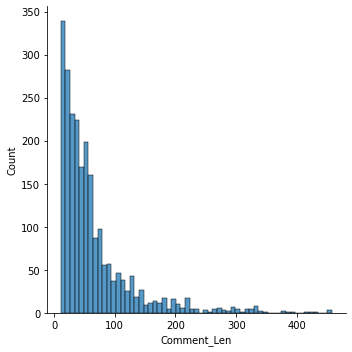

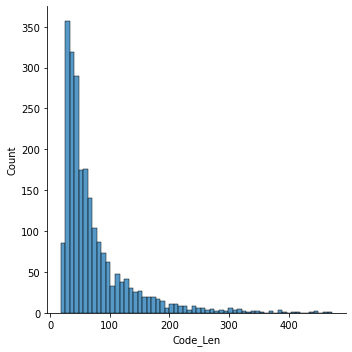

In [ ]:
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame(dataset, columns =['Code', 'Comment', 'Code_Len', 'Comment_Len']) 
df_eligible = df[(df['Code_Len']+df['Comment_Len'] < 512)]
sns.displot(df_eligible["Comment_Len"])
sns.displot(df_eligible["Code_Len"])
df_eligible

print(len(df),"number of entries")
print()

print("%.2f" % df["Code_Len"].max(), "max code length")
print("%.2f" % df["Code_Len"].min(), "min code length")

print("%.2f" % df["Code_Len"].mean(), "mean code length")
print("%.2f" % df["Code_Len"].median(), "median code length")
print("%.2f" % df["Code_Len"].std(), "std code length")

print()
print("%.2f" % df["Comment_Len"].max(), "max Comment length")
print("%.2f" % df["Comment_Len"].min(), "min Comment length")

print("%.2f" % df["Comment_Len"].mean(), "mean comment length")
print("%.2f" % df["Comment_Len"].median(), "median comment length")
print("%.2f" % df["Comment_Len"].std(), "std comment length")


print(df.loc[df['Code_Len'] == df['Code_Len'].max()])
print(df.loc[df['Code_Len'] == df['Code_Len'].min()])


## IF WE DO NOT NEED TO PROCESS RAW DATA WE CAN JUST EXECUTE THIS

In [ ]:
!gsutil cp gs://{bucket_name}/dataset/pretraining_so.txt ./pretraining_so.txt  
!gsutil cp gs://{bucket_name}/dataset/pretraining_csn.txt ./pretraining_csn.txt  

lines_so = []
lines_csn = []

with open('./pretraining_so.txt') as f:
    lines_so = f.read().splitlines()

with open('./pretraining_csn.txt') as f:
    lines_csn = f.read().splitlines()

lines = lines_so + lines_csn

with open('./pretraining.txt', 'w') as f:
    for line in lines:
        f.write("%s\n" % line)

Copying gs://code_review_automation/dataset/pretraining_so.txt...
| [1 files][492.8 MiB/492.8 MiB]                                                
Operation completed over 1 objects/492.8 MiB.                                    
Copying gs://code_review_automation/dataset/pretraining_csn.txt...
\ [1 files][272.8 MiB/272.8 MiB]                                                
Operation completed over 1 objects/272.8 MiB.                                    


## preparing pre-processing

In [ ]:
!gsutil cp gs://{bucket_name}/dataset/pretraining.txt ./pretraining.txt

Copying gs://code_review_automation/dataset/pretraining.txt...
\ [1 files][768.0 MiB/768.0 MiB]   45.0 MiB/s                                   
Operation completed over 1 objects/768.0 MiB.                                    


In [ ]:
!wc -l ./pretraining.txt

1166811 ./pretraining.txt


In [ ]:
spm.SentencePieceTrainer.train('--input=./pretraining.txt --model_prefix=TestModel --hard_vocab_limit=false --vocab_size=32000 --bos_id=-1 --eos_id=1 --unk_id=2 --pad_id=0')

In [ ]:
!gsutil cp ./TestModel.model gs://{bucket_name}/models/TestModel.model
!gsutil cp ./TestModel.vocab gs://{bucket_name}/vocab/TestModel.vocab

Copying file://./TestModel.model [Content-Type=application/octet-stream]...
/ [1 files][764.7 KiB/764.7 KiB]                                                
Operation completed over 1 objects/764.7 KiB.                                    
Copying file://./TestModel.vocab [Content-Type=application/octet-stream]...
/ [1 files][560.4 KiB/560.4 KiB]                                                
Operation completed over 1 objects/560.4 KiB.                                    


In [ ]:
!gsutil cp gs://{bucket_name}/utils/T5-masking.py ./T5-masking.py
!python3 ./T5-masking.py --train_data_file ./pretraining.txt --tokenizer_name ./TestModel.model --save_folder .

Copying gs://code_review_automation/utils/T5-masking.py...
/ [1 files][  6.8 KiB/  6.8 KiB]                                                
Operation completed over 1 objects/6.8 KiB.                                      
Calling T5Tokenizer.from_pretrained() with the path to a single file or url is deprecated
  0% 0/1166811 [00:00<?, ?it/s]2021-02-23 15:06:14.497079: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
100% 1166811/1166811 [5:09:29<00:00, 62.84it/s]


creation of the dataframe for exporting .tsv file 


In [ ]:
df_list_inputs = [] 
with open("./train_inputs.txt","r") as f:
  for line in f:
    df_list_inputs.append(line)

df_list_labels = [] 
with open("./train_labels.txt","r") as f:
  for line in f:
    df_list_labels.append(line)

df = pd.DataFrame()
df['Inputs']  = df_list_inputs
df['Labels']  = df_list_labels

# df.to_csv(path_or_buf='./pre-training.tsv', sep='\t', header=False, index=False, index_label=False)

f = open("./pre-training.tsv", "w")
for index, row in df.iterrows():
  f.write(row['Inputs'].strip() + "\t" + row['Labels'].strip() + "\n" )
f.close()

In [ ]:
!gsutil cp ./pre-training.tsv  gs://{bucket_name}/dataset/pre-training.tsv
! head -6 ./pre-training.tsv
! wc -l pre-training.tsv

Copying file://./pre-training.tsv [Content-Type=text/tab-separated-values]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

/
Operation completed over 1 objects/1.4 GiB.                                      
Bind indexed elements<extra_id_0> the supplied<extra_id_1> .<extra_id_2> param name the name<extra_id_3> the property to bind @param target the target bindable @<

# PRETRAINING

In [ ]:
!awk 'NR >= 900000 && NR <= 900100' ./pre-training.tsv

Your containers (Swing vs. JavaFX) have different background colors, so the color<extra_id_0> shines through<extra_id_1> transparent component is<extra_id_2> . I slightly<extra_id_3> run() method<extra_id_4> @Overridepublic void run() {<extra_id_5> new Pane(); contents.setBackground(new Background( new BackgroundFill<extra_id_6> jfxColour<extra_id_7> new<extra_id_8> CornerRadii(0), new Insets(0))));<extra_id_9> scene = new Scene(contents<extra_id_10> jfxPanel.setScene(scene);} This still<extra_id_11> the issue. However, if I now<extra_id_12> the Scene background<extra_id_13> to BLACK , the colors are rendered the<extra_id_14> : @Overridepublic void<extra_id_15> () { Pane contents = new Pane<extra_id_16> contents.setBackground(new<extra_id_17> (<extra_id_18> BackgroundFill(jfxColour, new CornerRadii(0), new<extra_id_19> (0)))<extra_id_20> //<extra_id_21> scene = new Scene(contents);<extra_id_22> scene = new<extra_id_23> contents, javafx.<extra_id_24> .<extra_id_25> .Color.BLACK); // !!!

In [ ]:
!gsutil cp gs://{bucket_name}/dataset/pretraining.txt ./pretraining.txt
!gsutil cp gs://{bucket_name}/dataset/pre-training.tsv ./pre-training.tsv

Copying gs://code_review_automation/dataset/pretraining.txt...
- [1 files][768.0 MiB/768.0 MiB]   56.1 MiB/s                                   
Operation completed over 1 objects/768.0 MiB.                                    
Copying gs://code_review_automation/dataset/pre-training.tsv...
- [1 files][  1.4 GiB/  1.4 GiB]   56.8 MiB/s                                   
Operation completed over 1 objects/1.4 GiB.                                      
